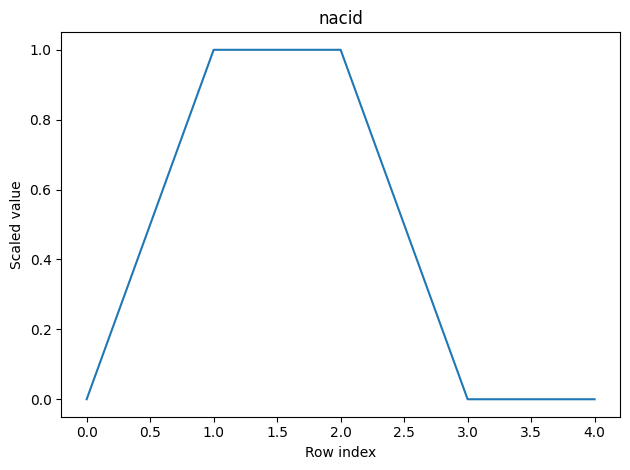

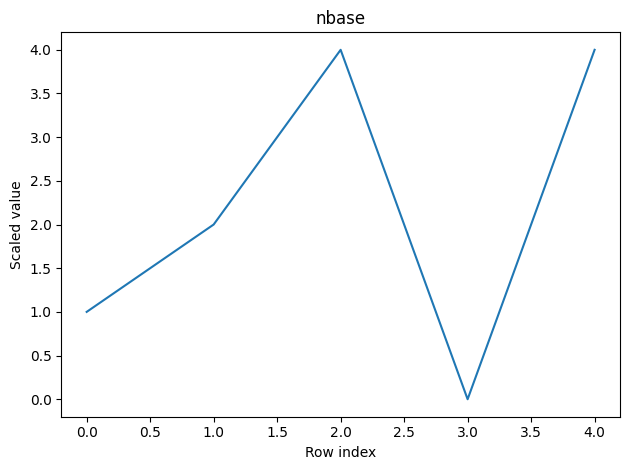

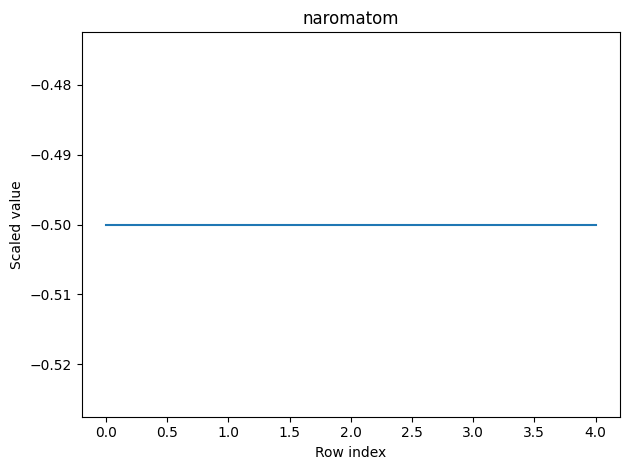

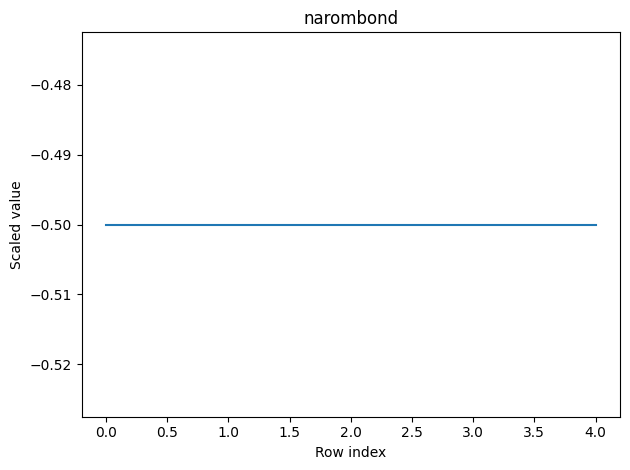

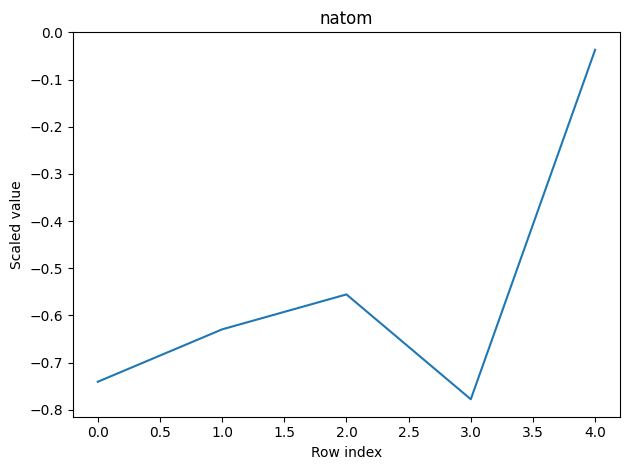

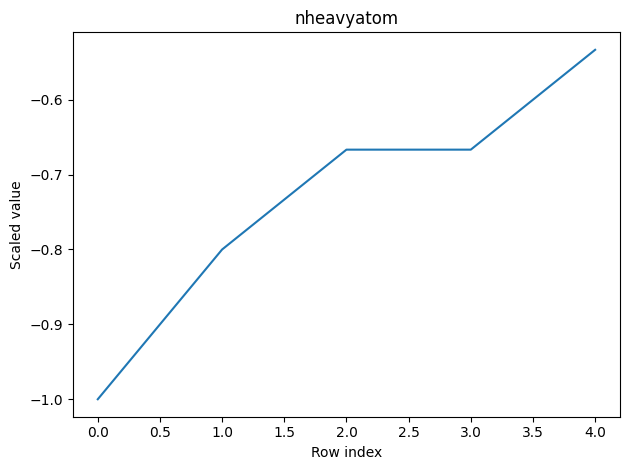

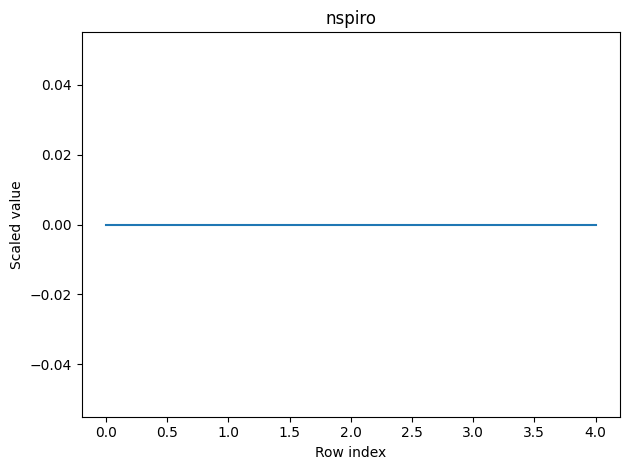

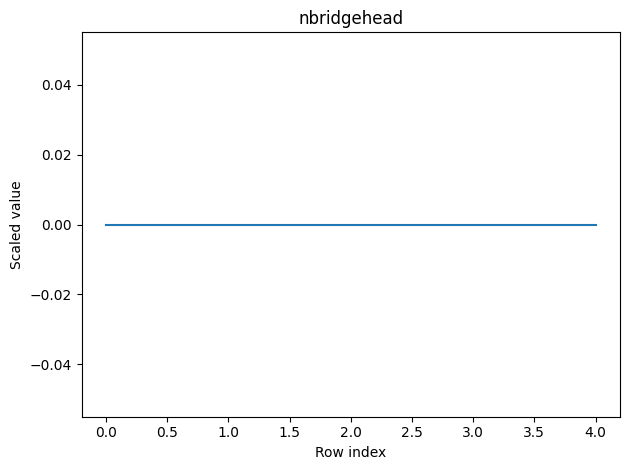

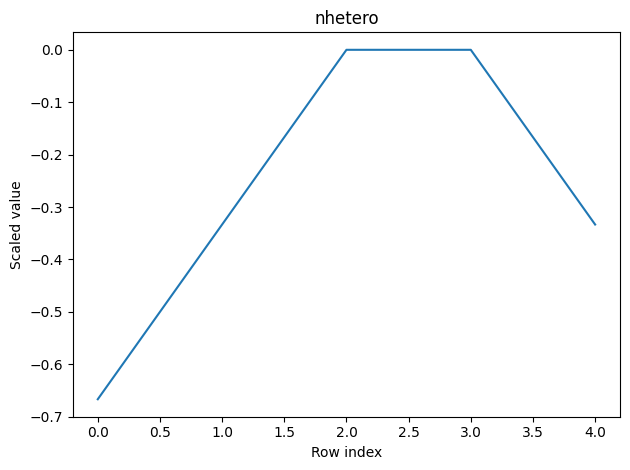

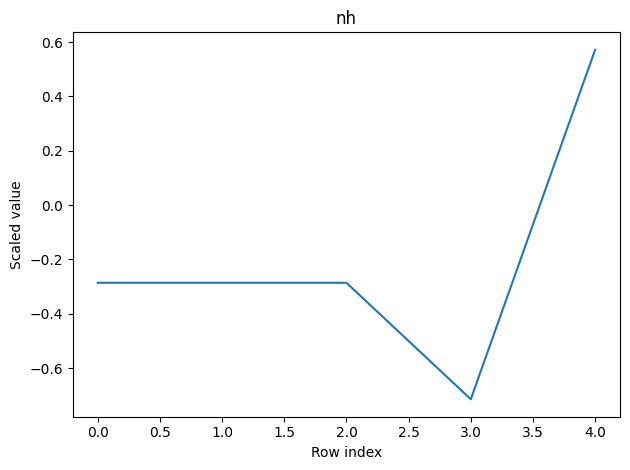

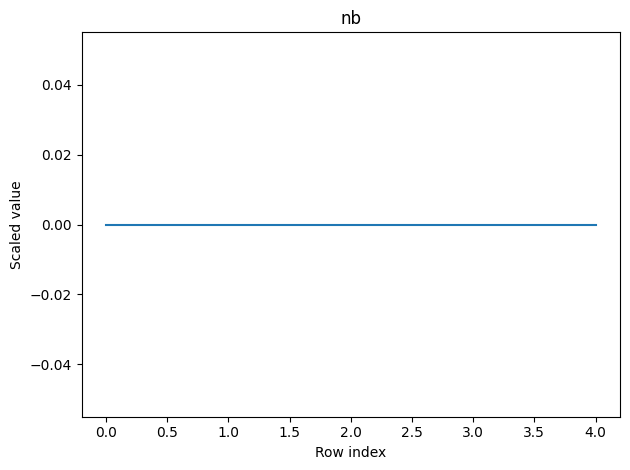

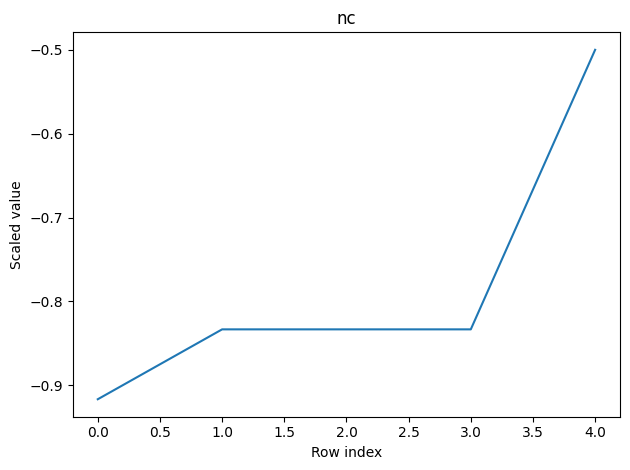

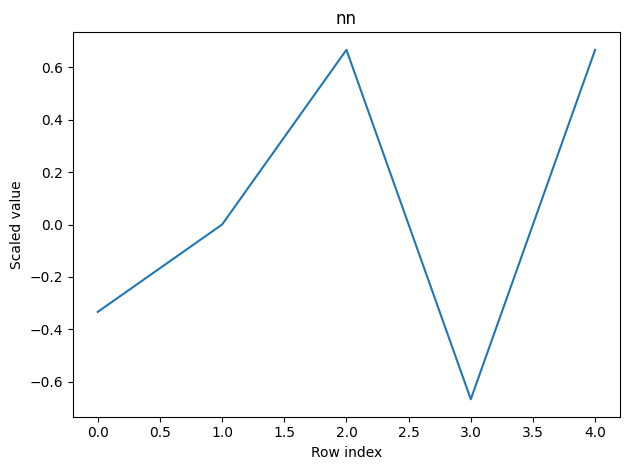

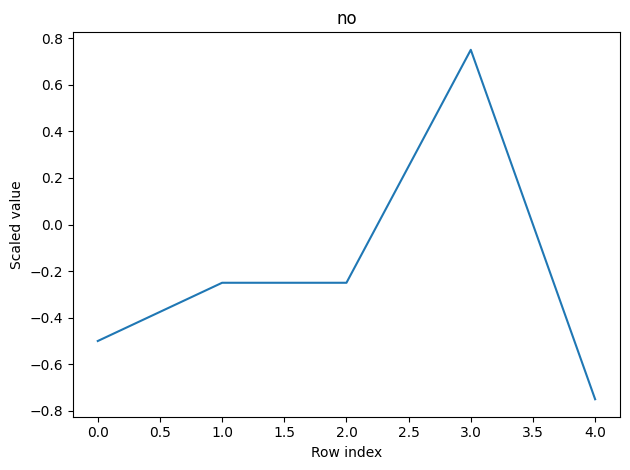

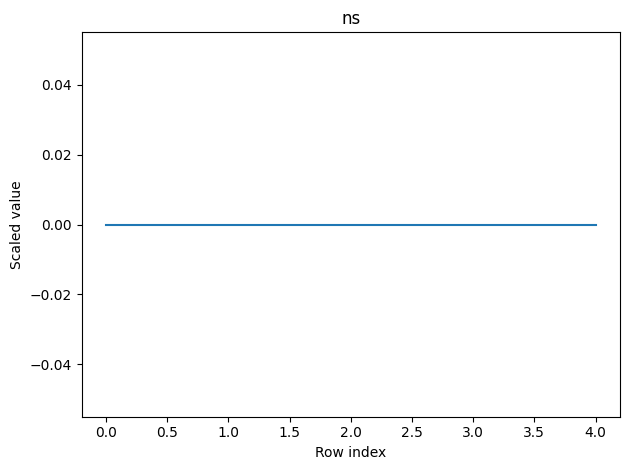

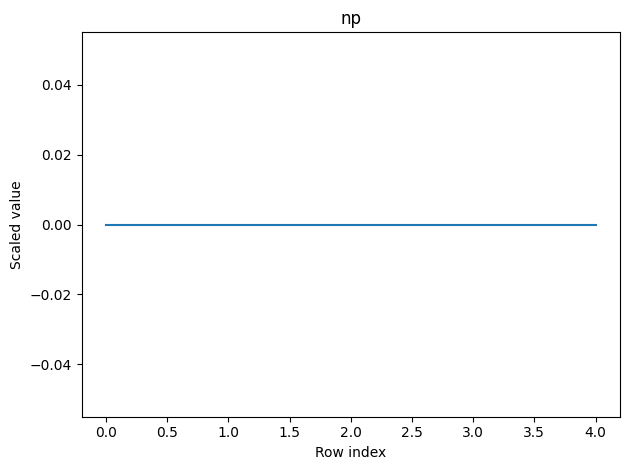

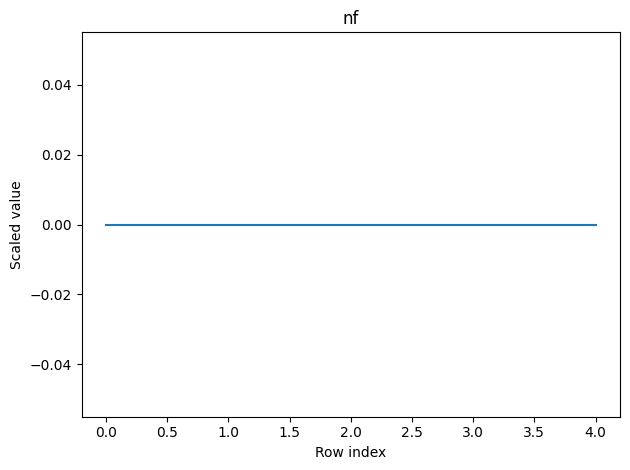

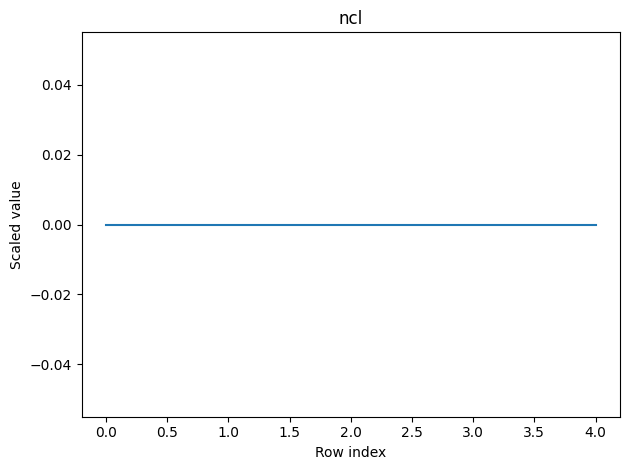

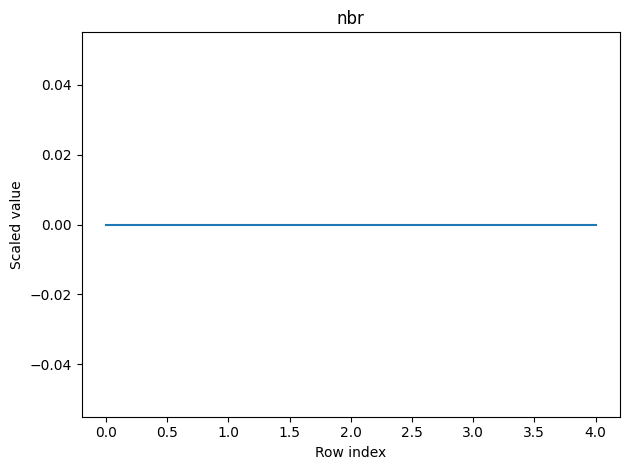

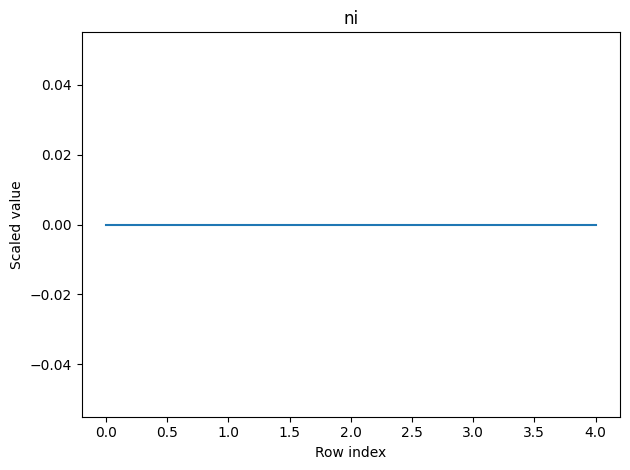

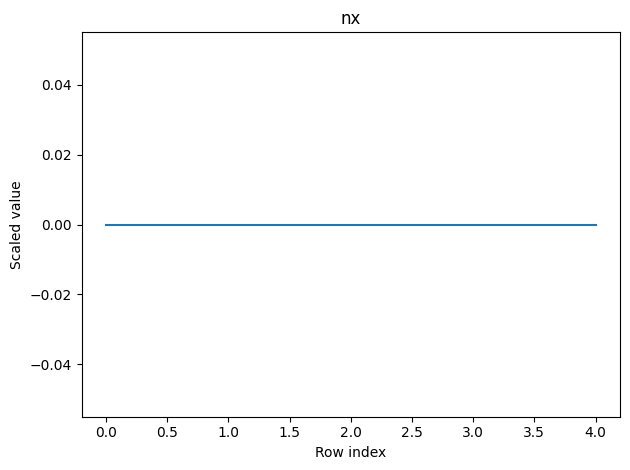

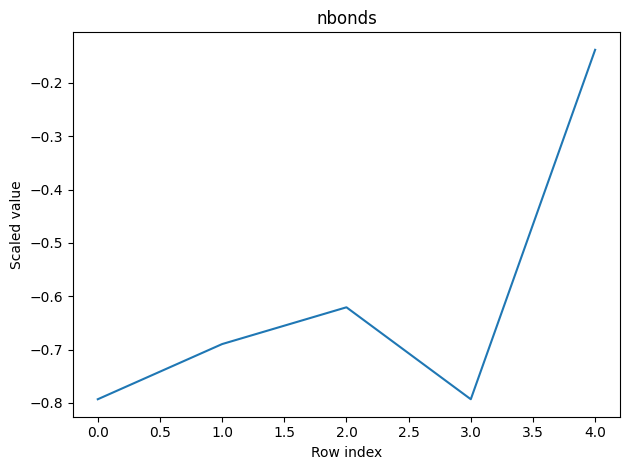

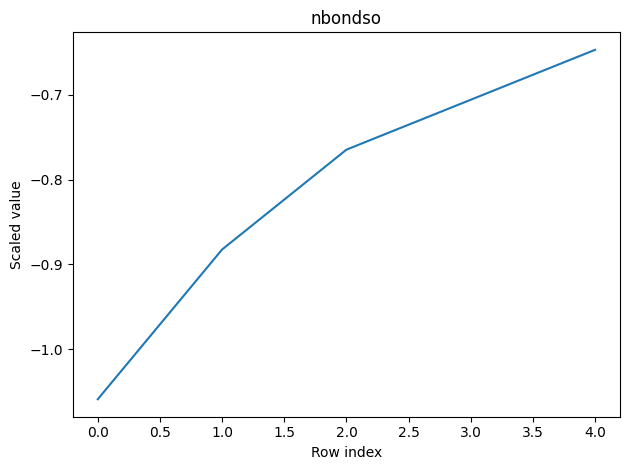

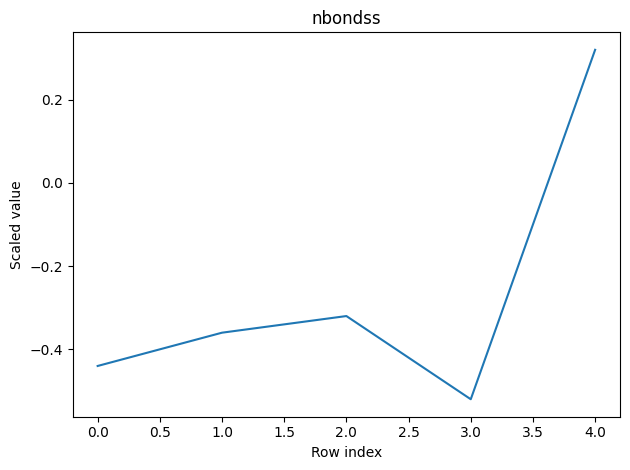

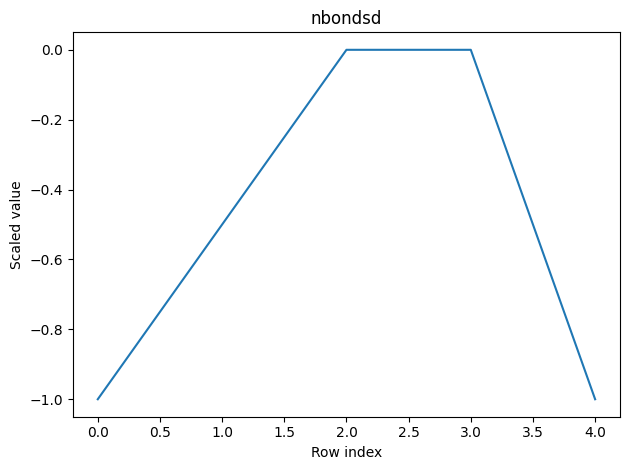

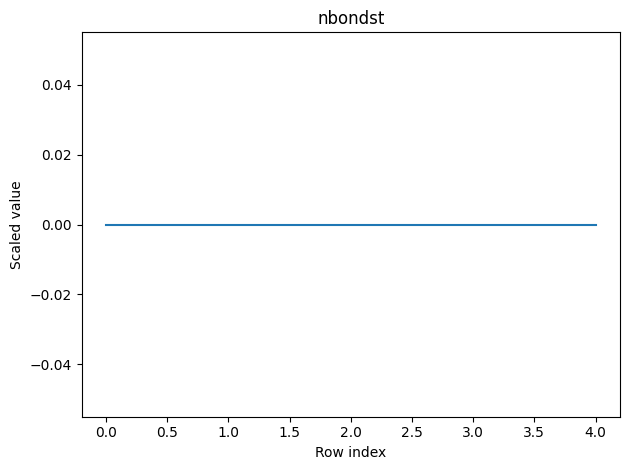

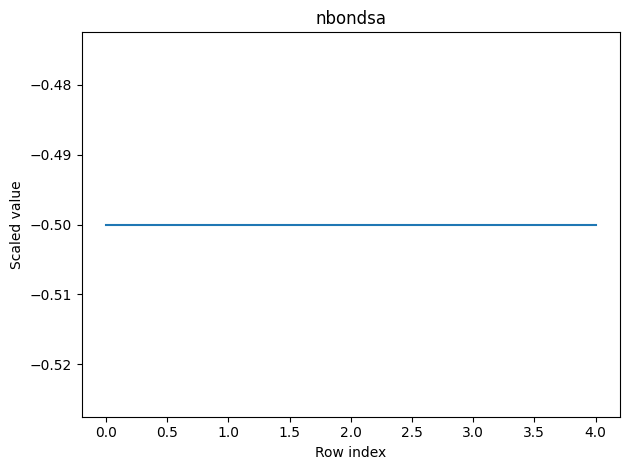

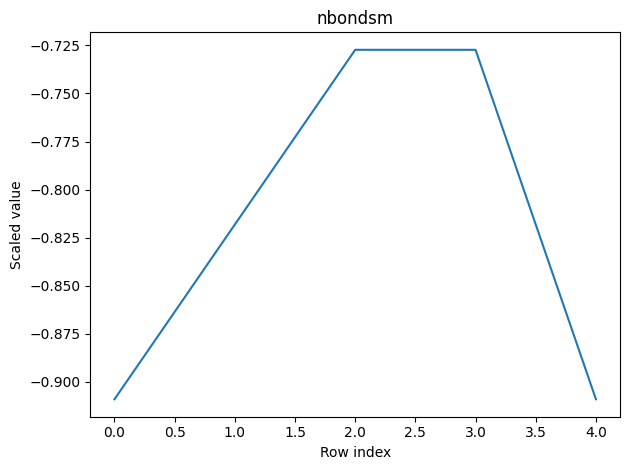

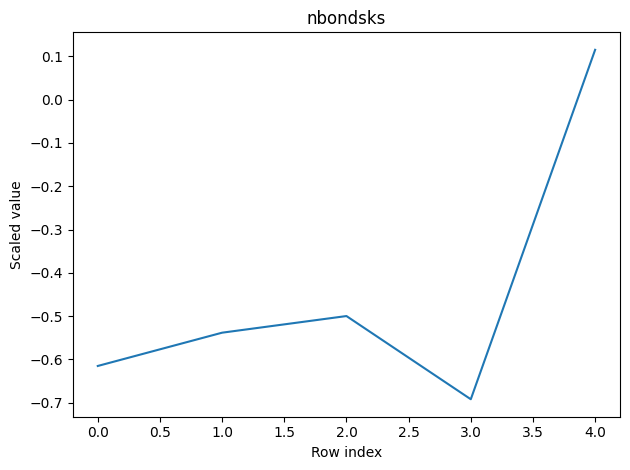

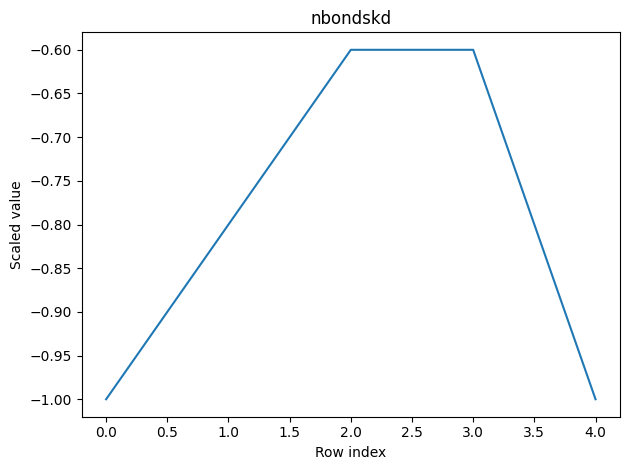

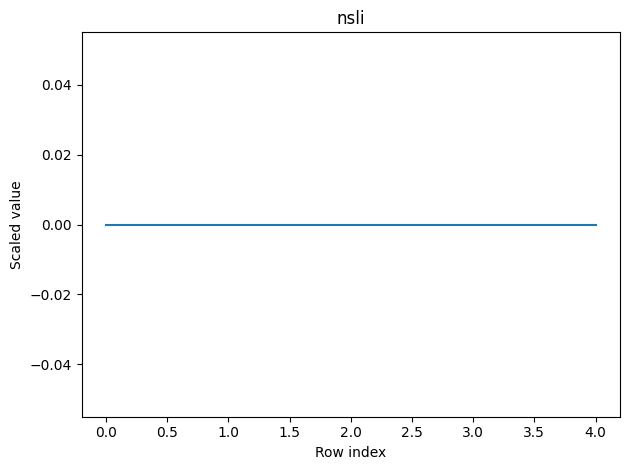

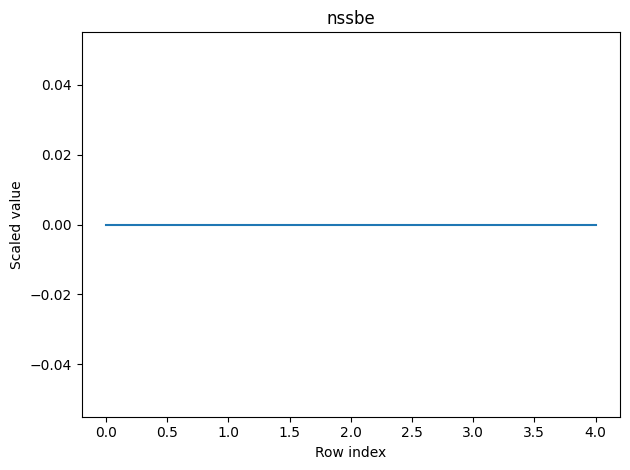

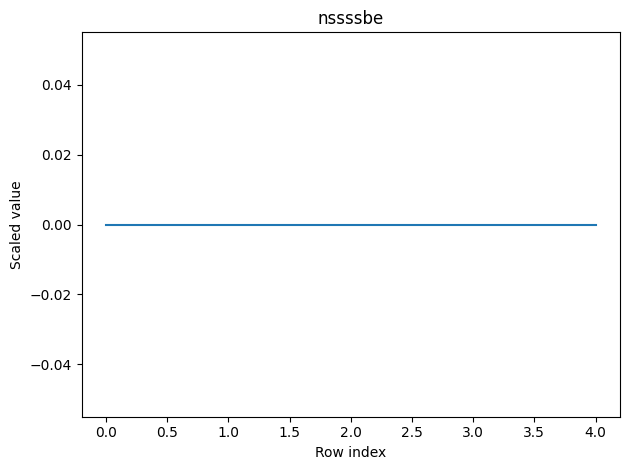

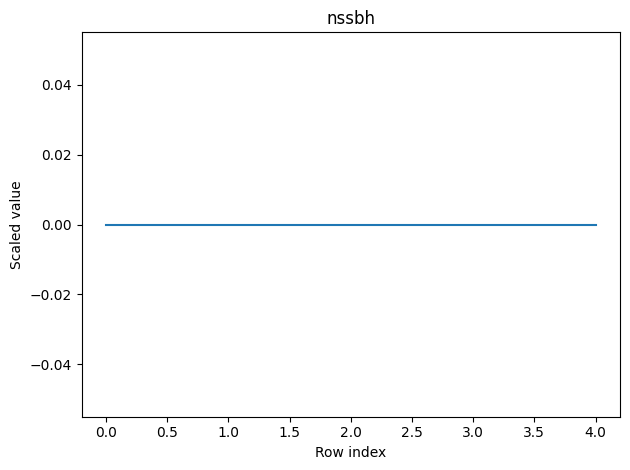

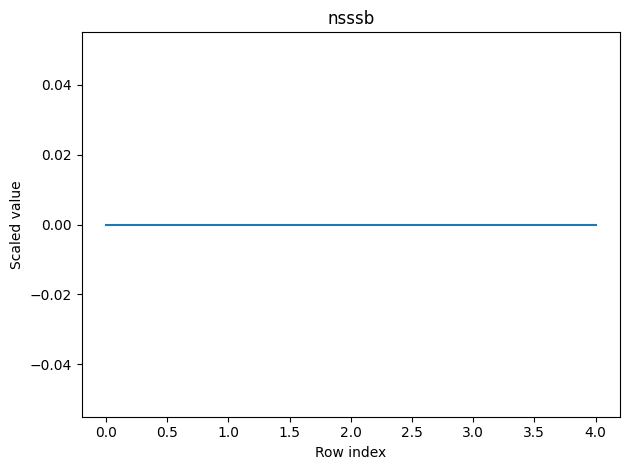

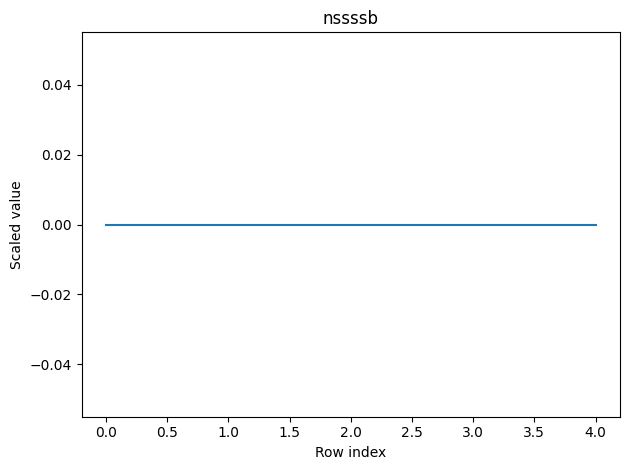

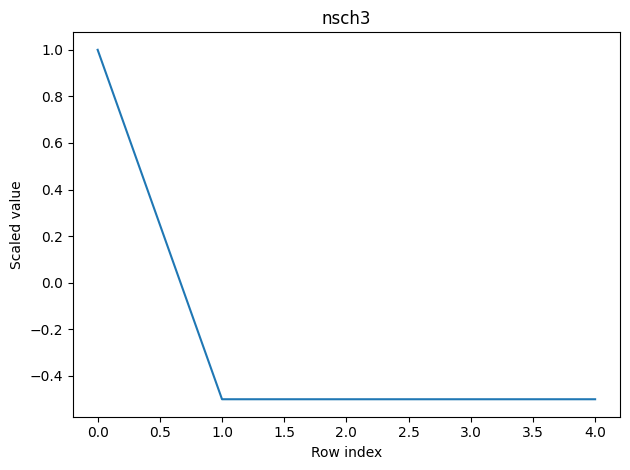

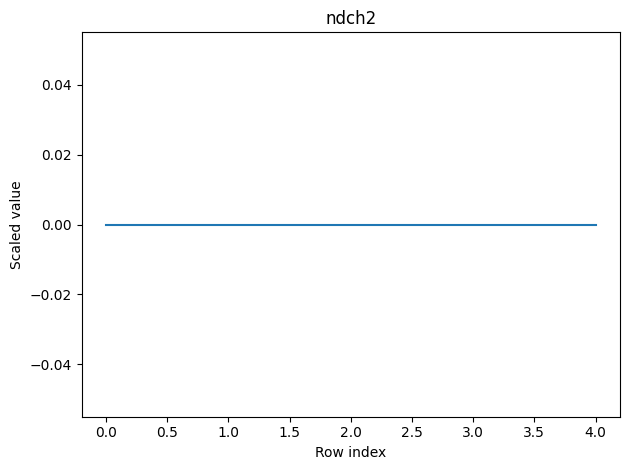

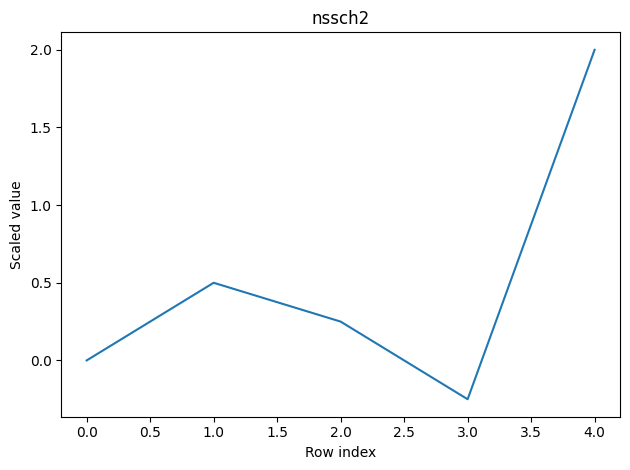

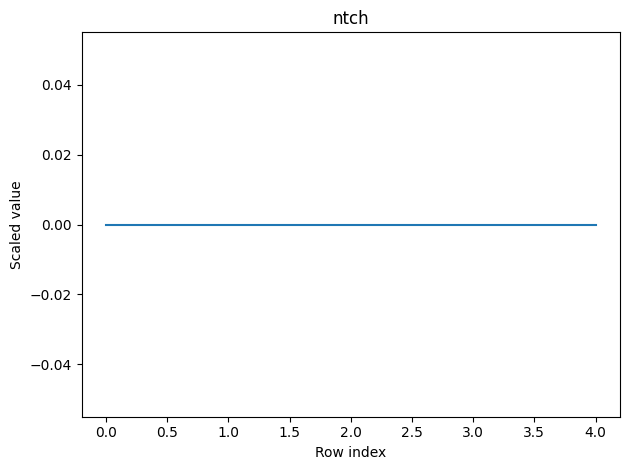

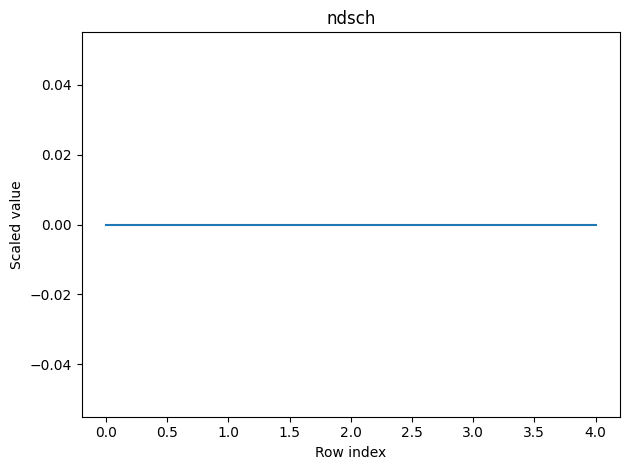

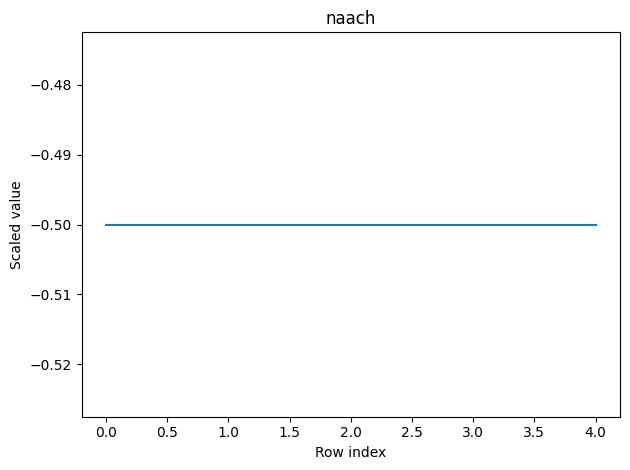

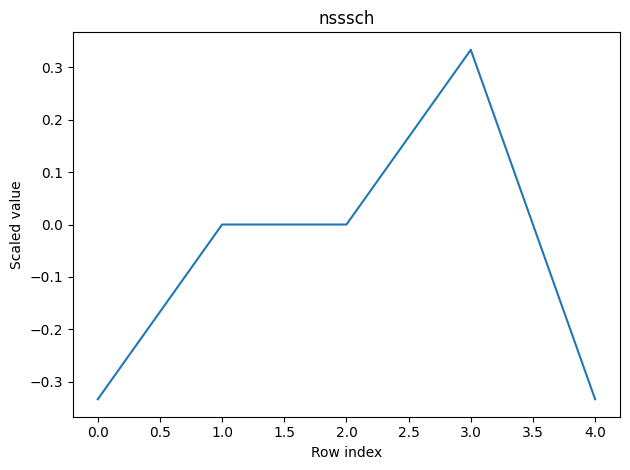

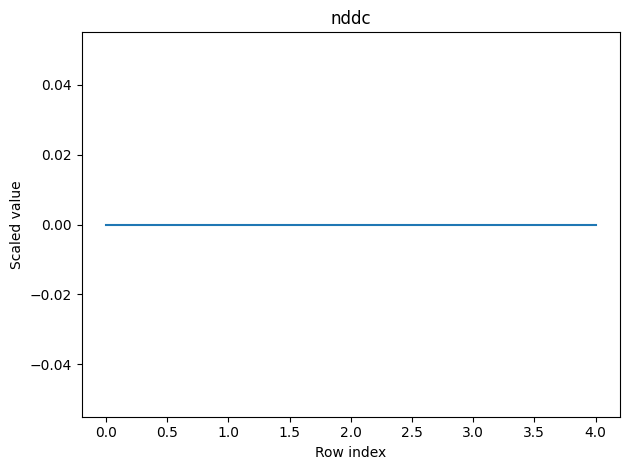

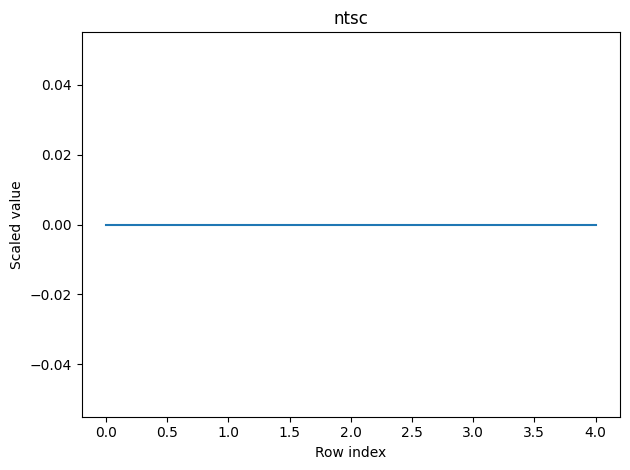

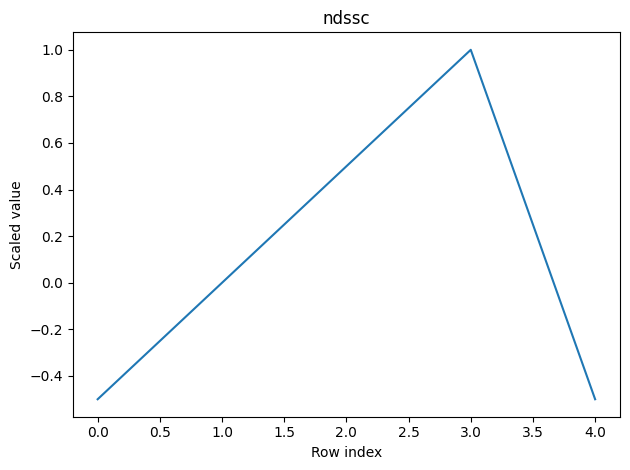

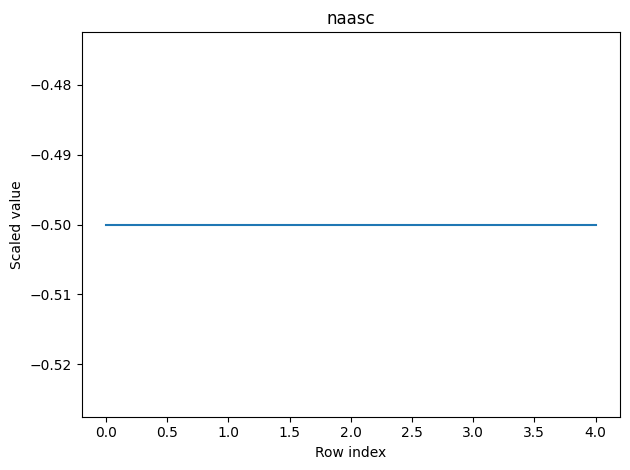

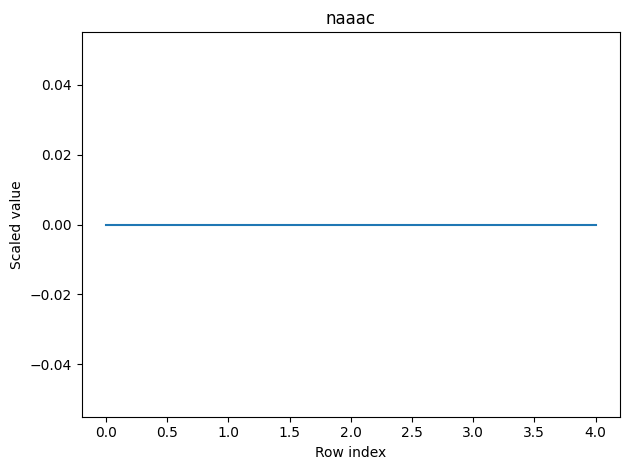

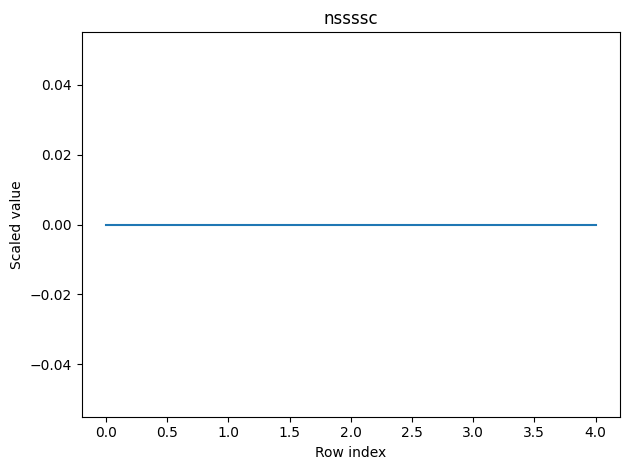

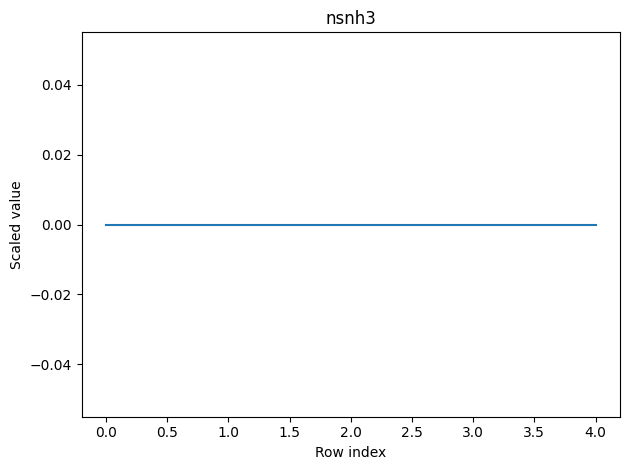

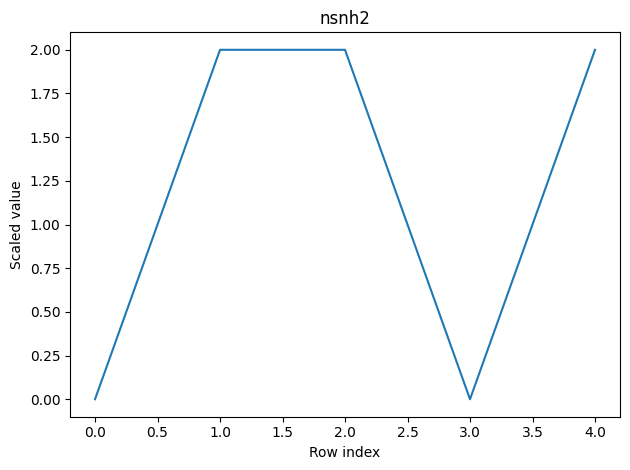

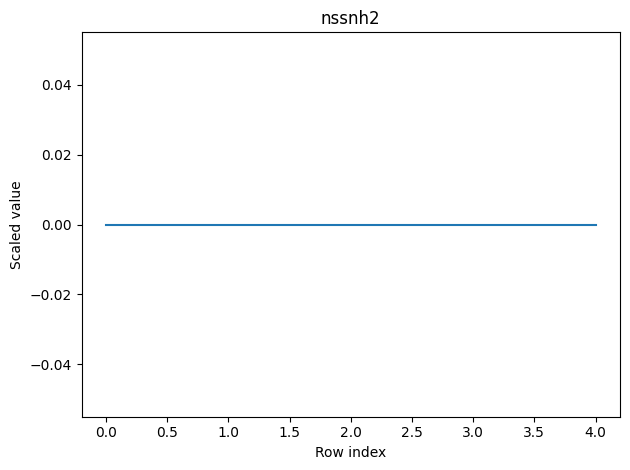

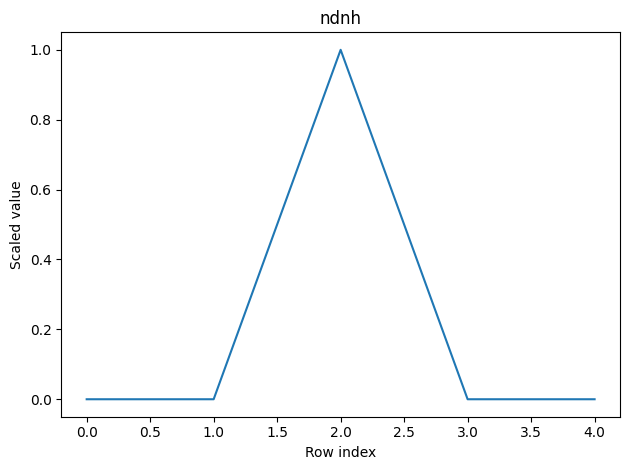

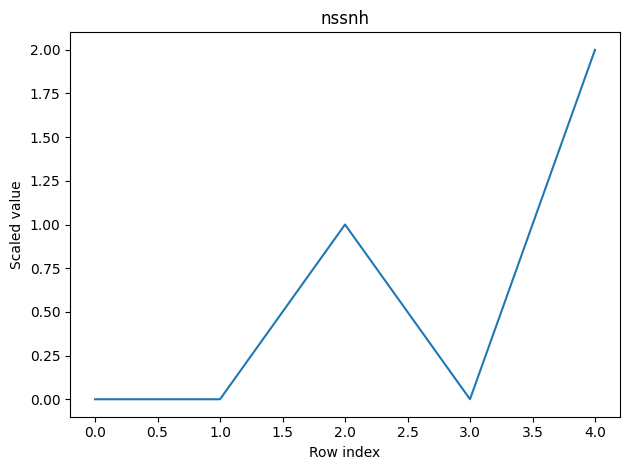

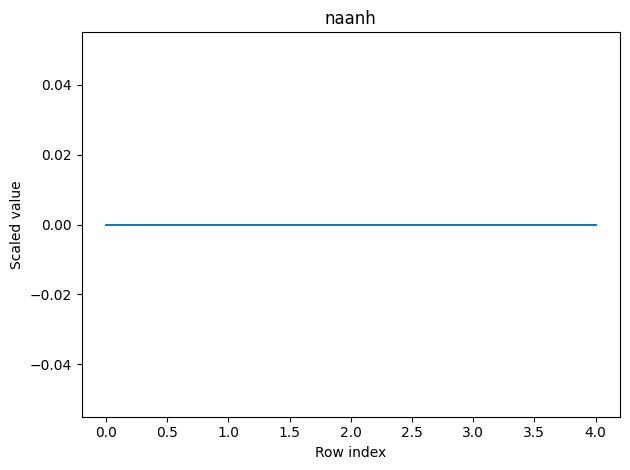

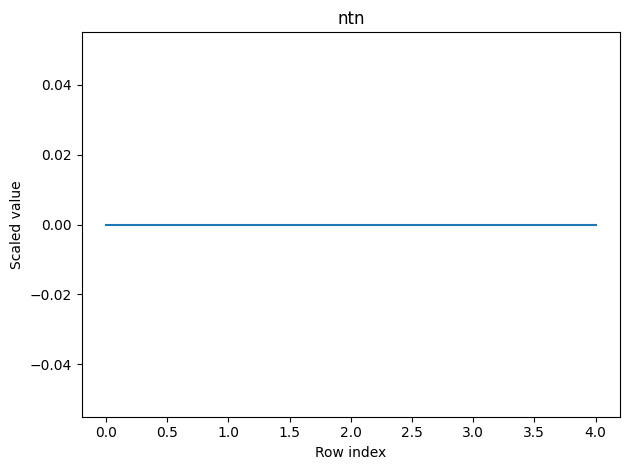

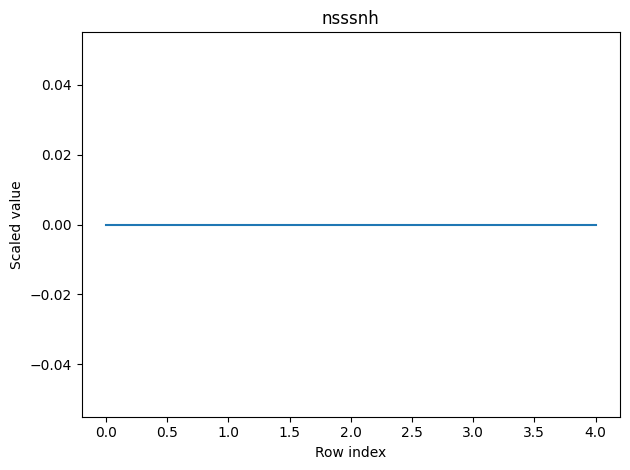

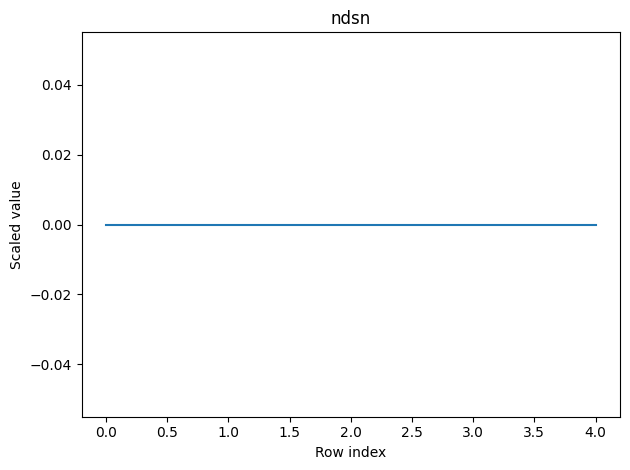

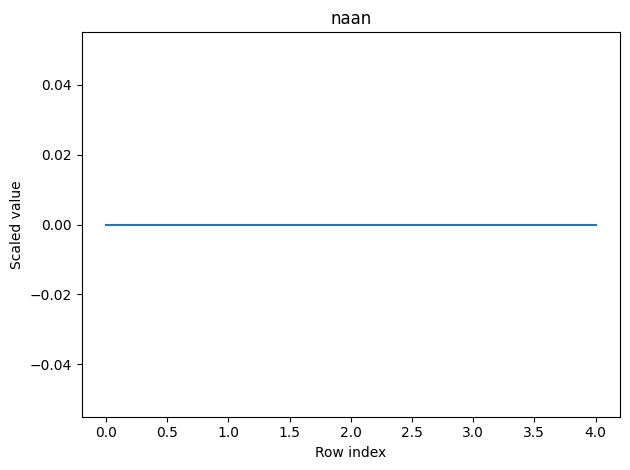

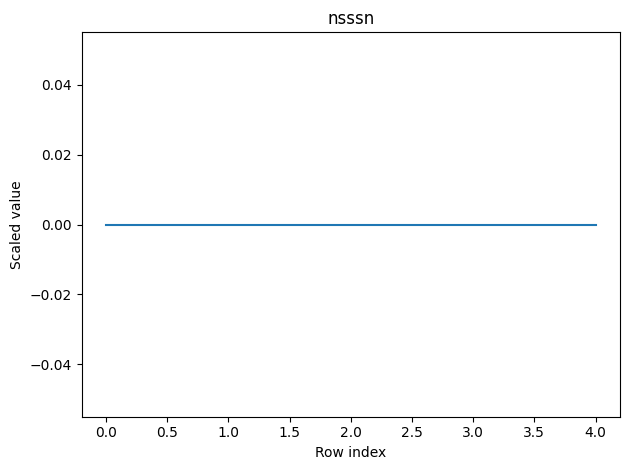

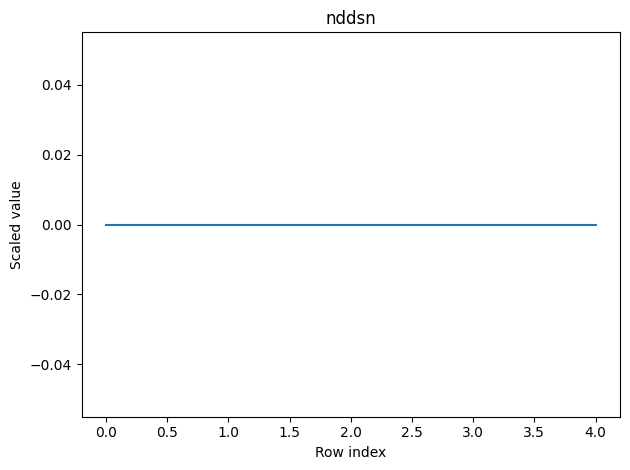

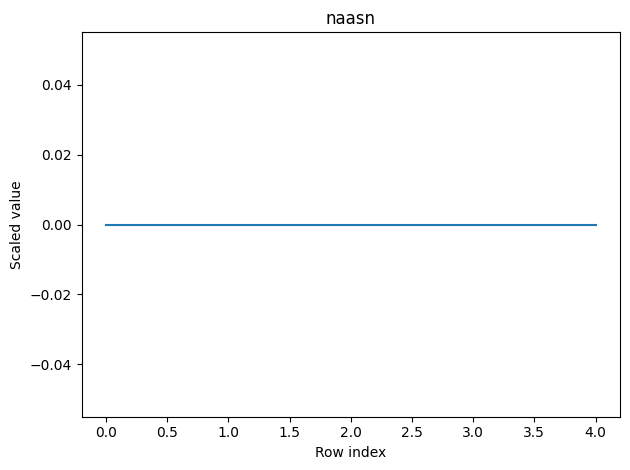

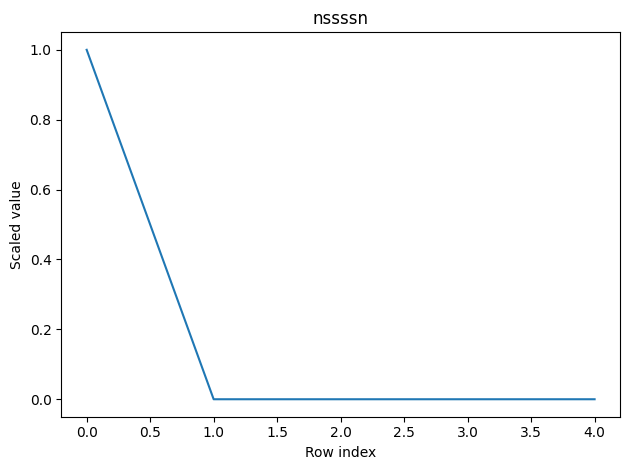

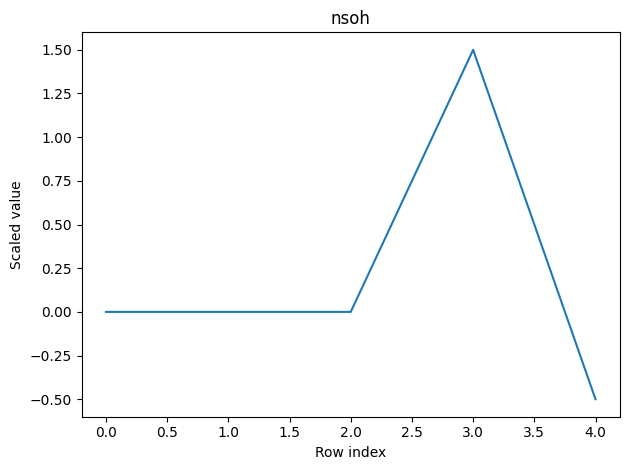

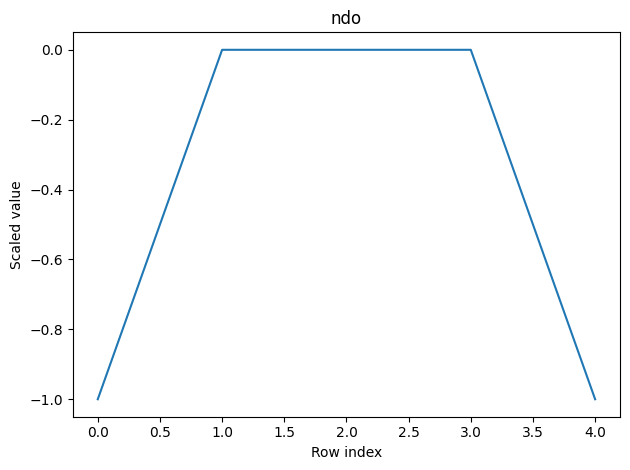

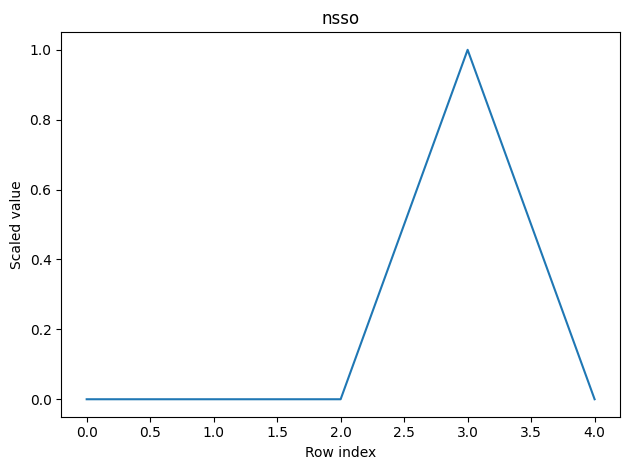

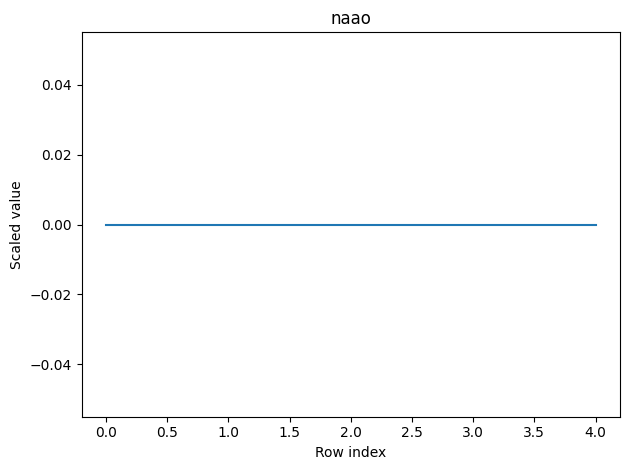

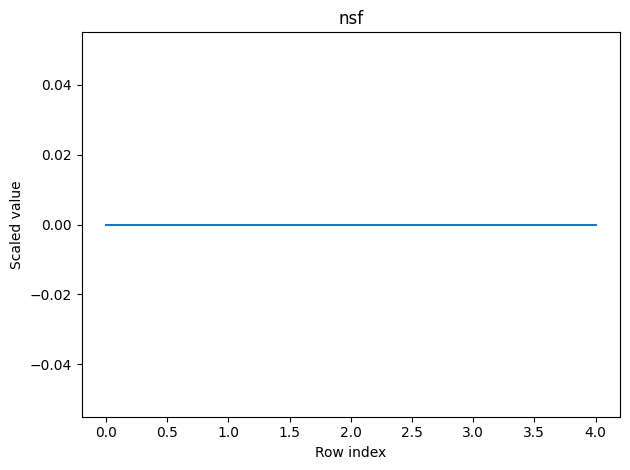

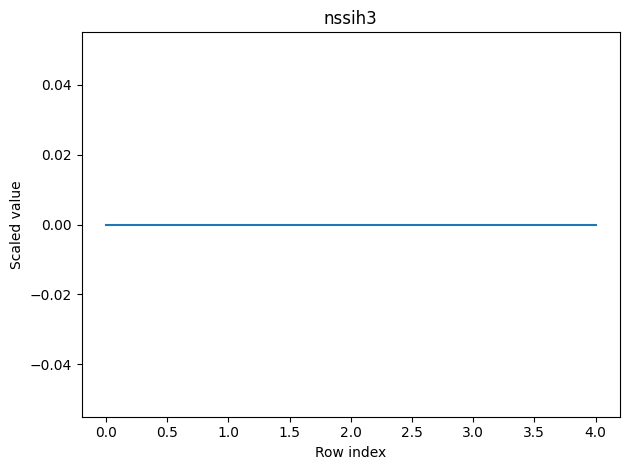

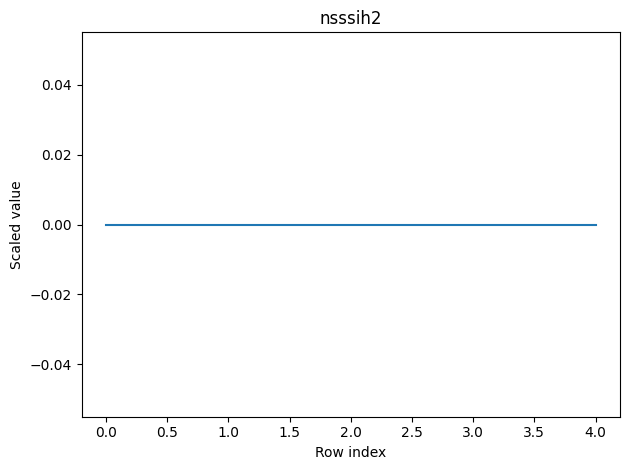

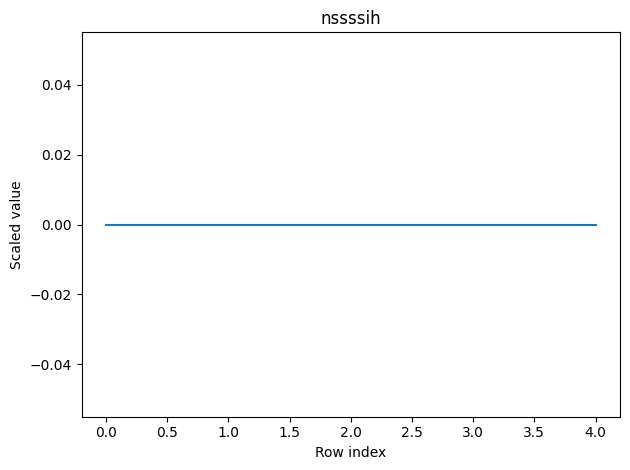

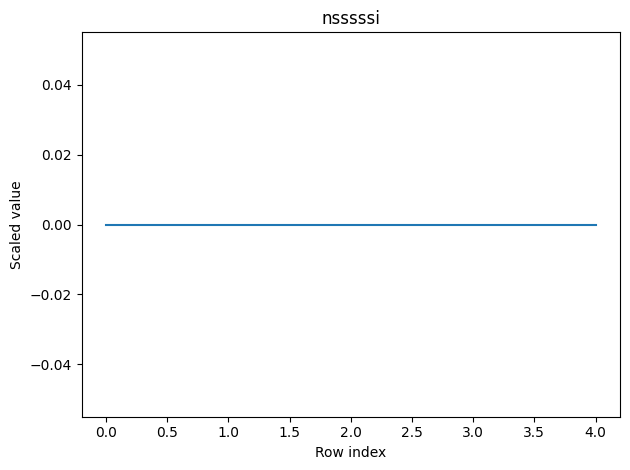

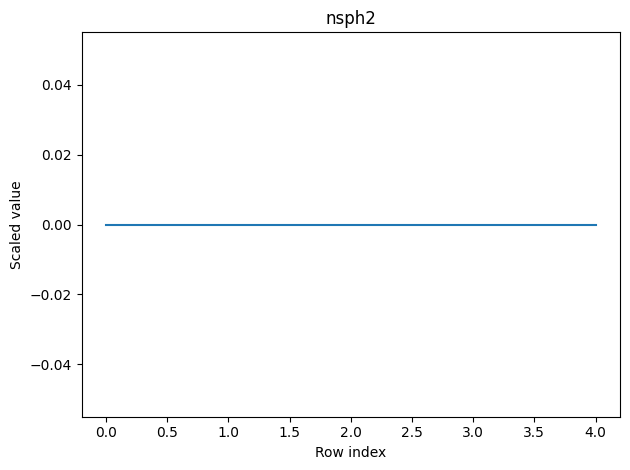

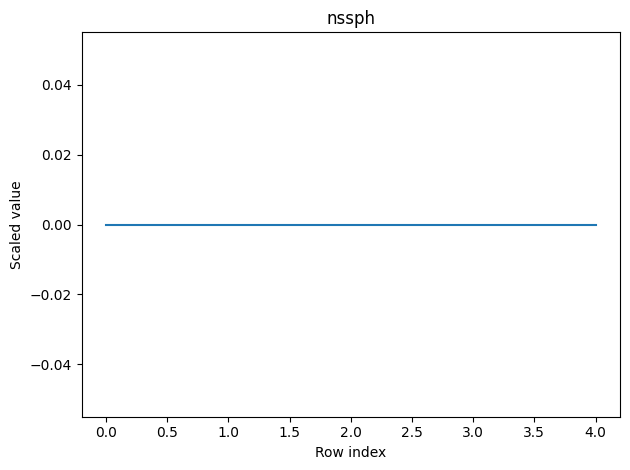

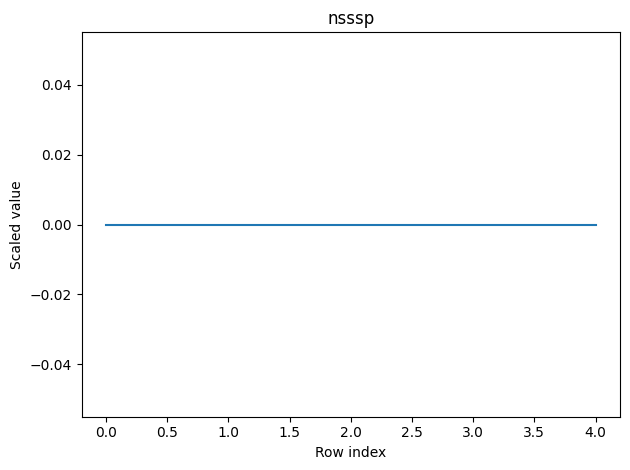

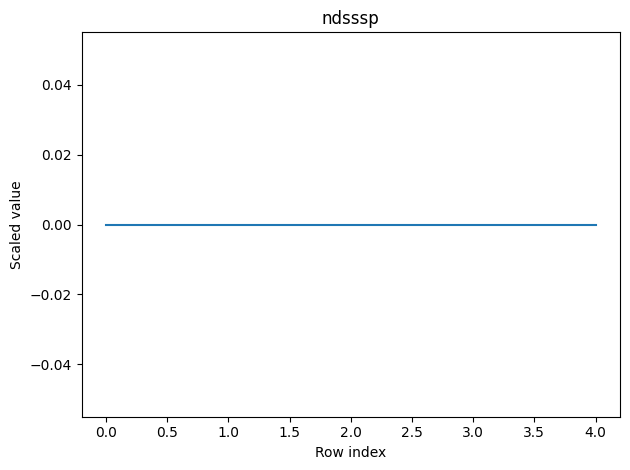

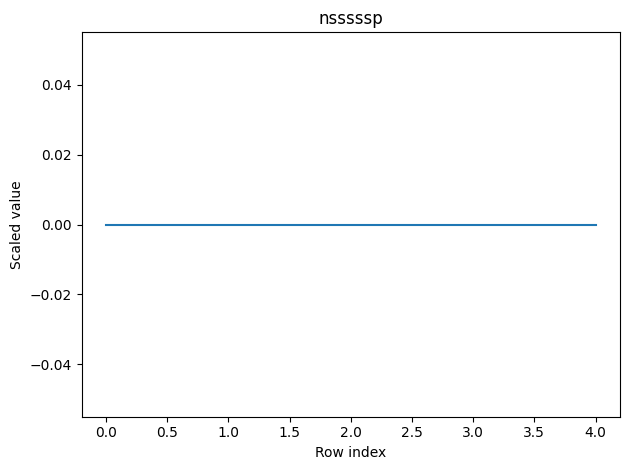

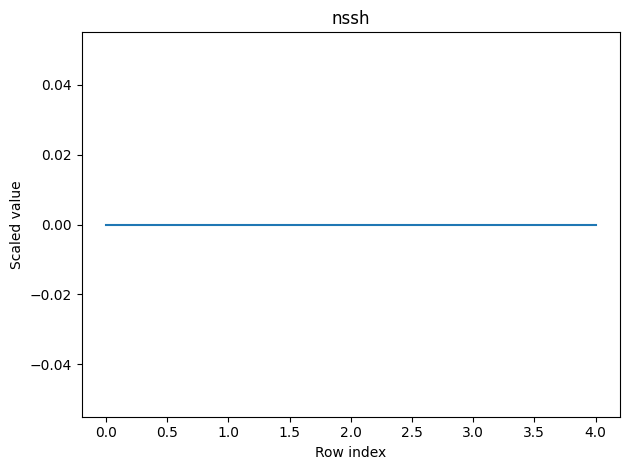

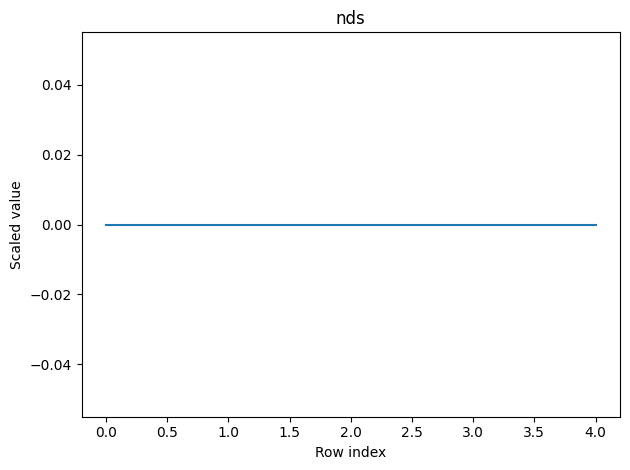

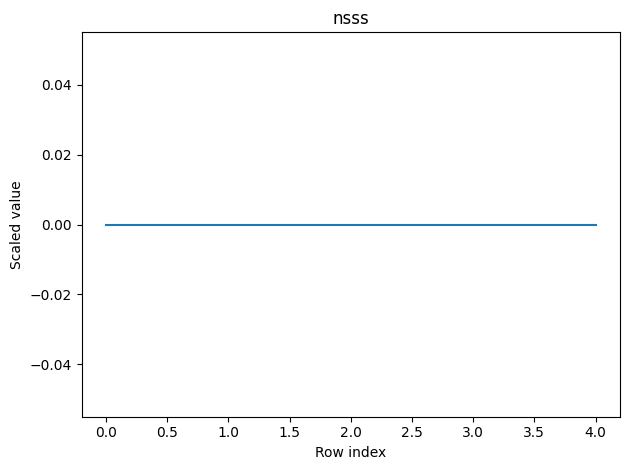

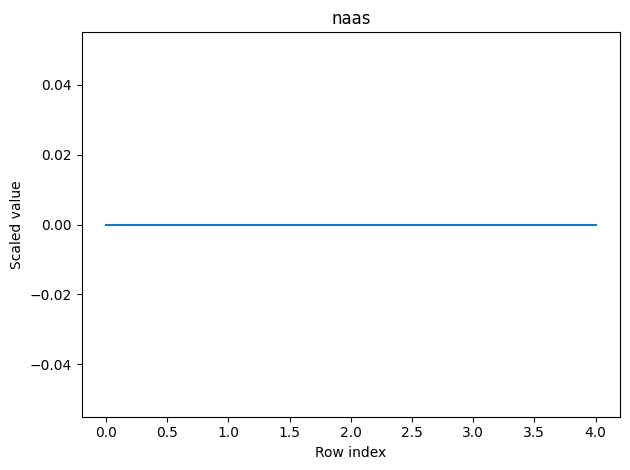

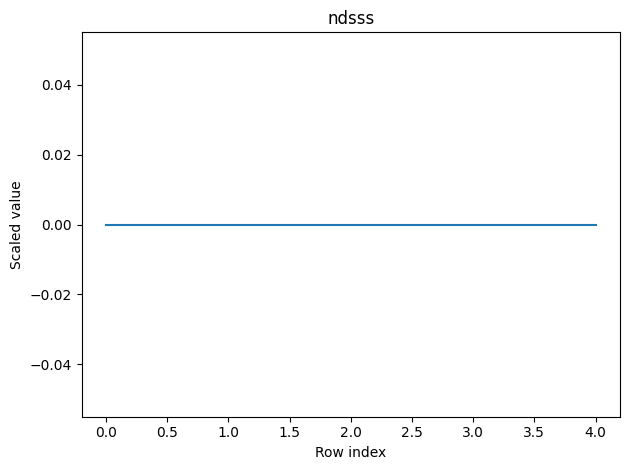

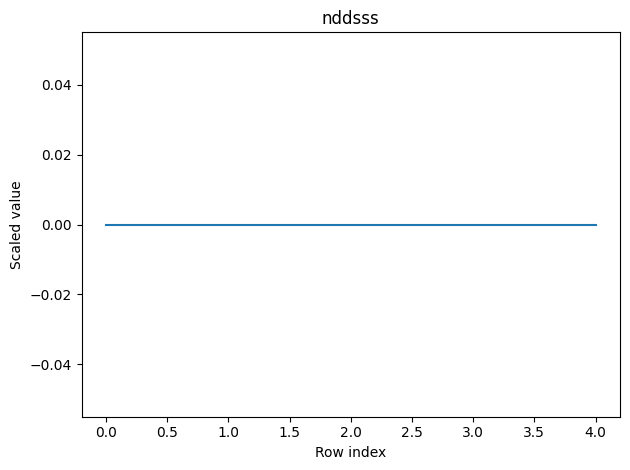

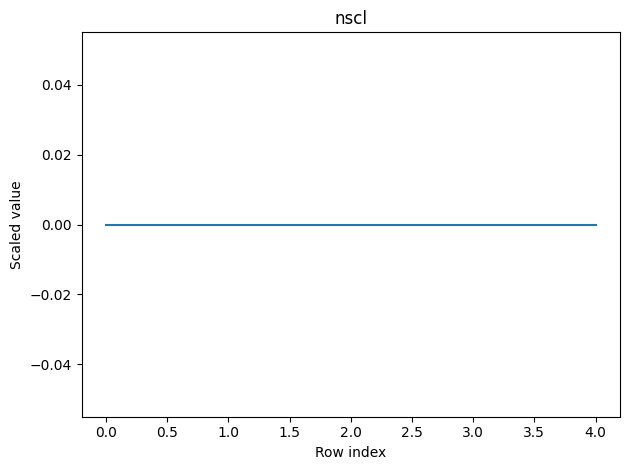

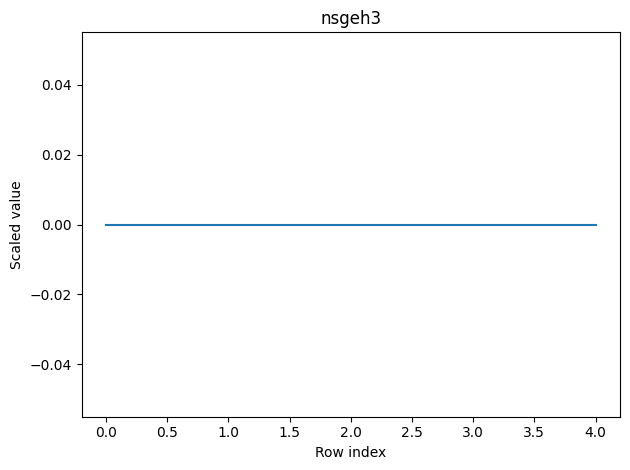

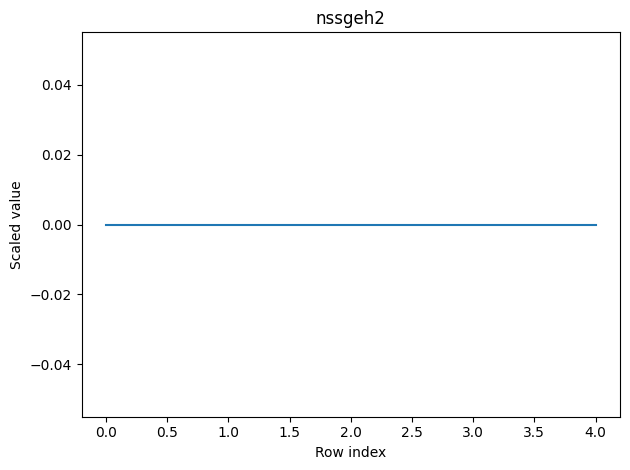

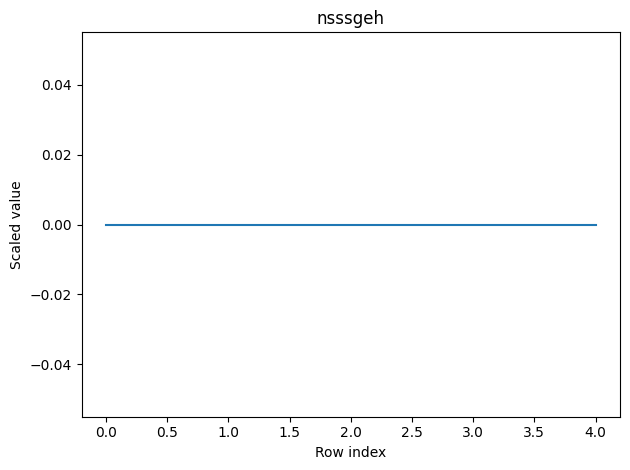

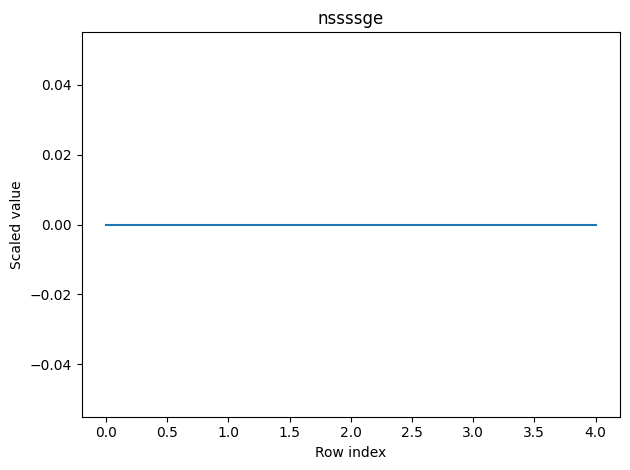

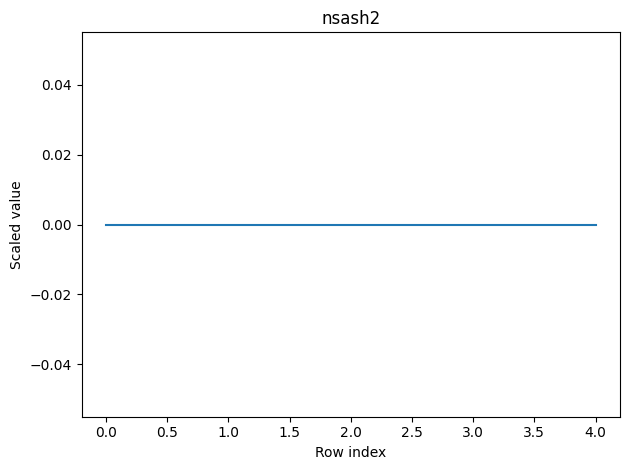

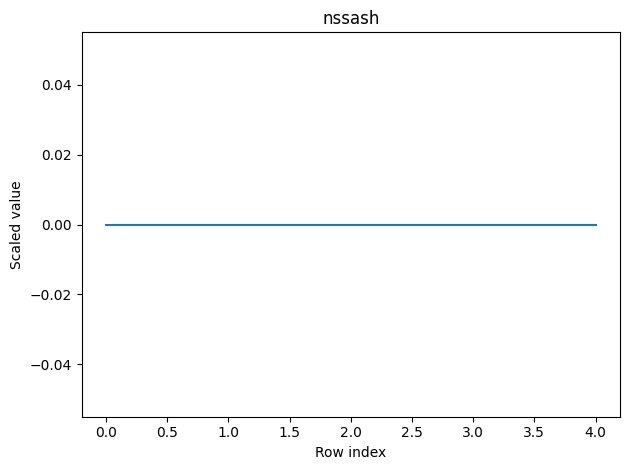

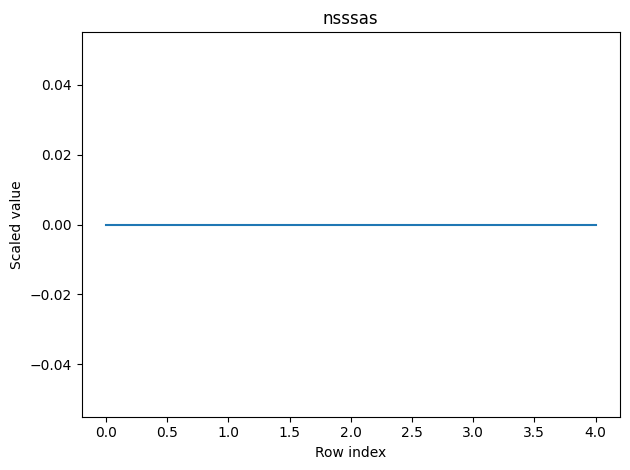

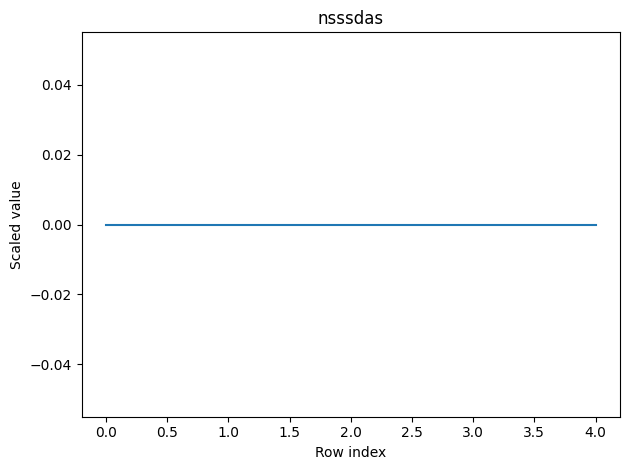

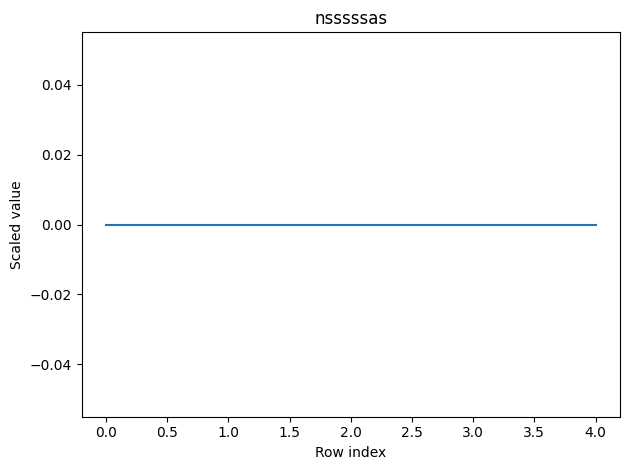

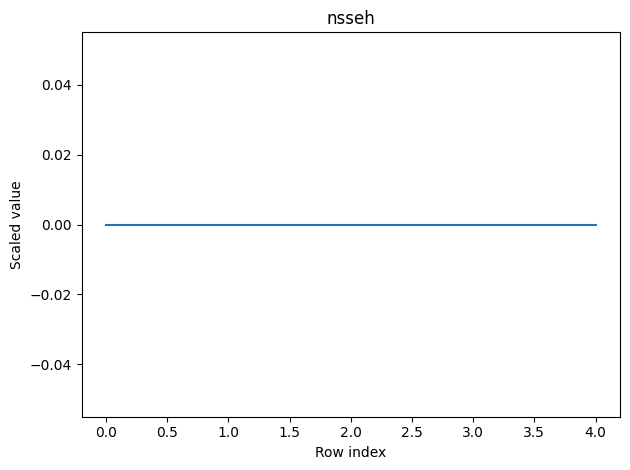

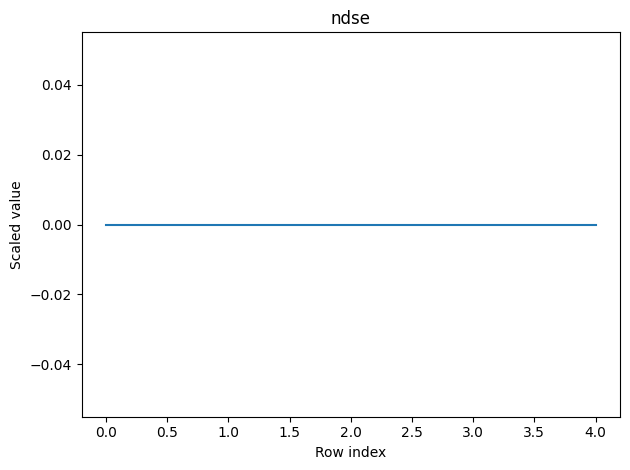

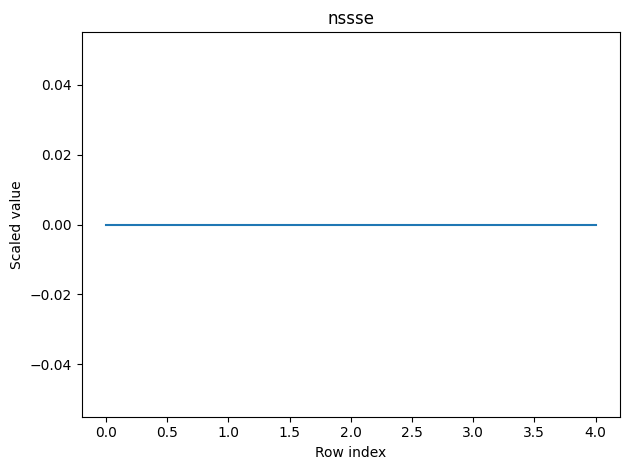

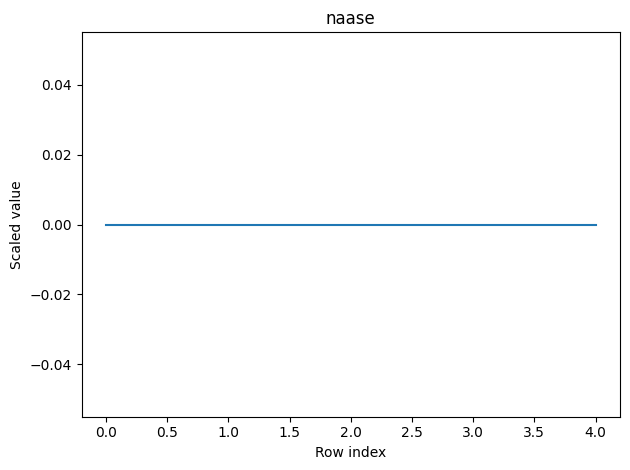

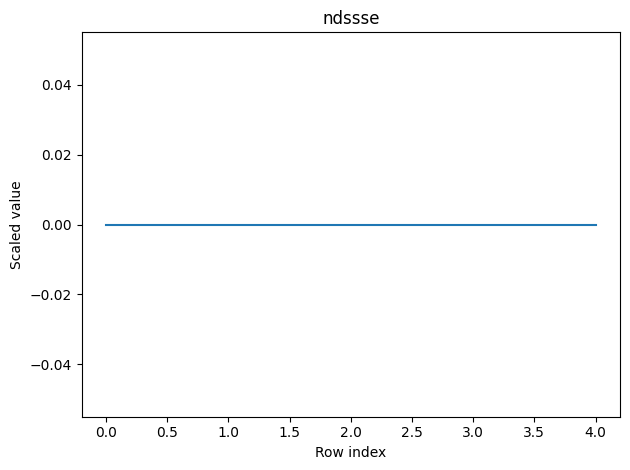

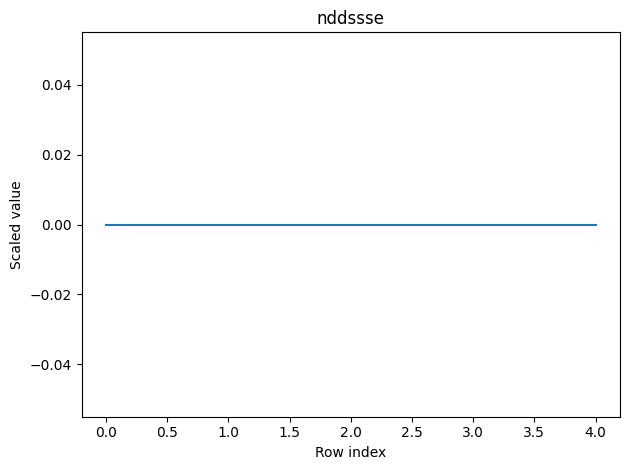

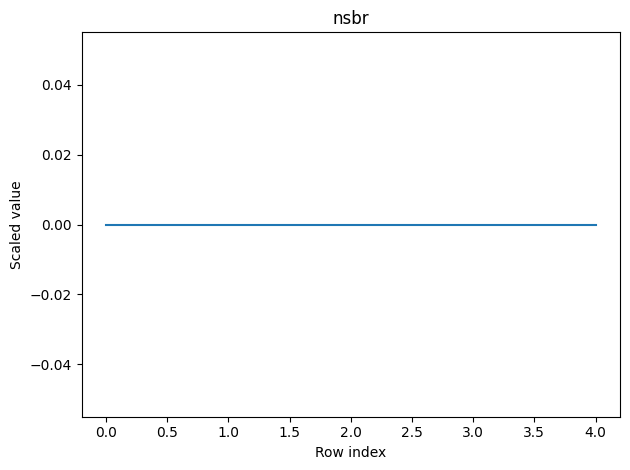

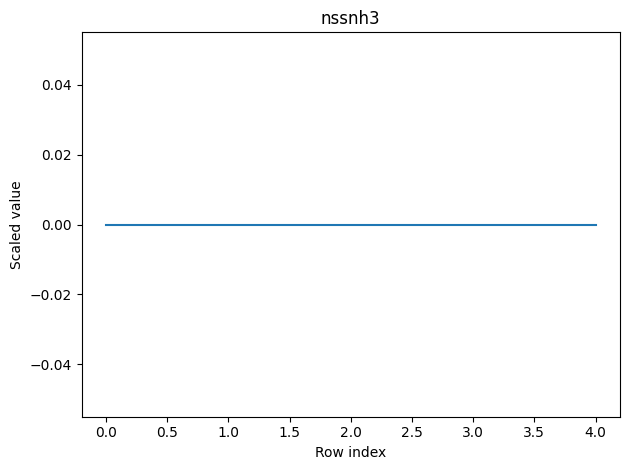

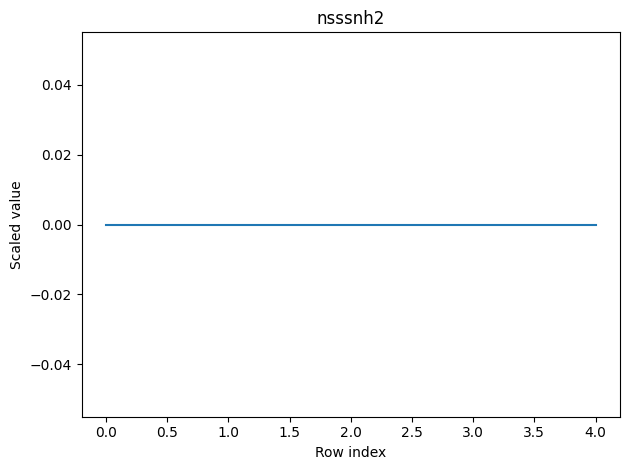

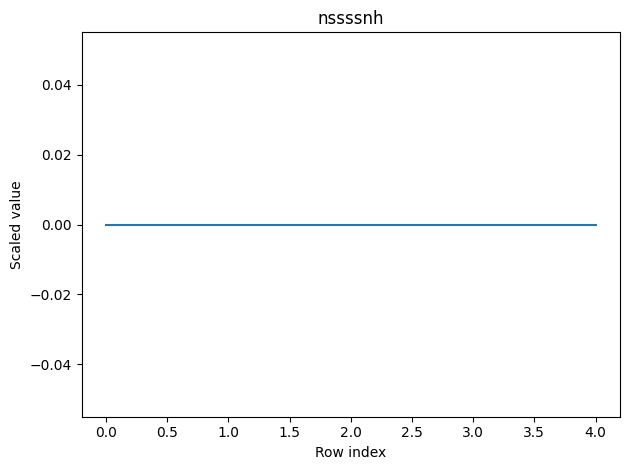

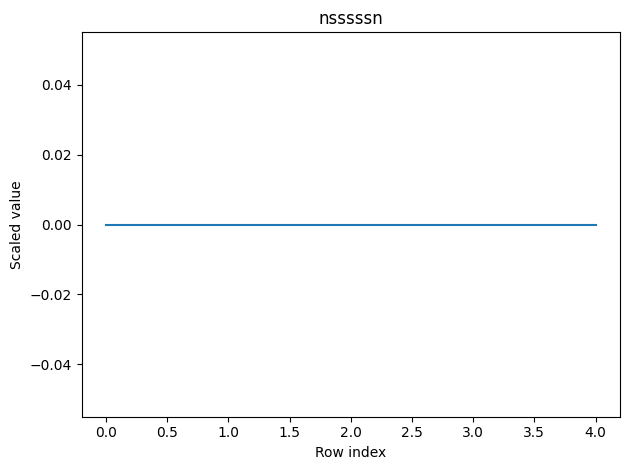

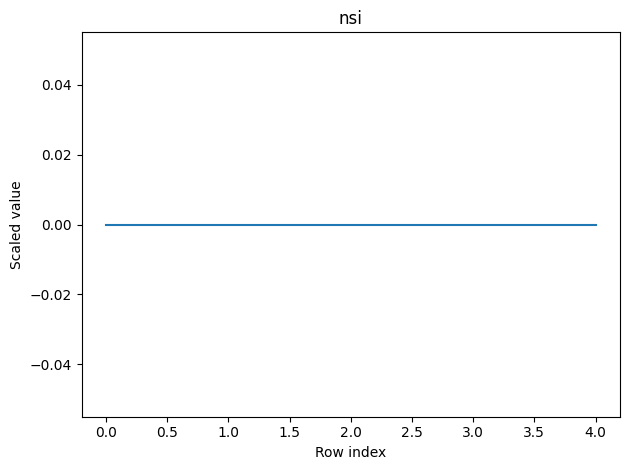

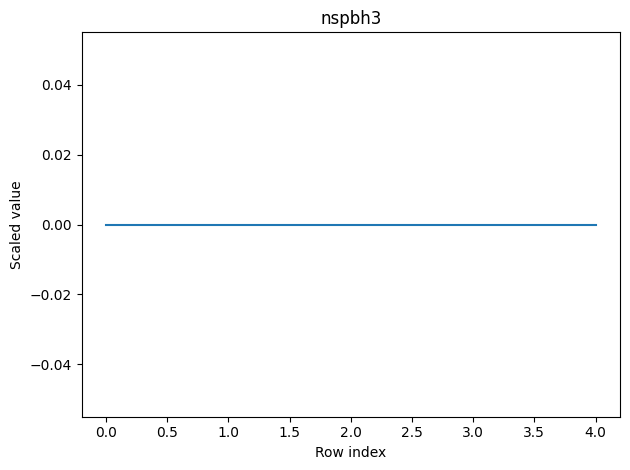

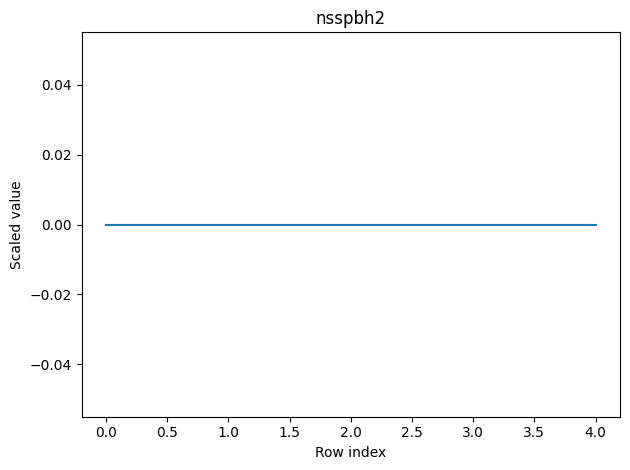

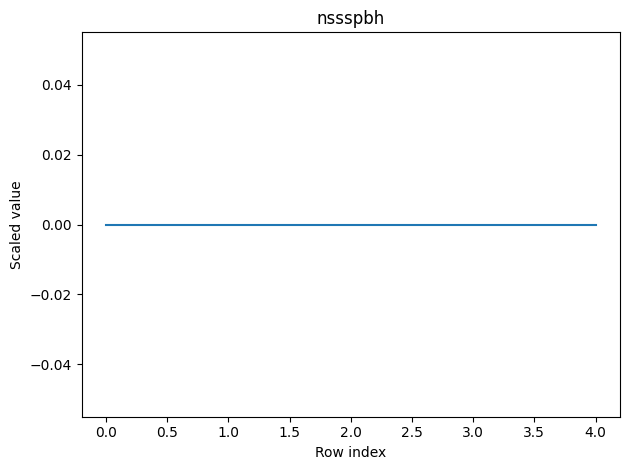

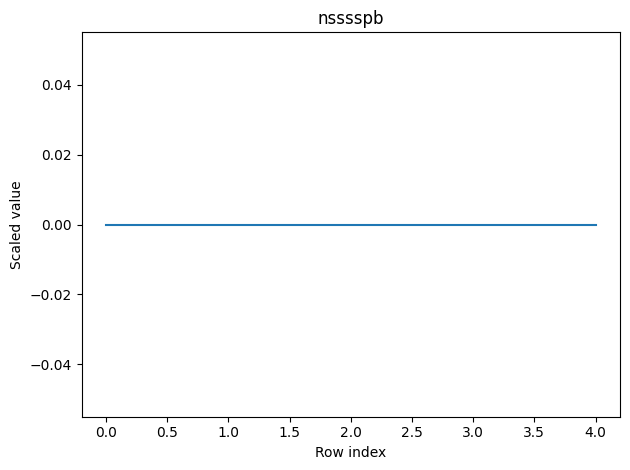

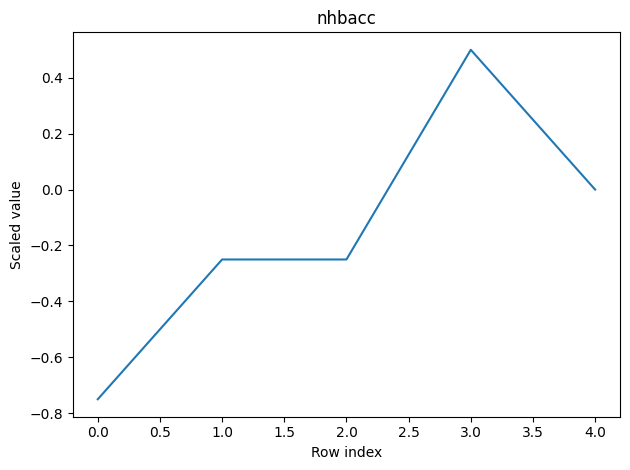

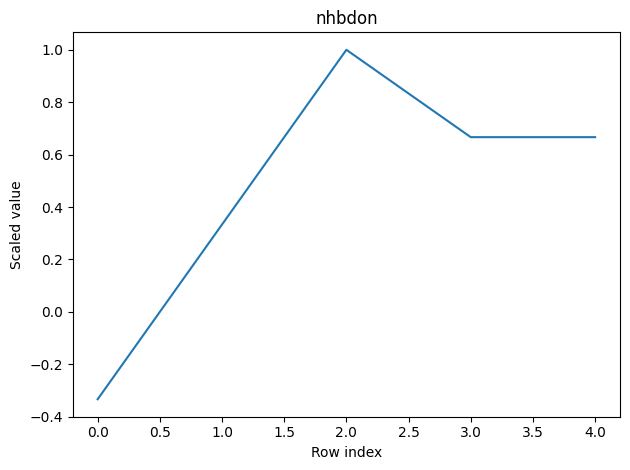

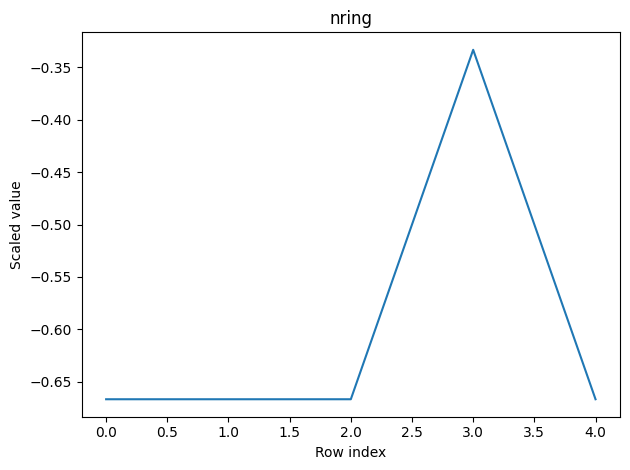

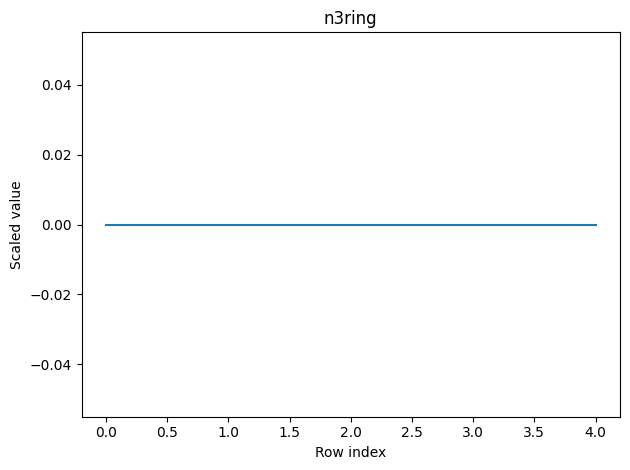

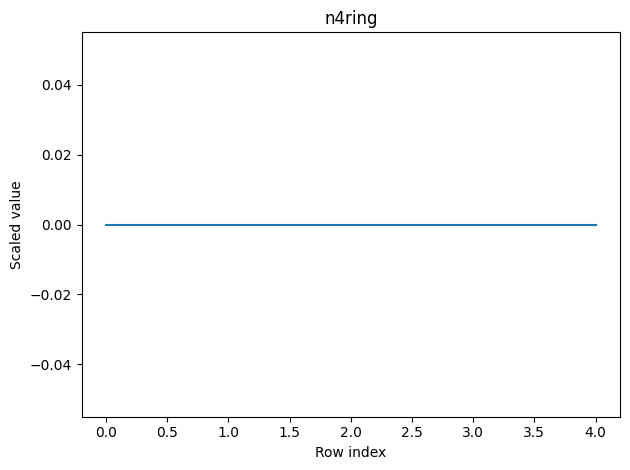

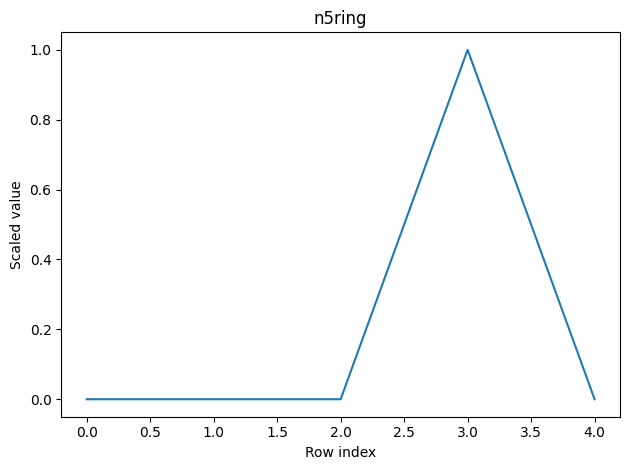

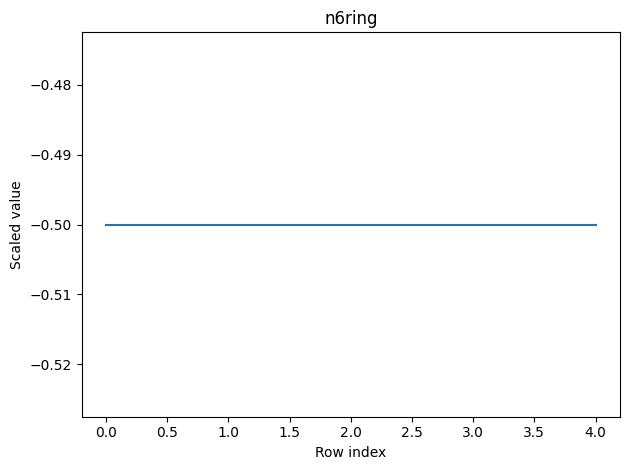

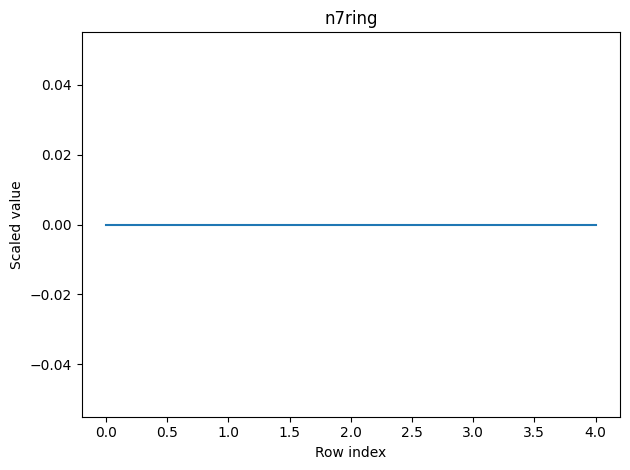

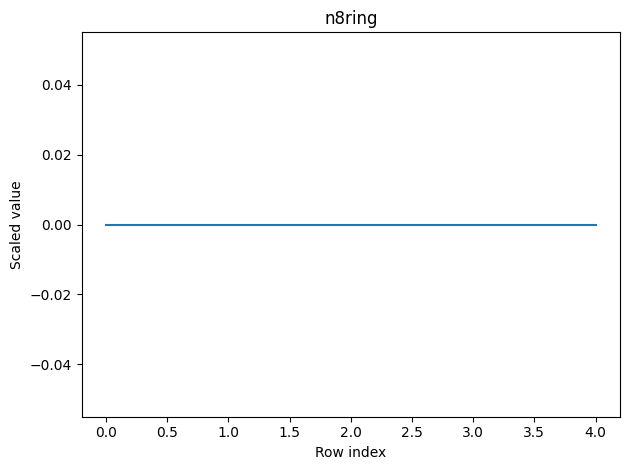

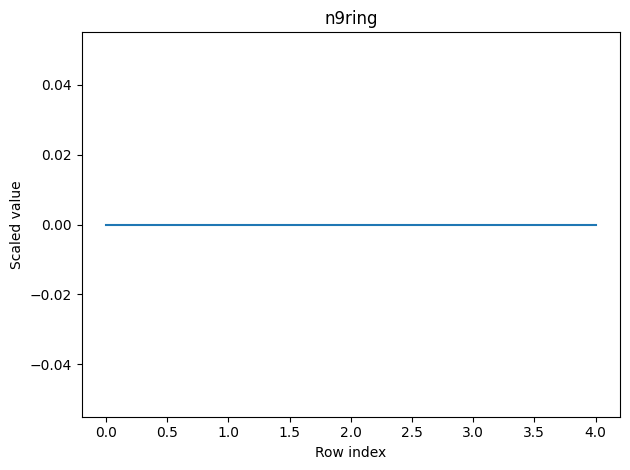

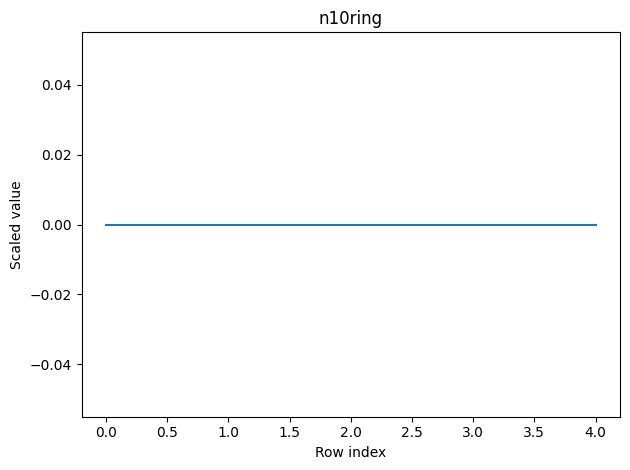

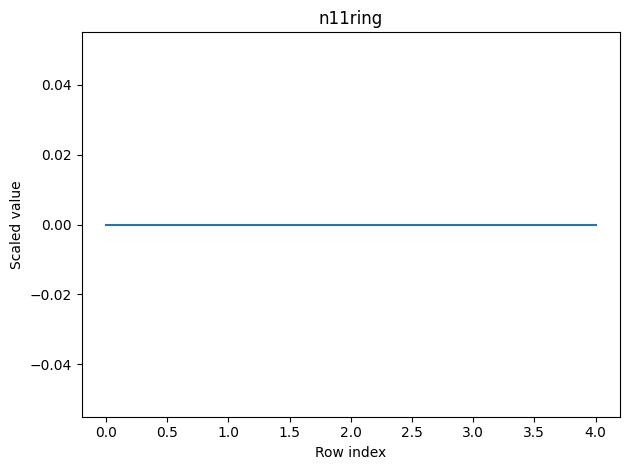

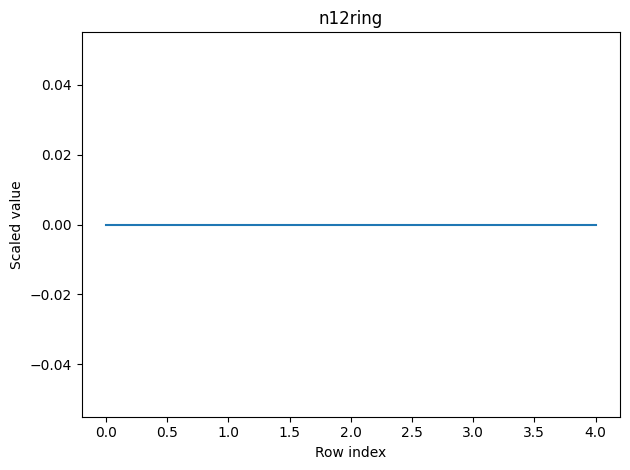

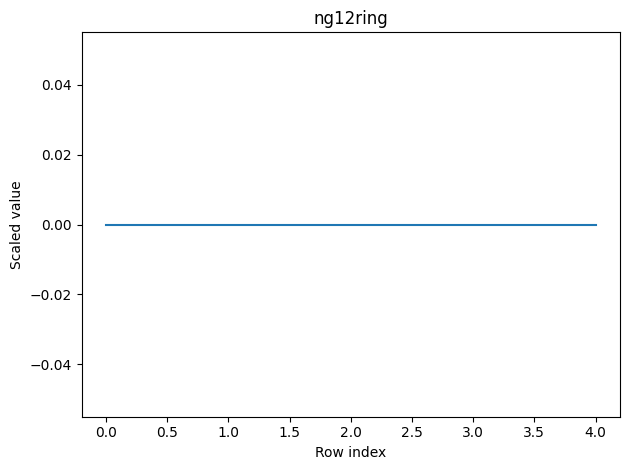

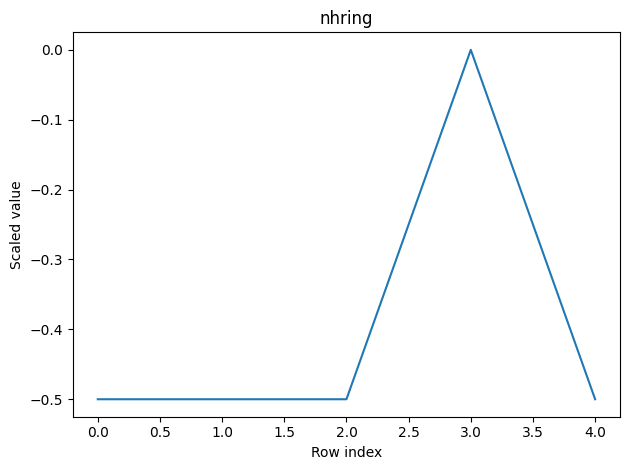

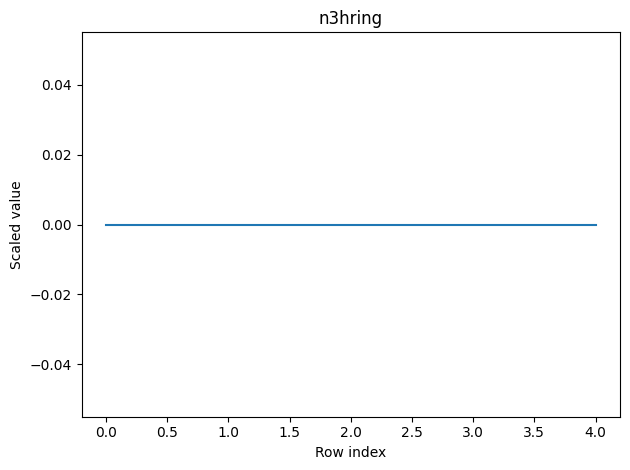

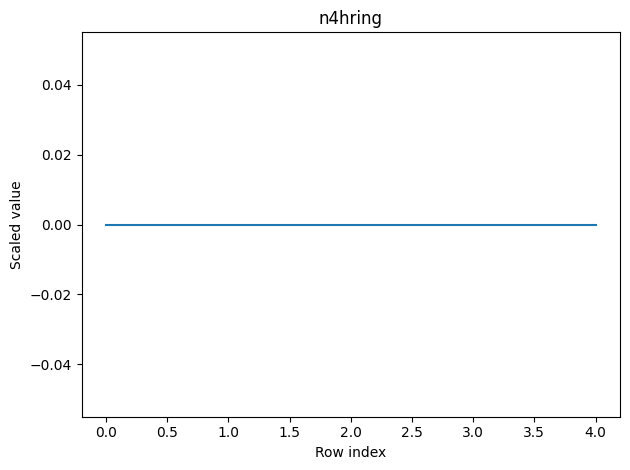

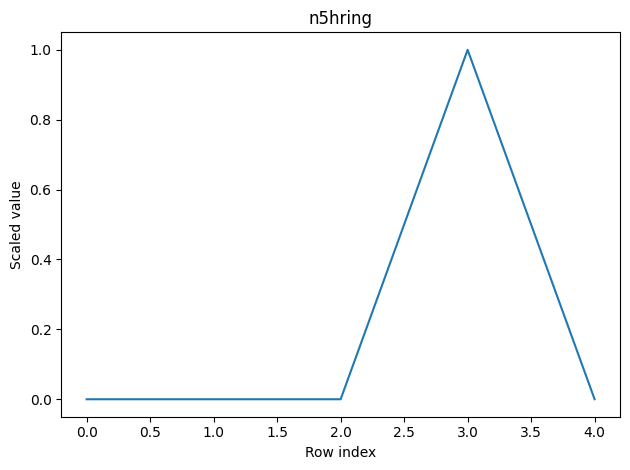

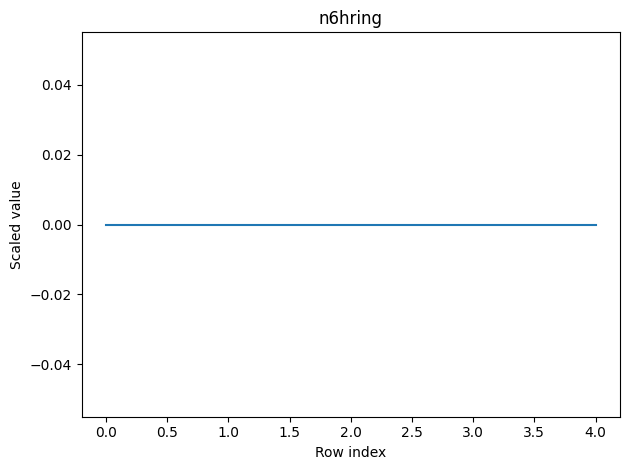

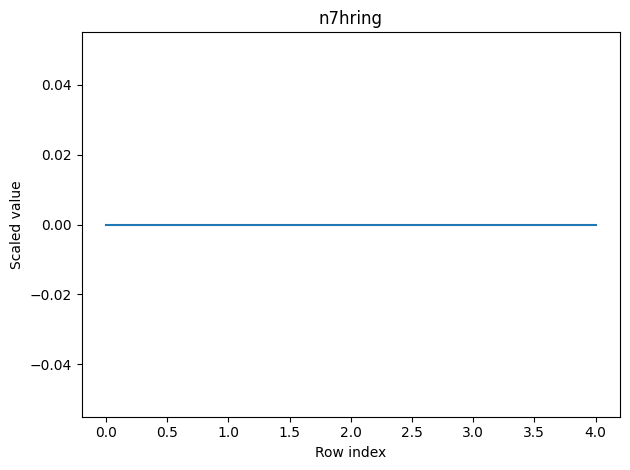

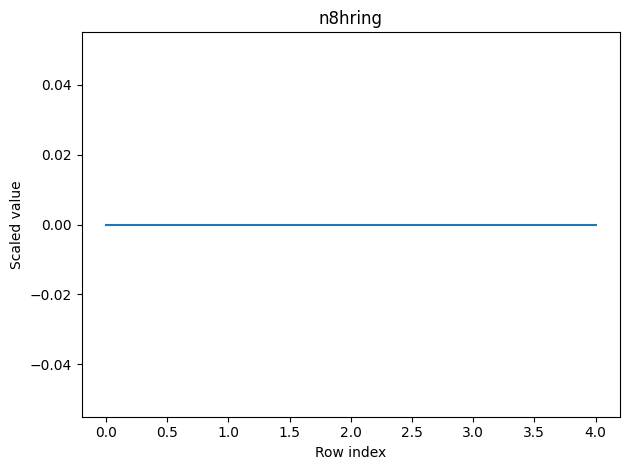

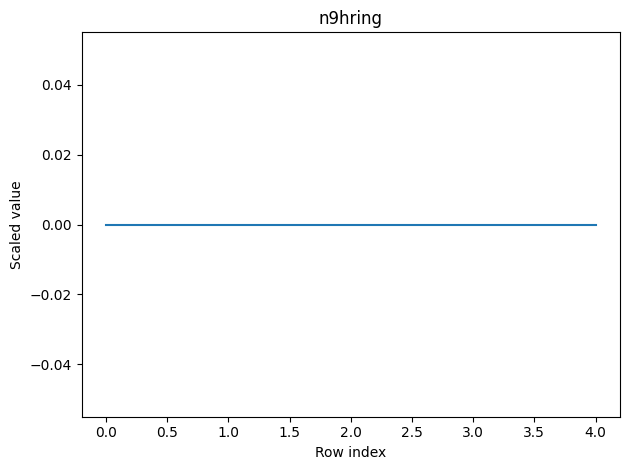

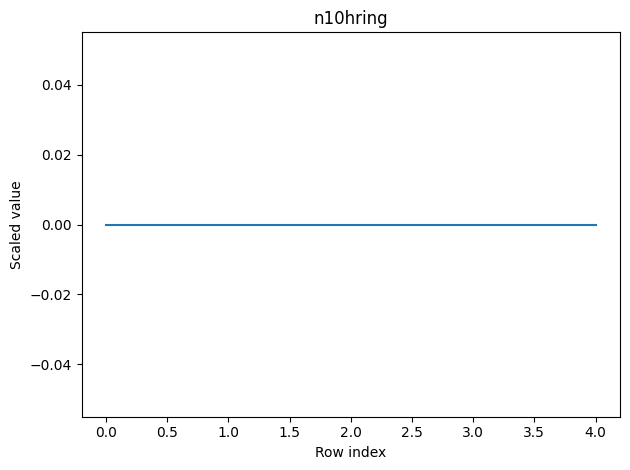

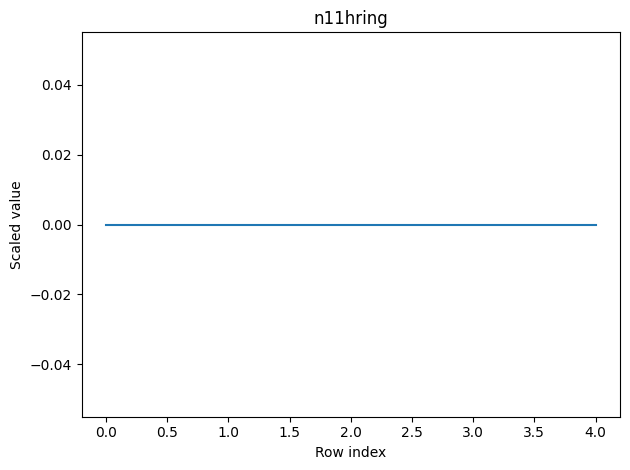

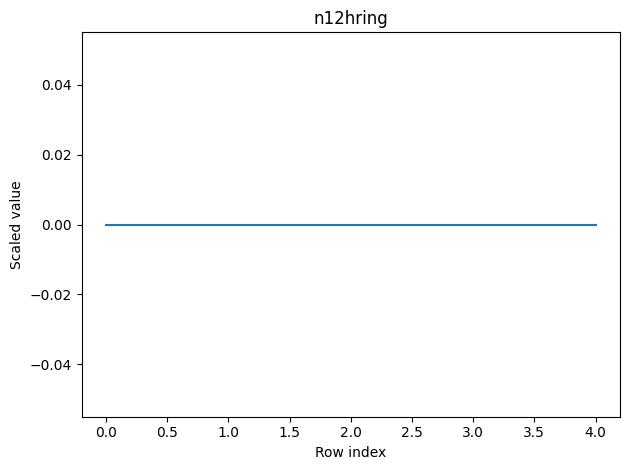

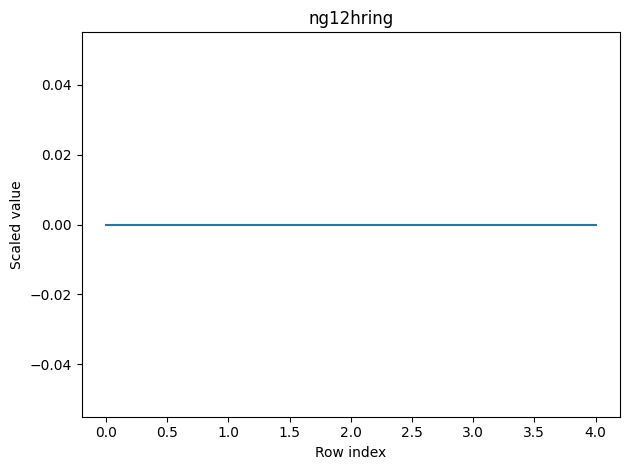

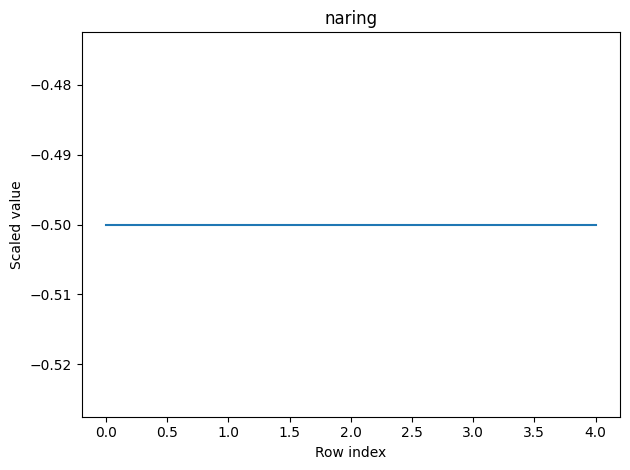

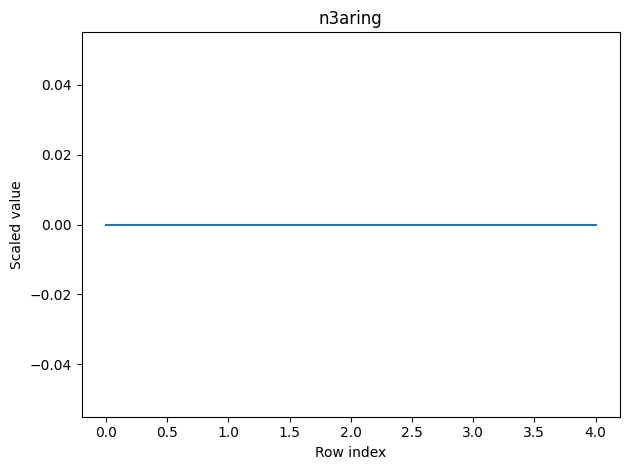

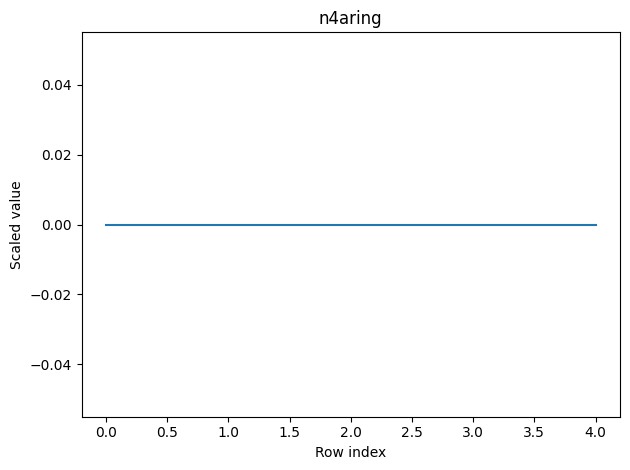

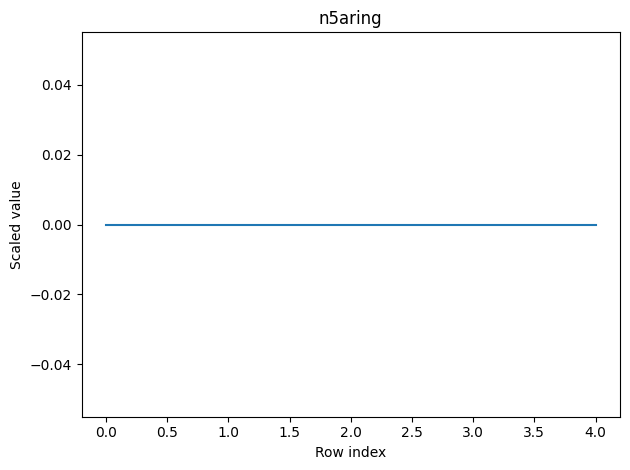

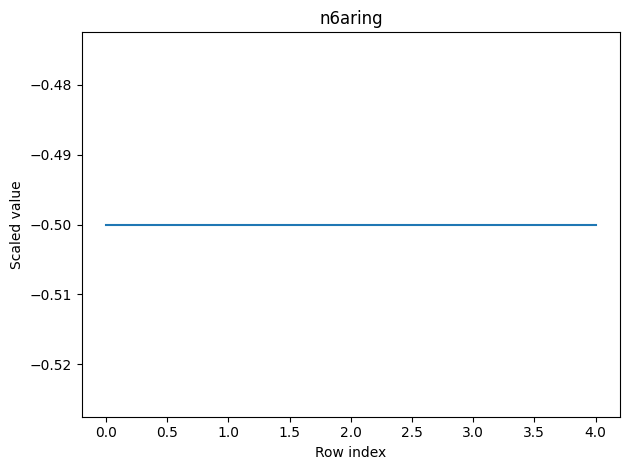

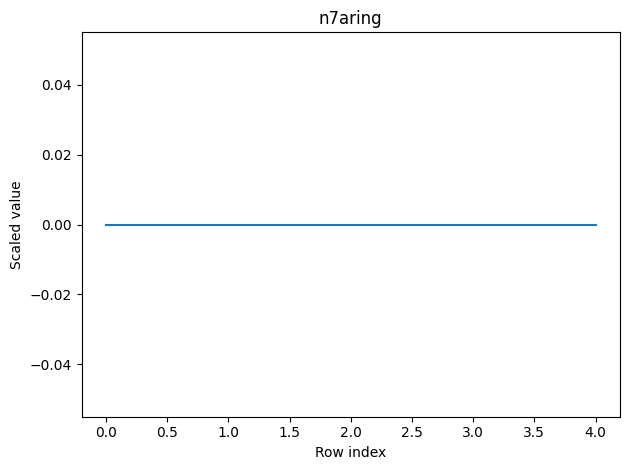

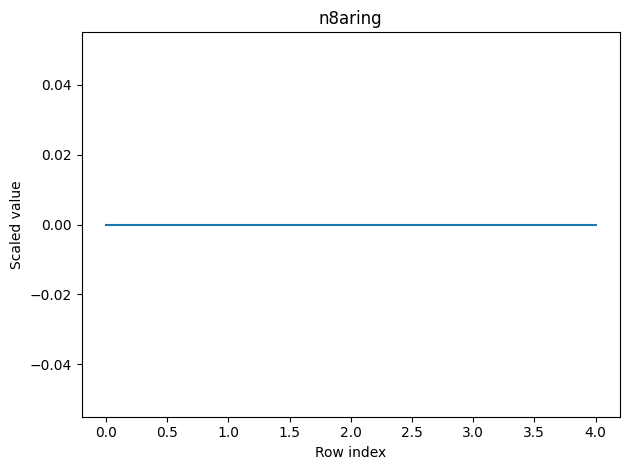

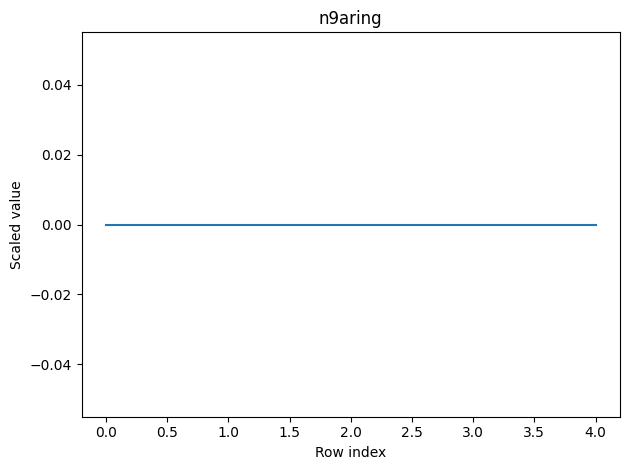

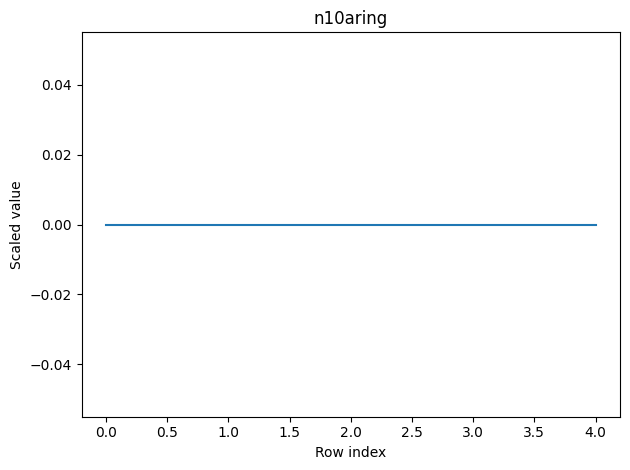

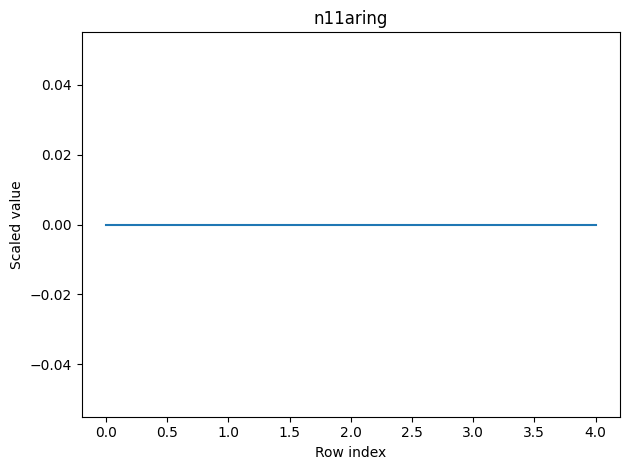

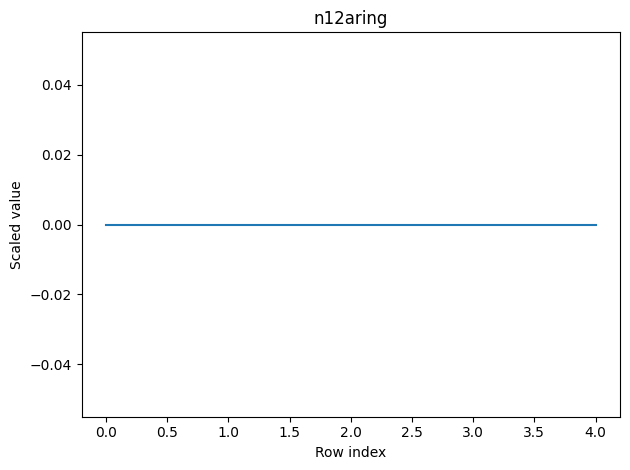

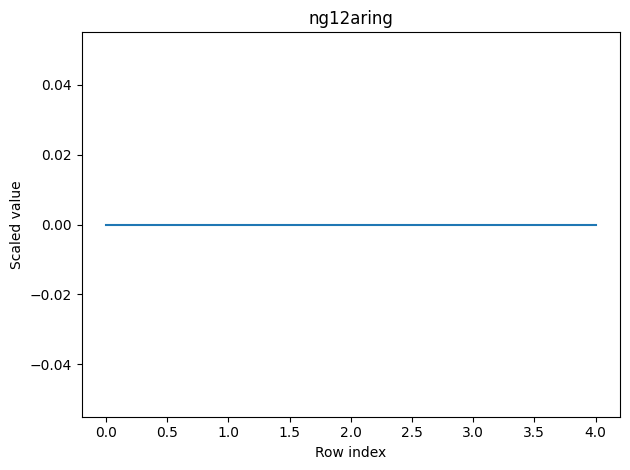

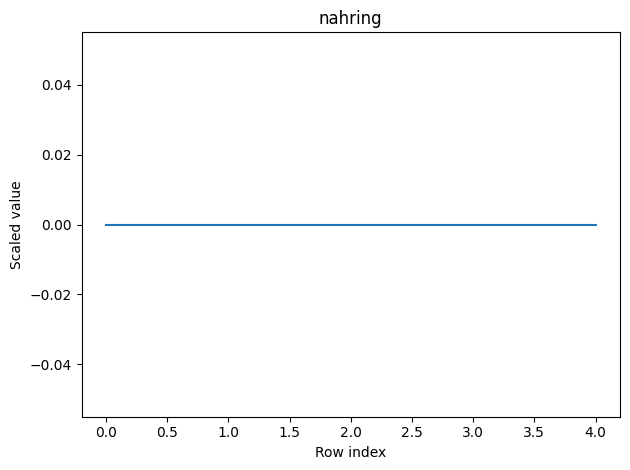

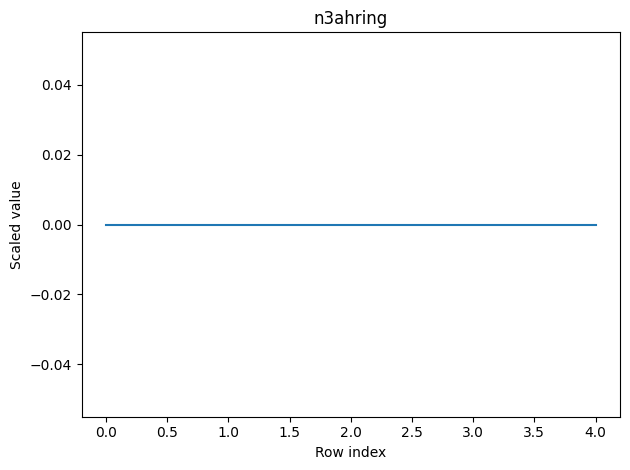

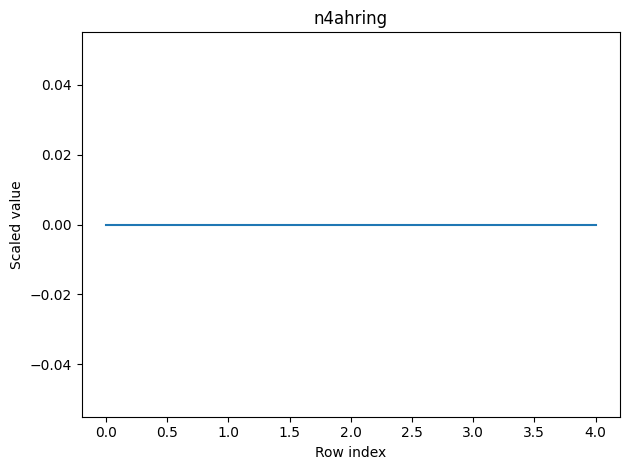

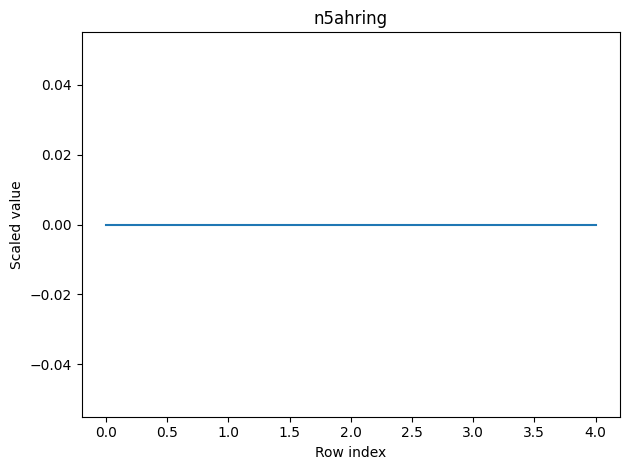

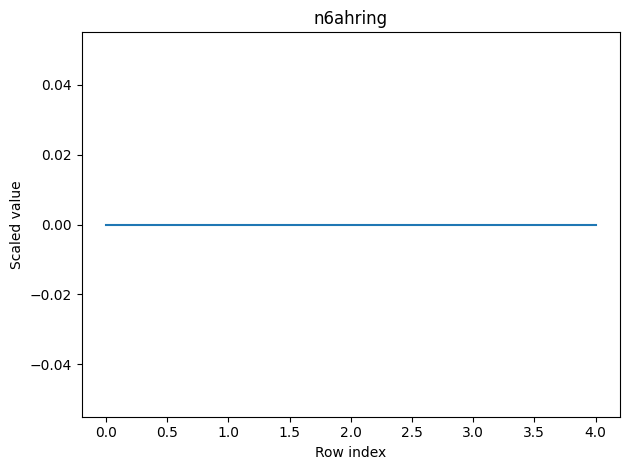

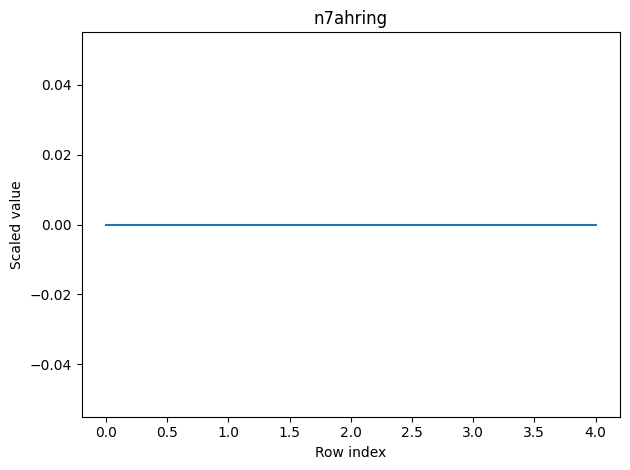

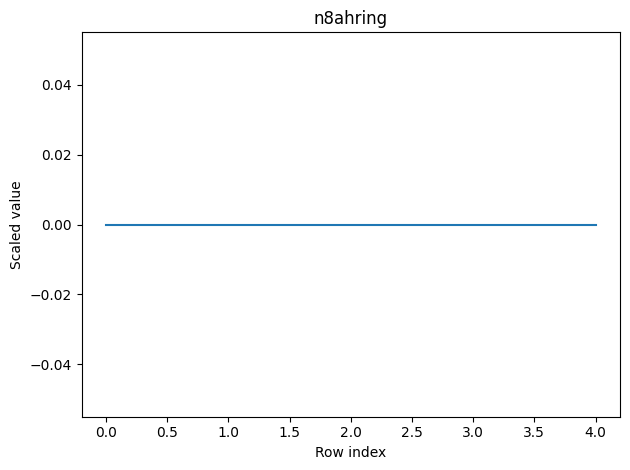

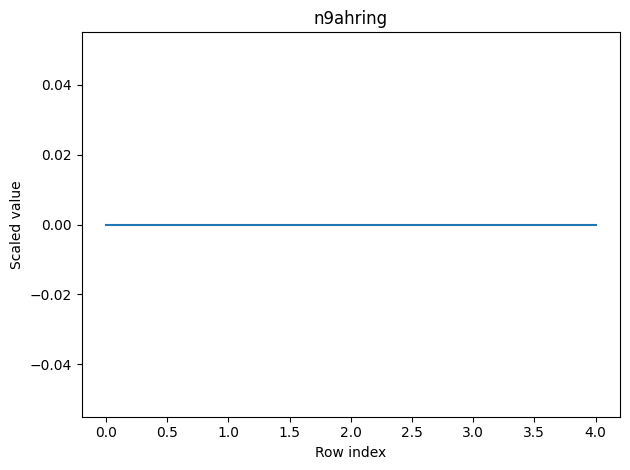

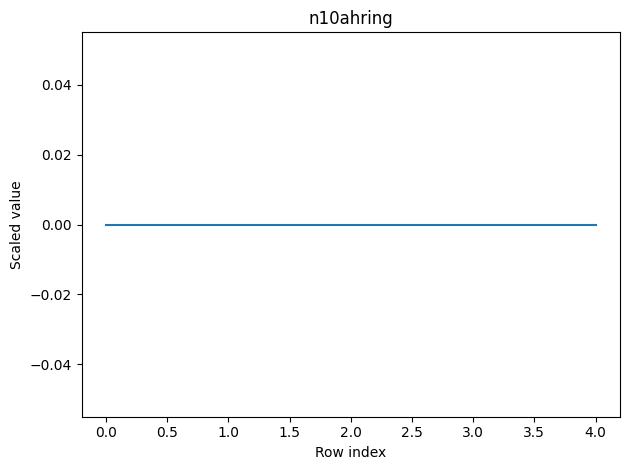

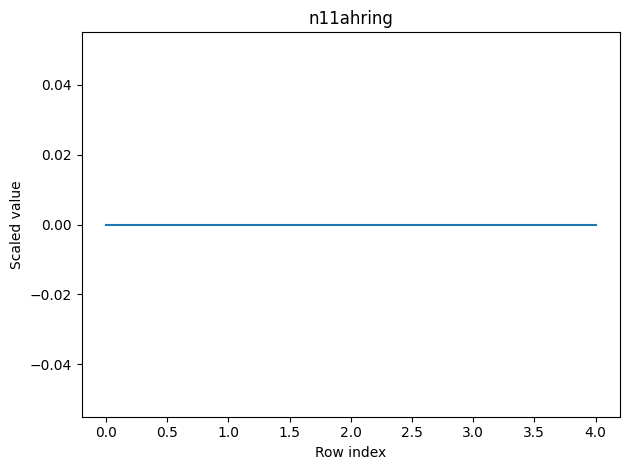

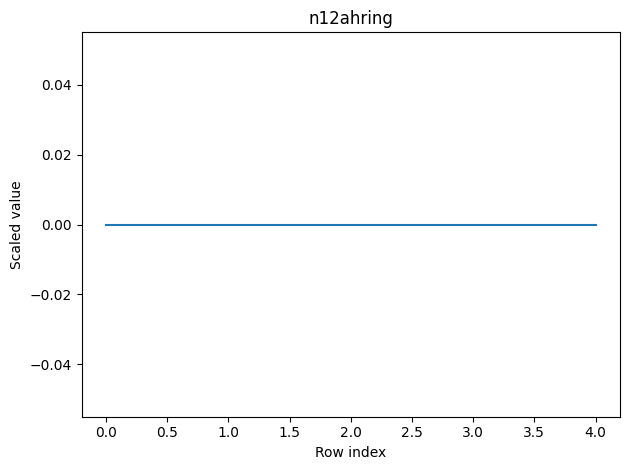

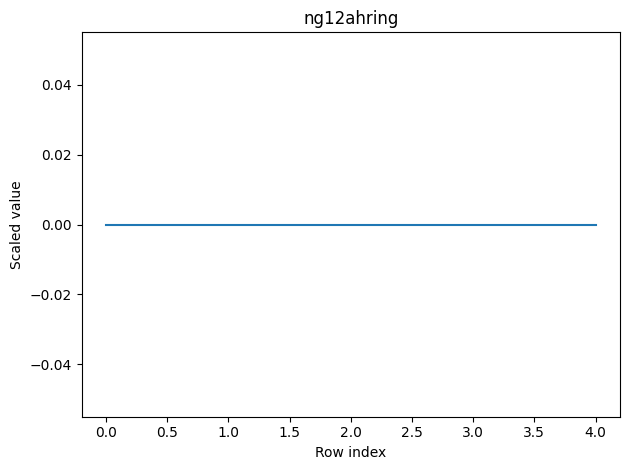

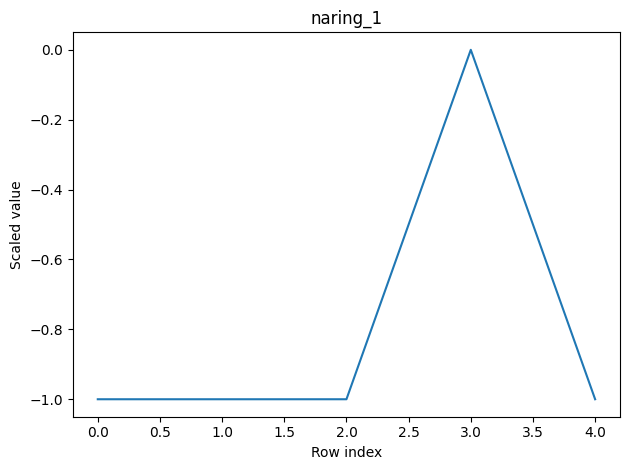

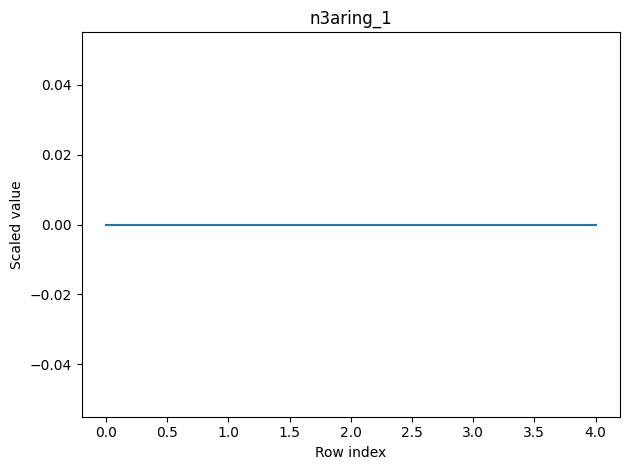

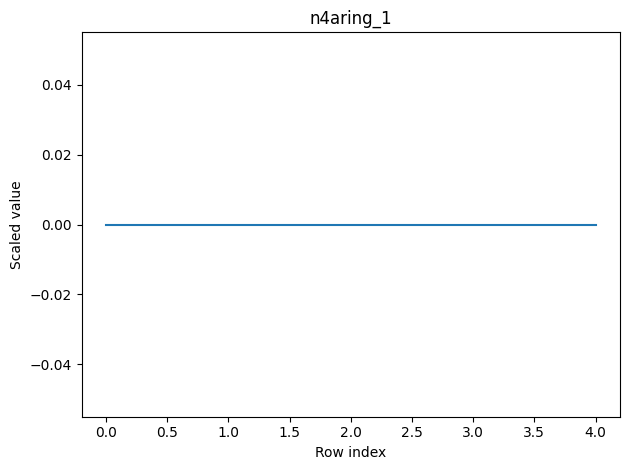

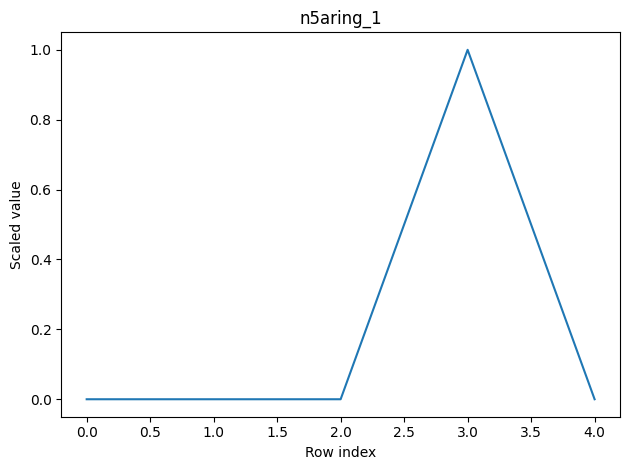

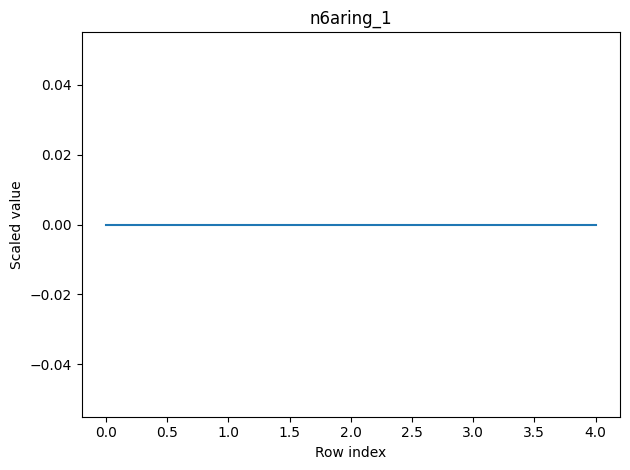

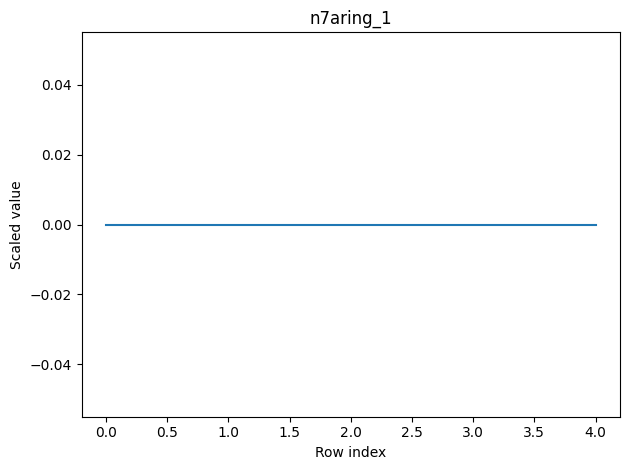

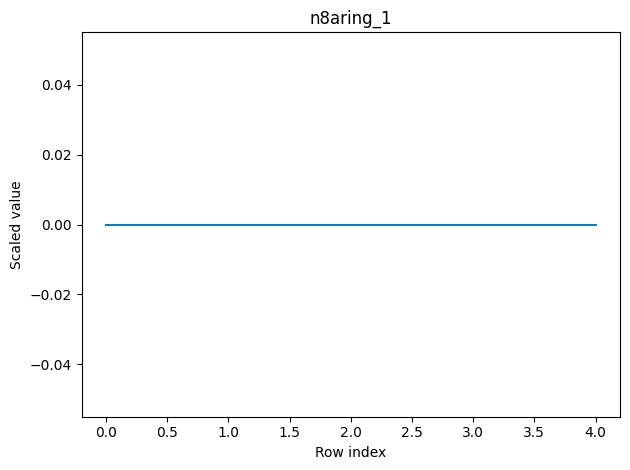

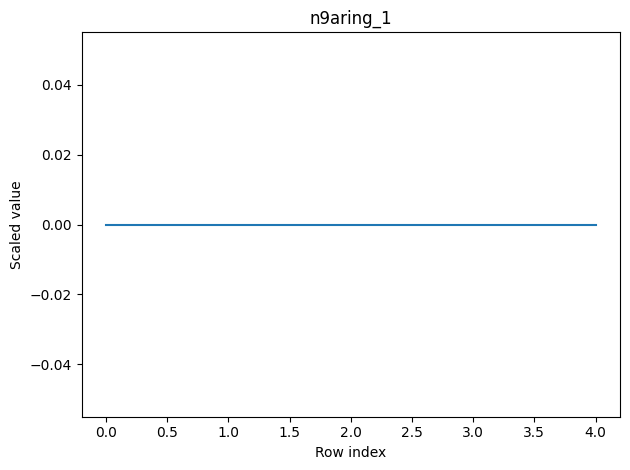

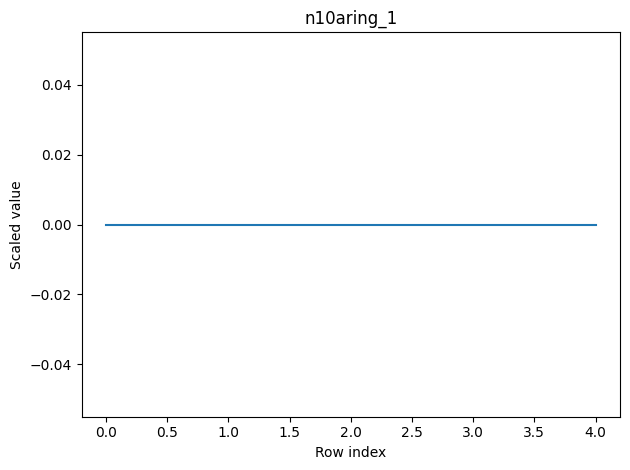

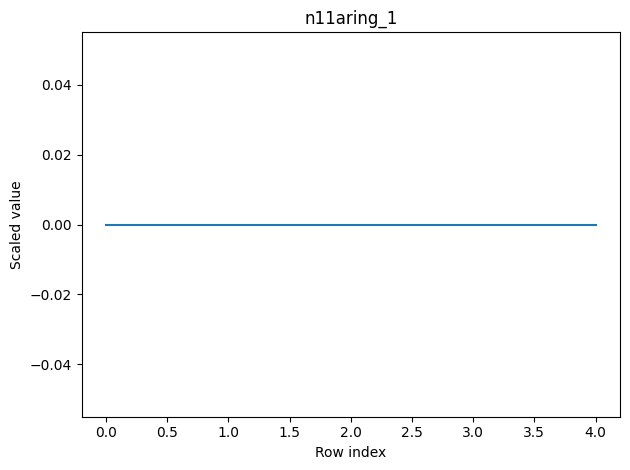

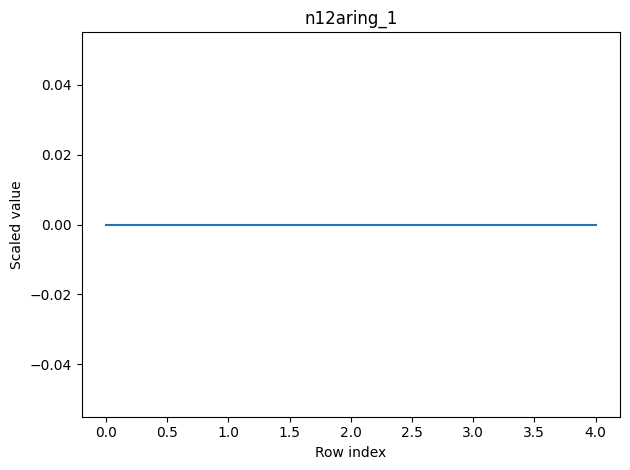

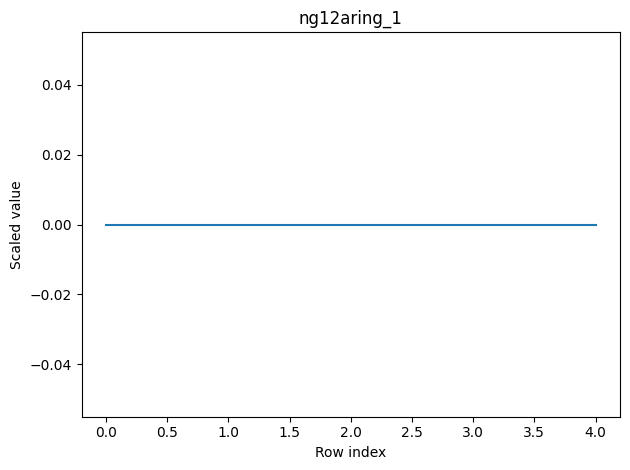

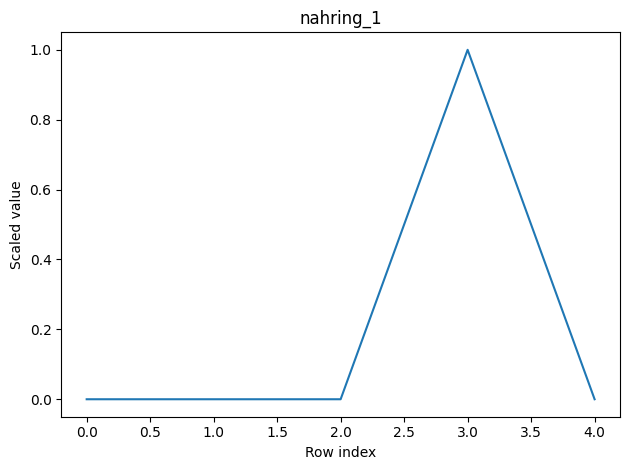

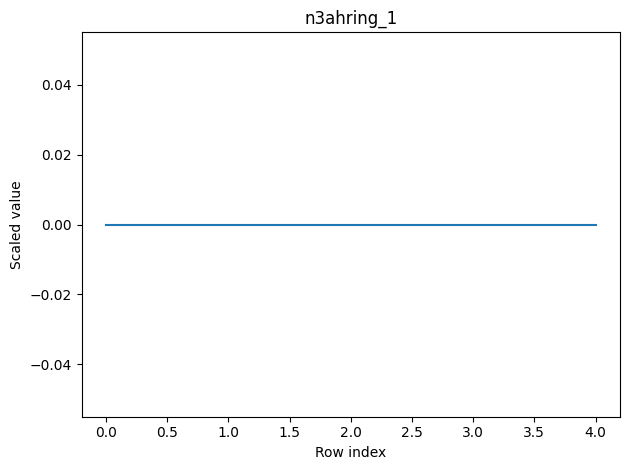

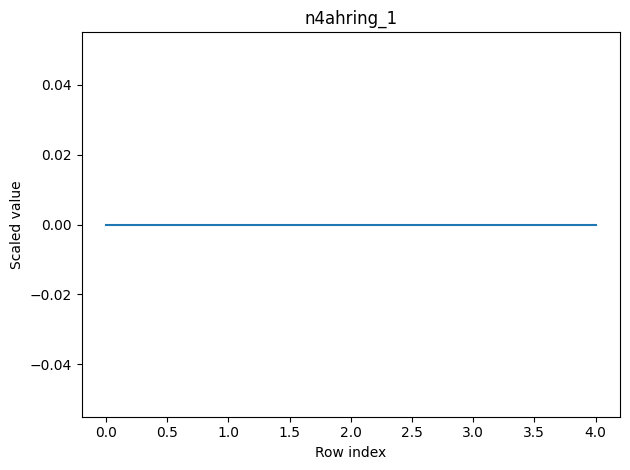

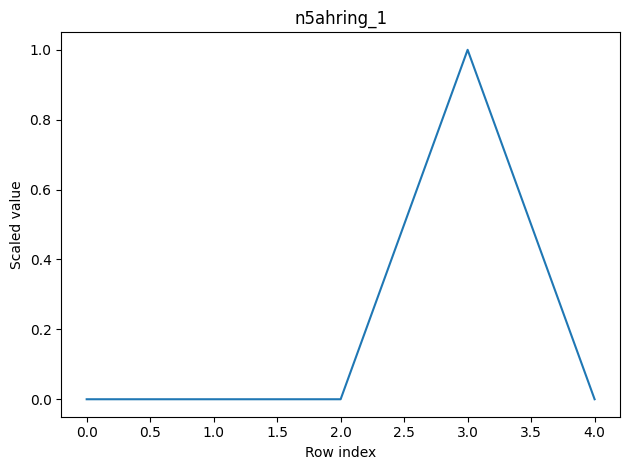

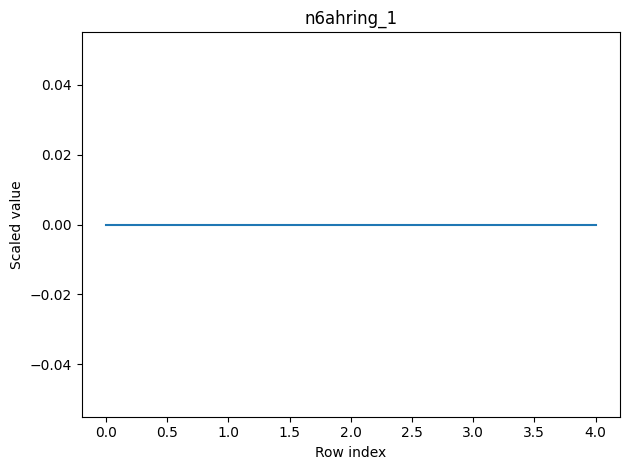

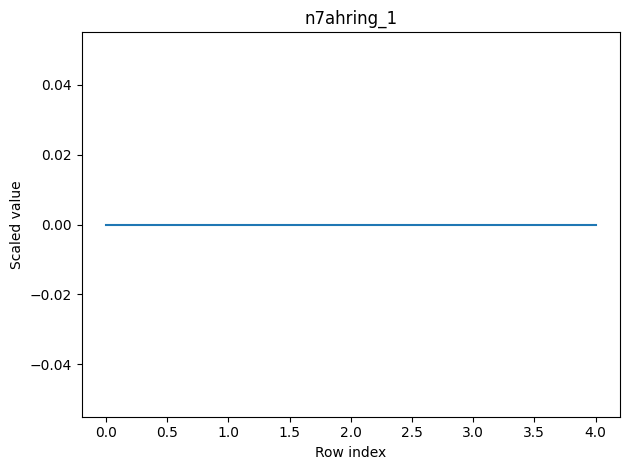

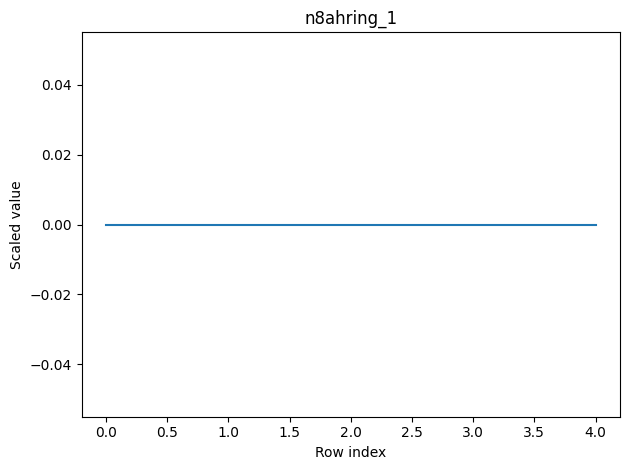

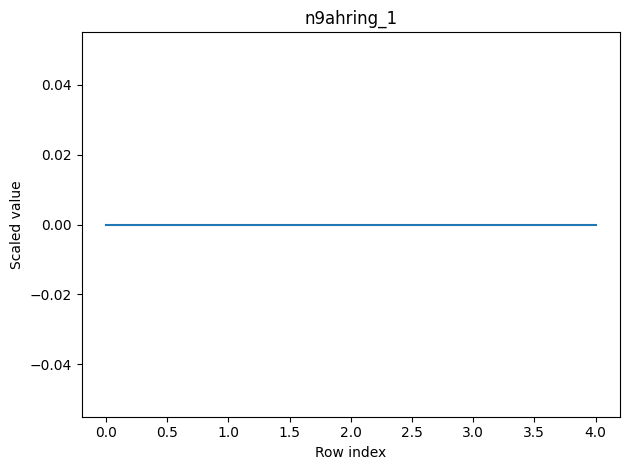

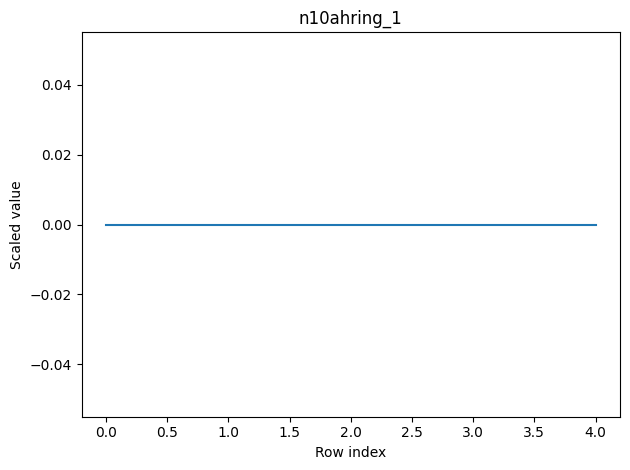

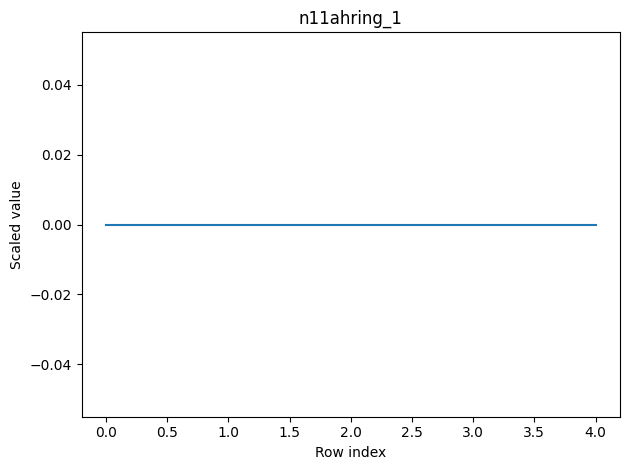

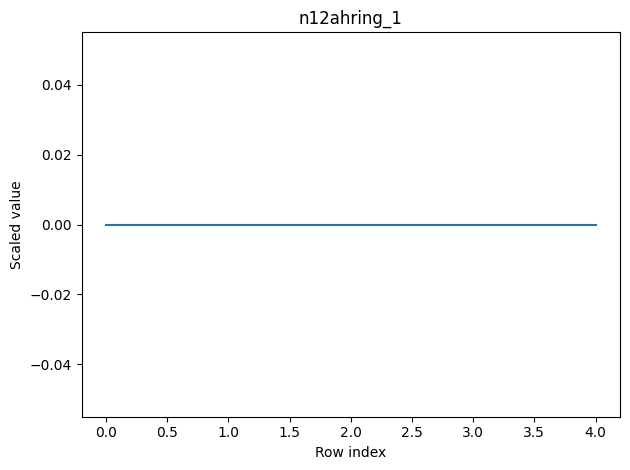

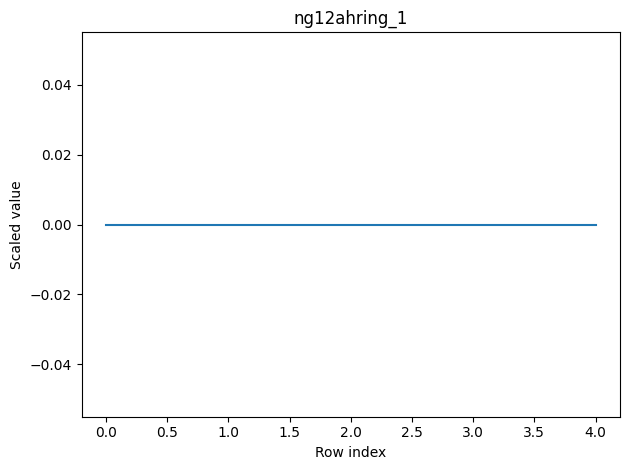

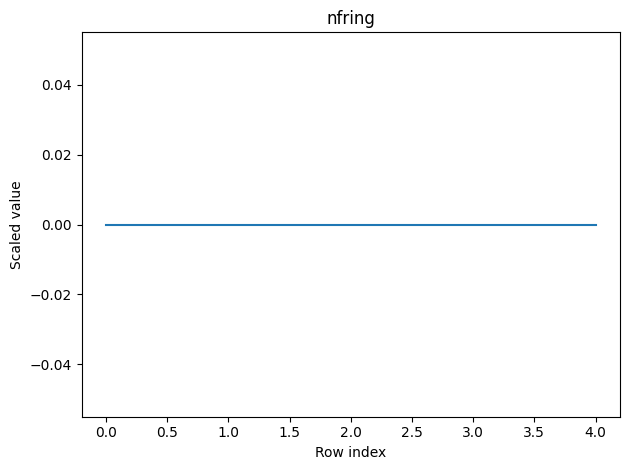

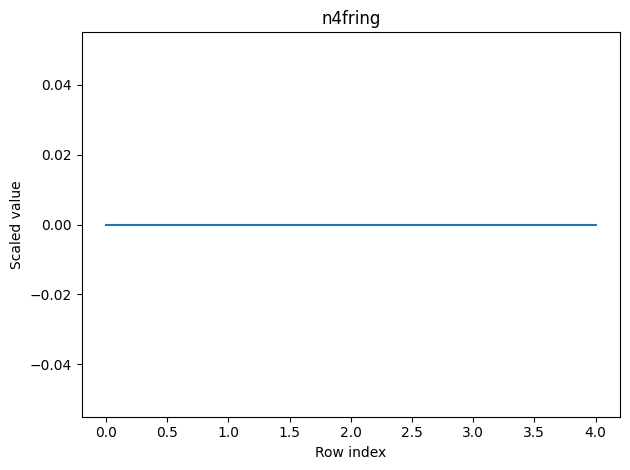

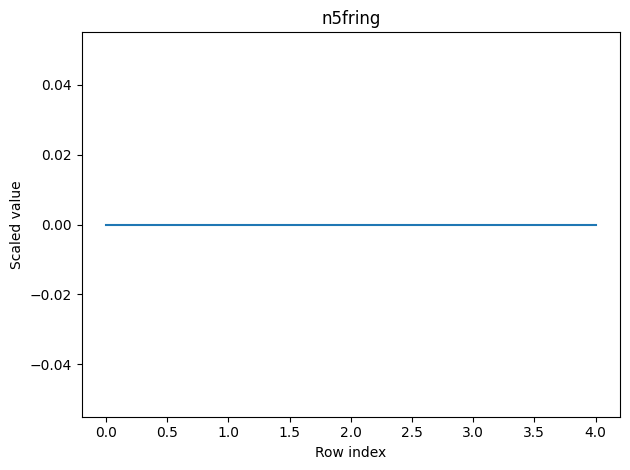

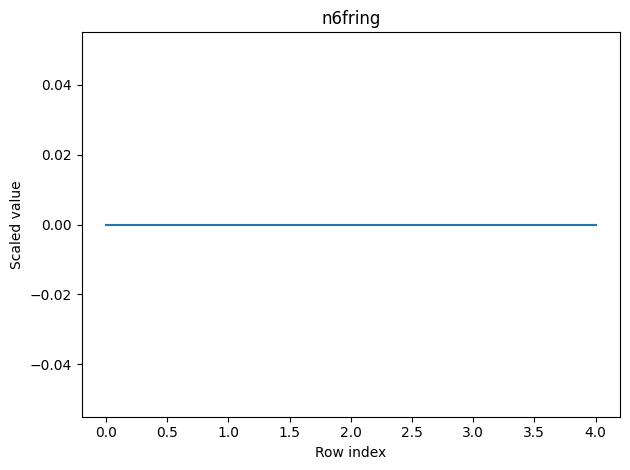

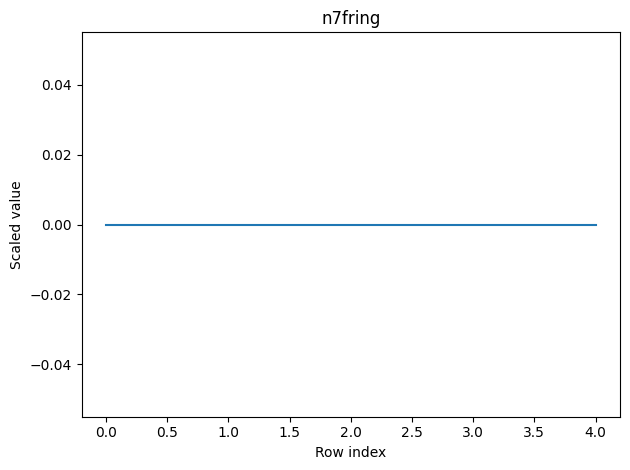

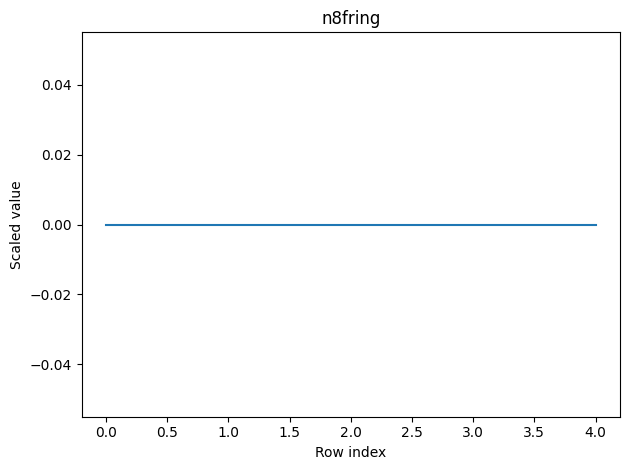

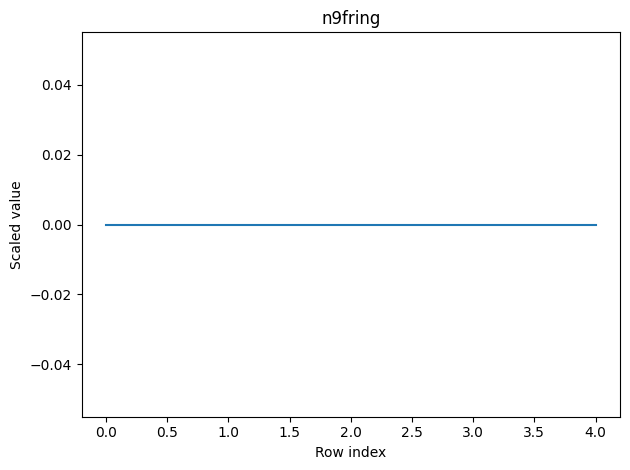

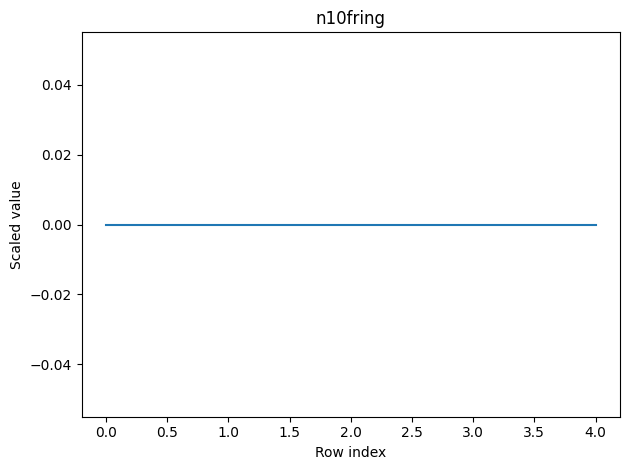

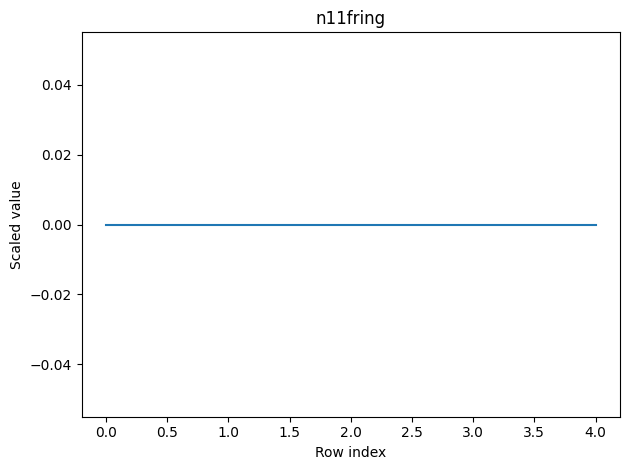

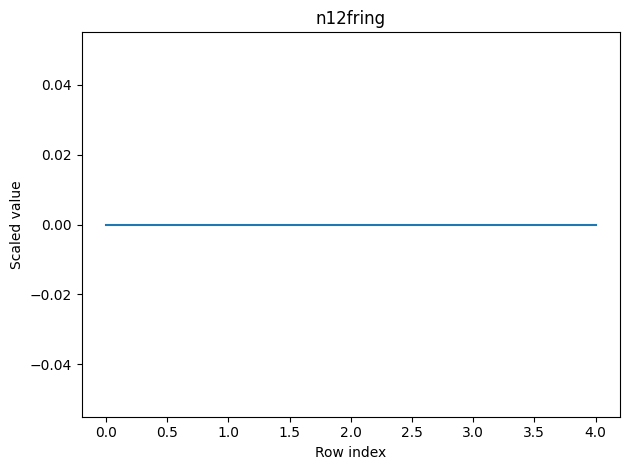

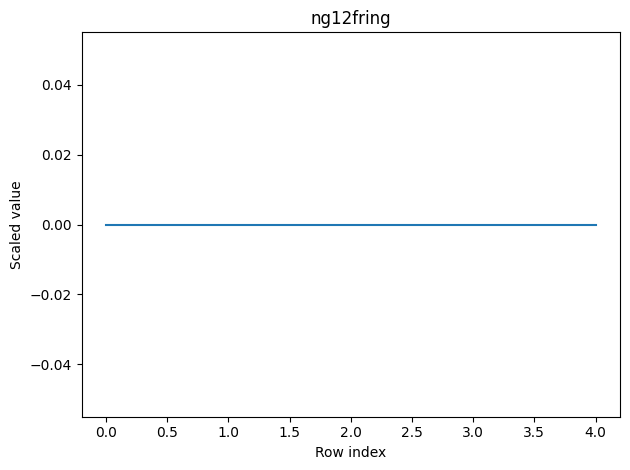

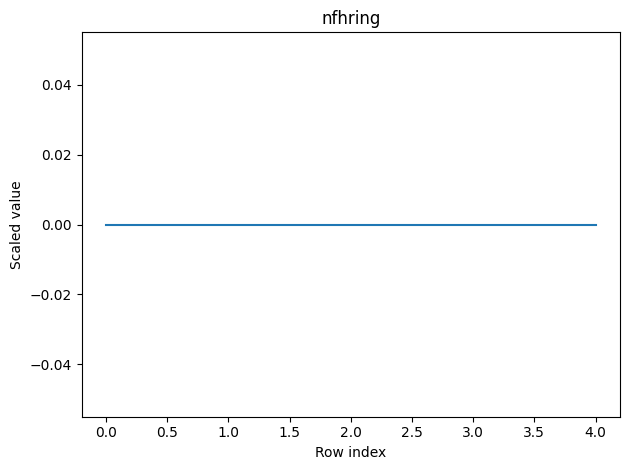

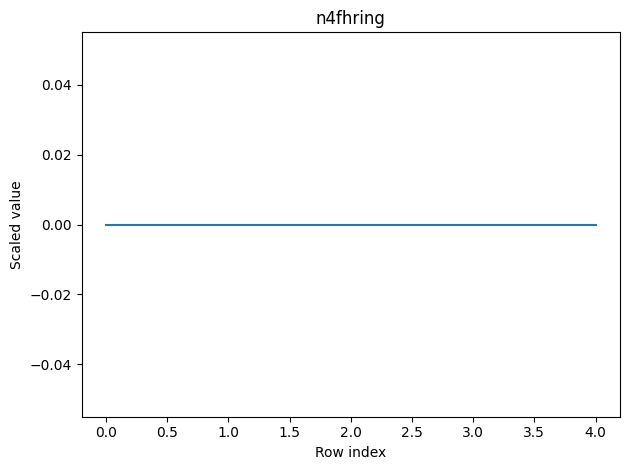

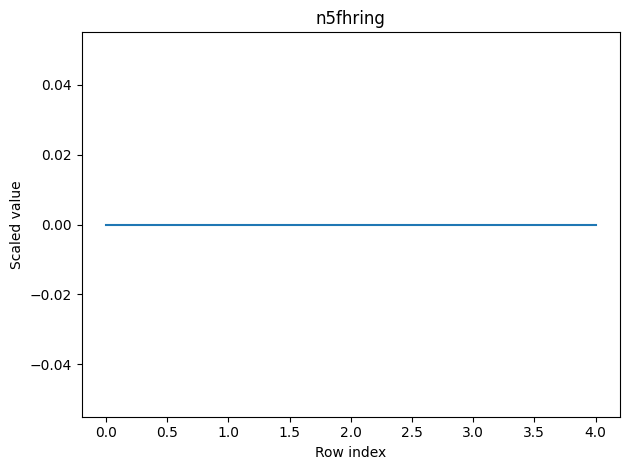

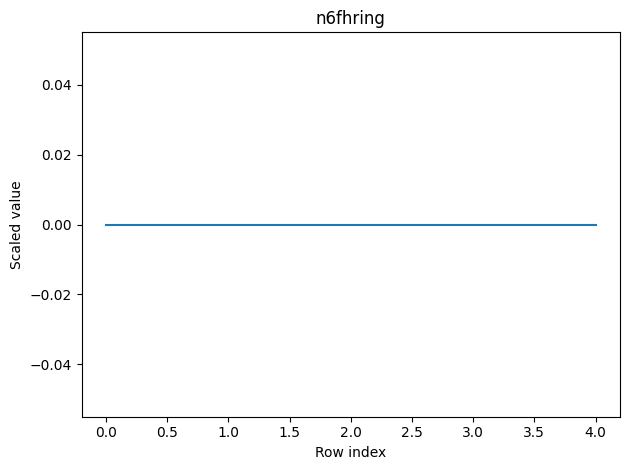

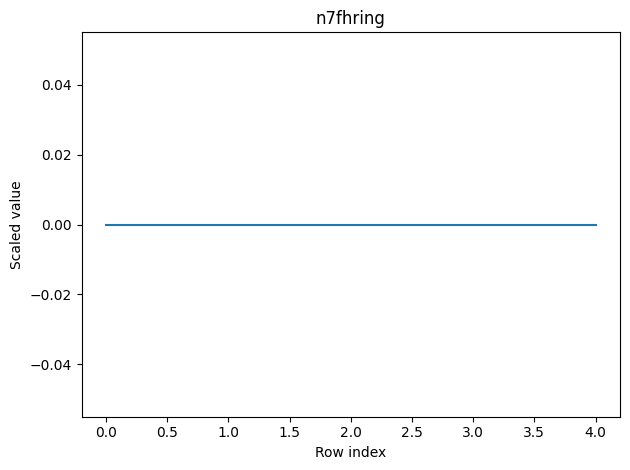

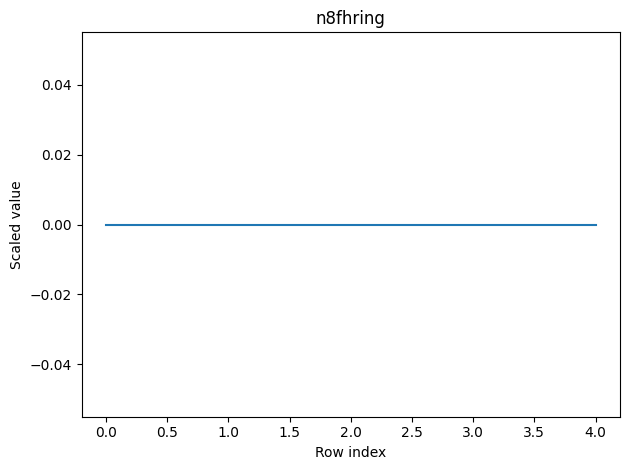

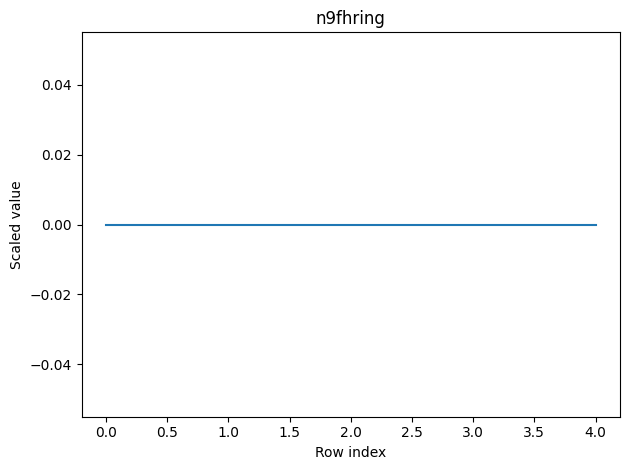

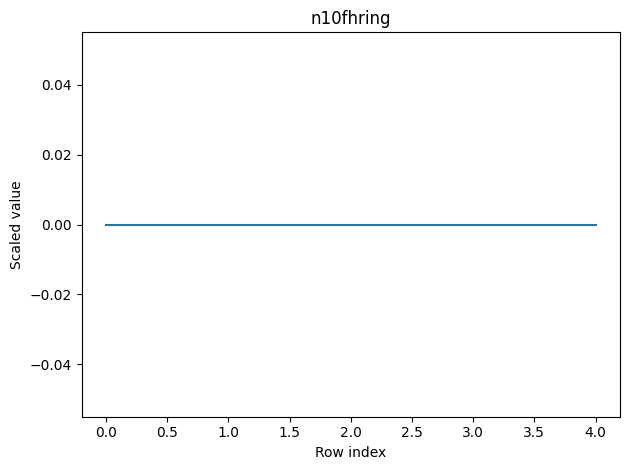

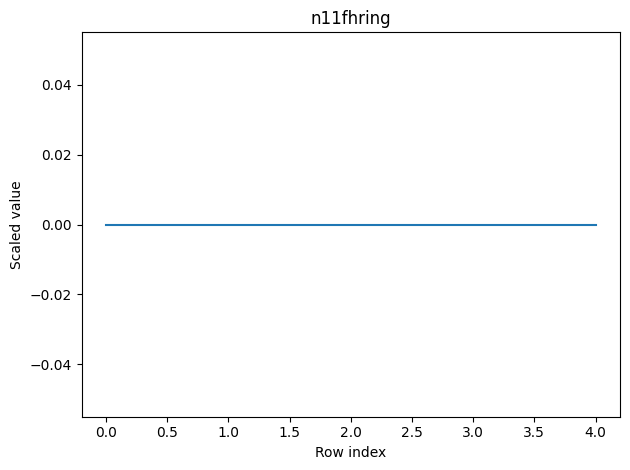

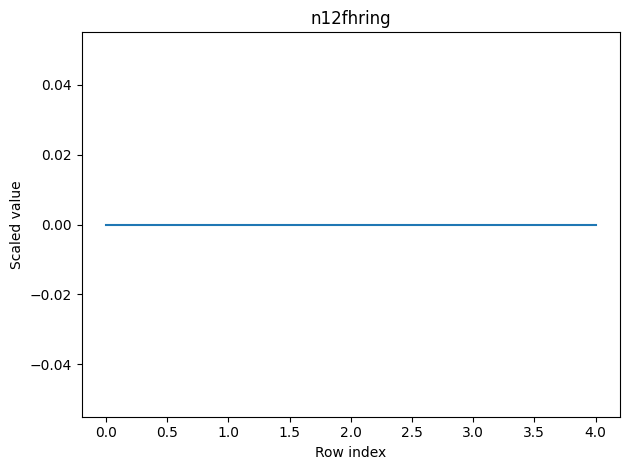

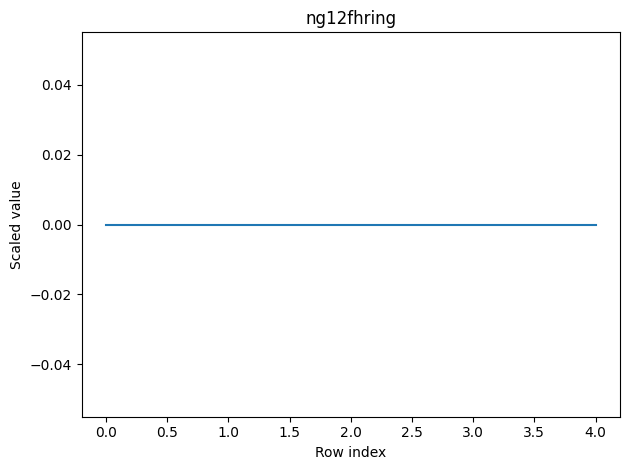

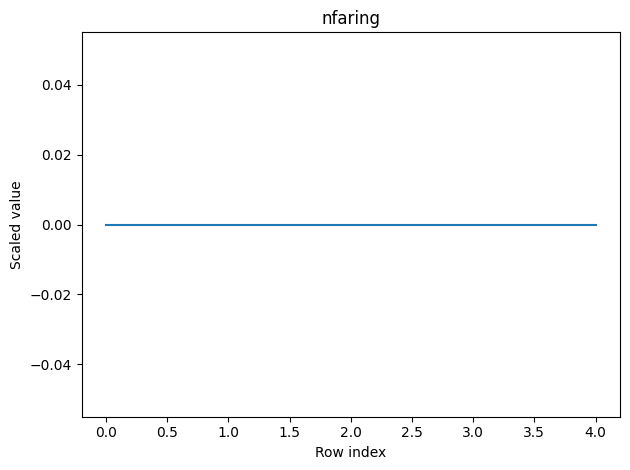

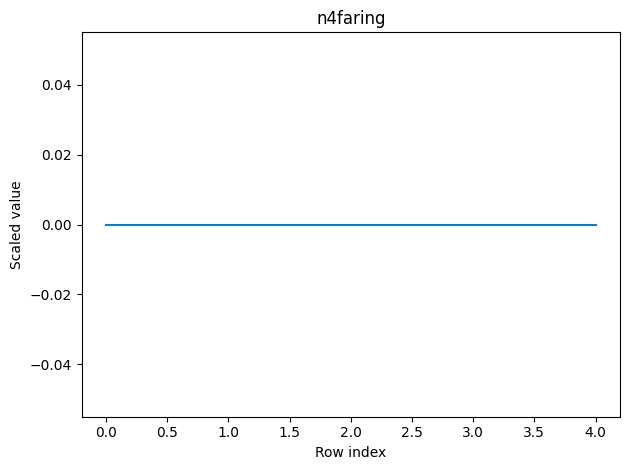

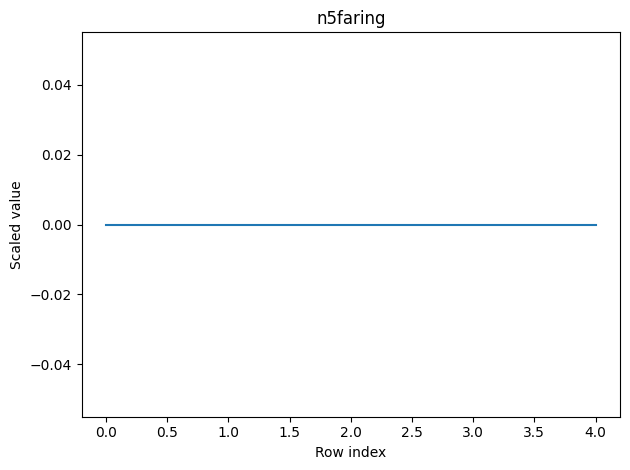

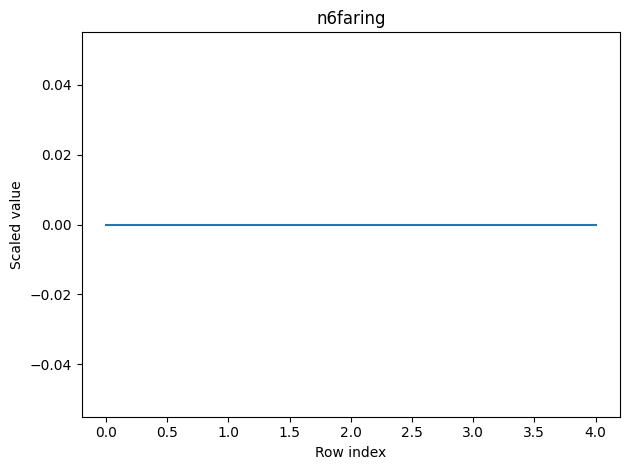

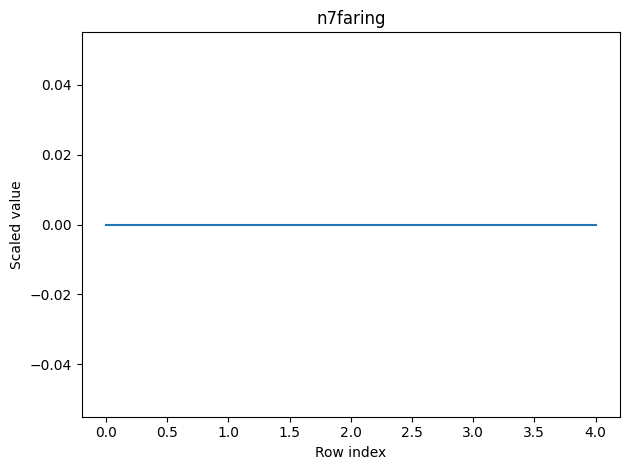

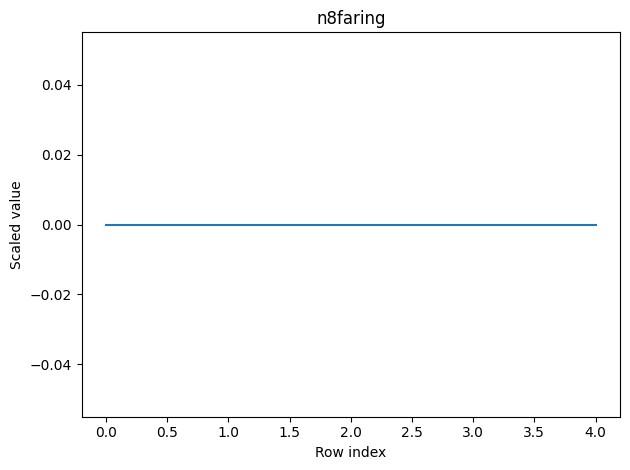

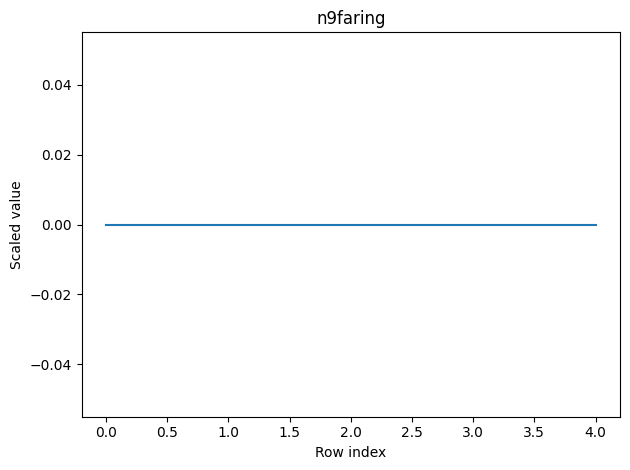

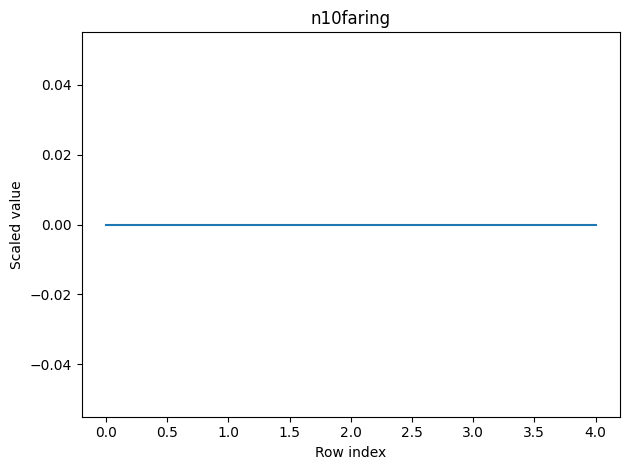

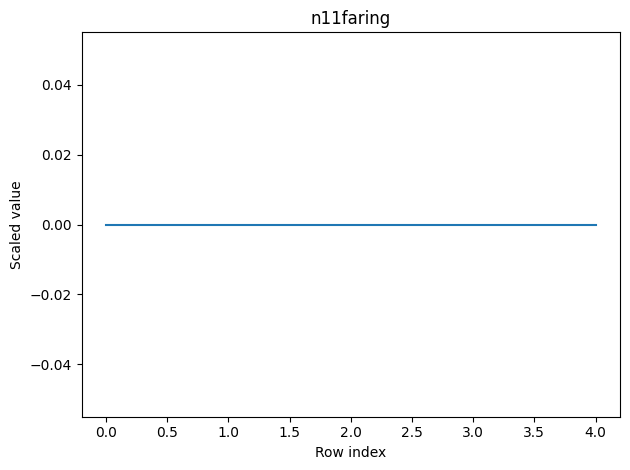

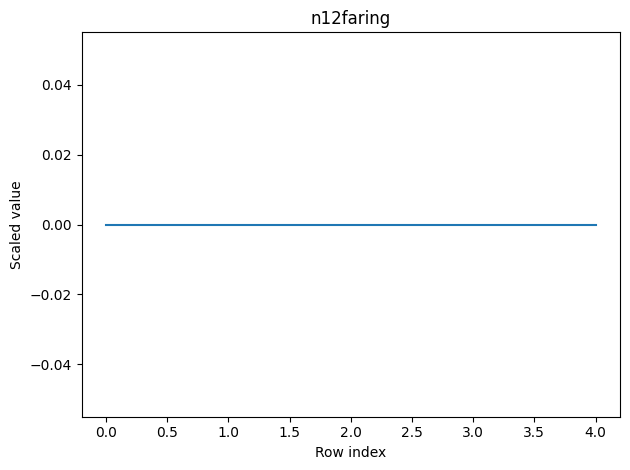

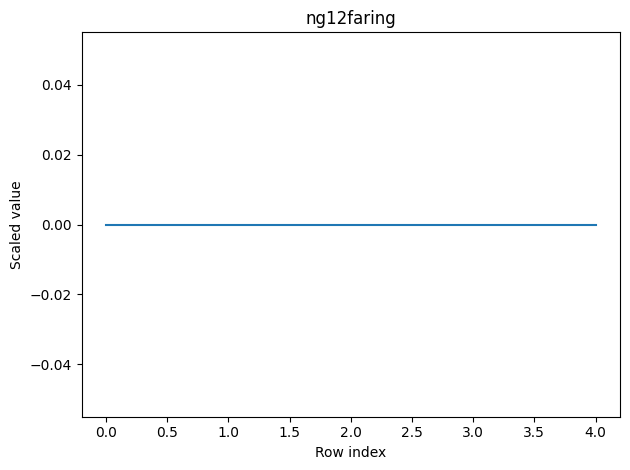

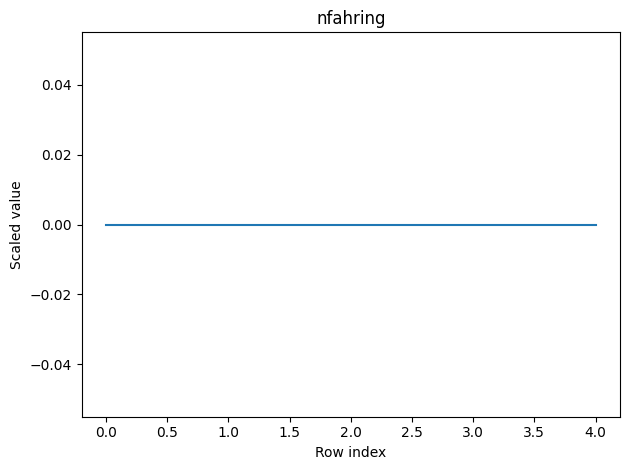

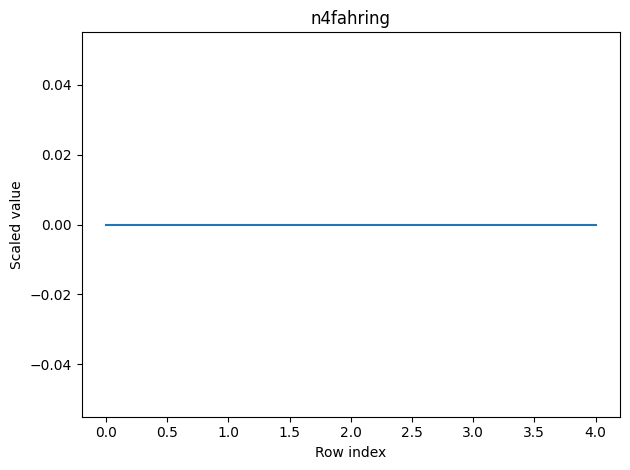

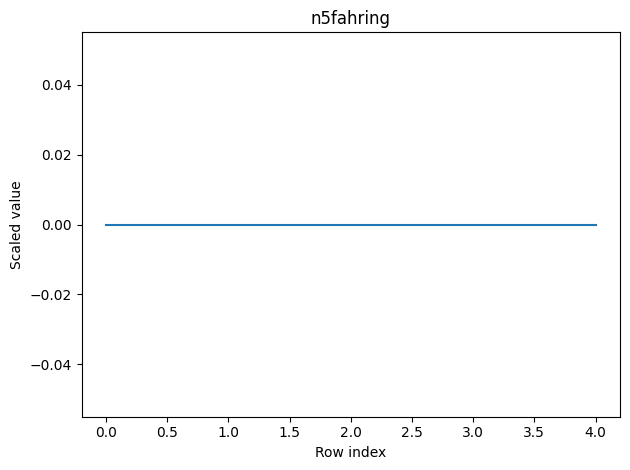

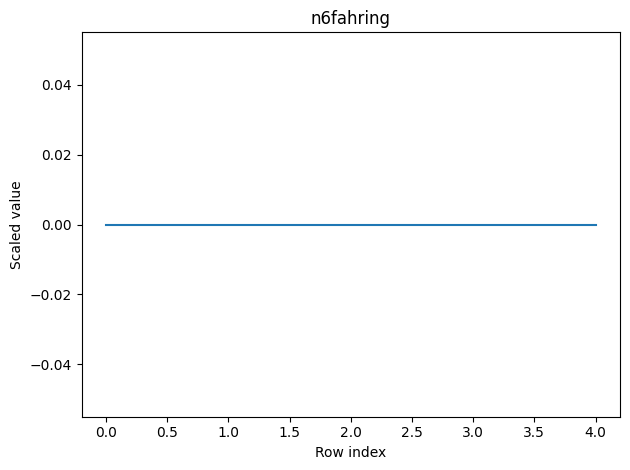

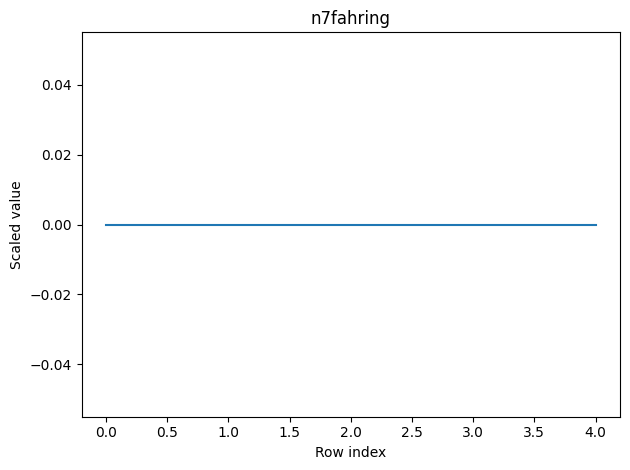

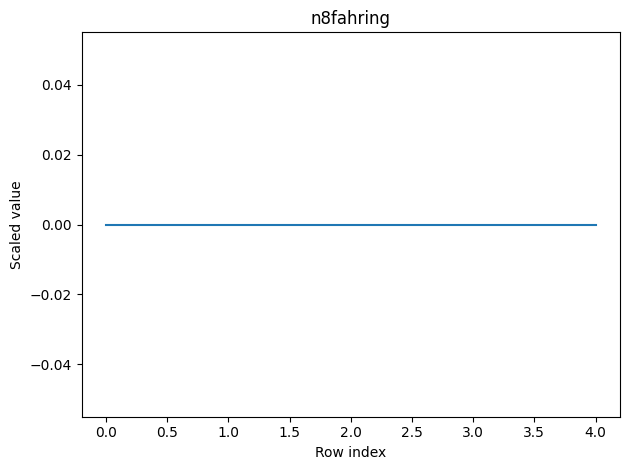

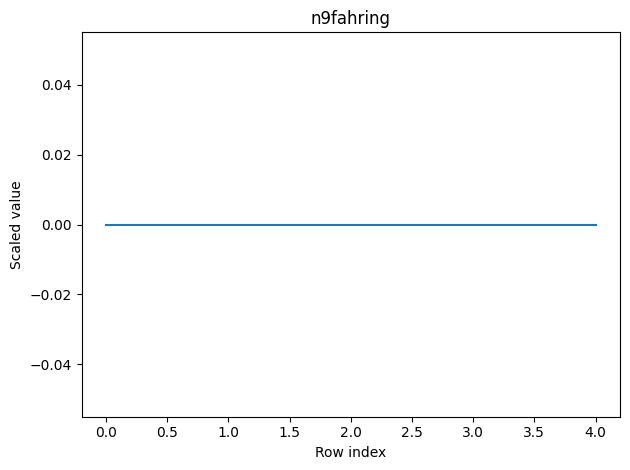

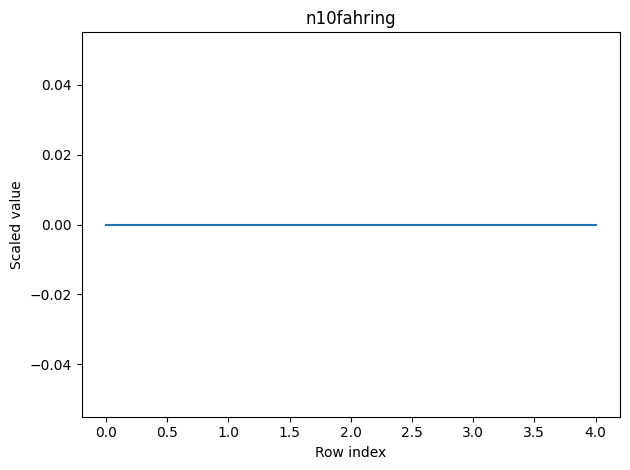

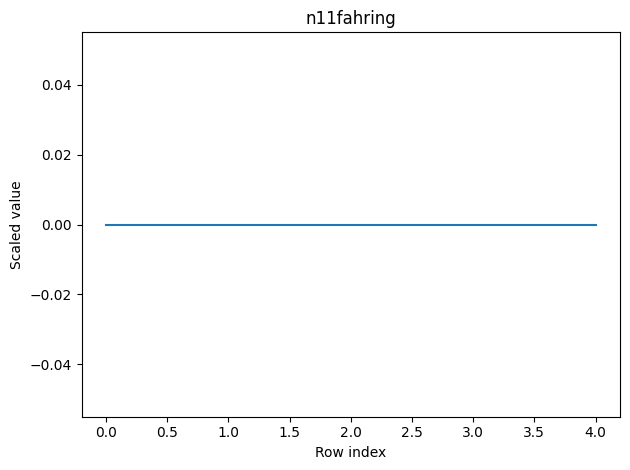

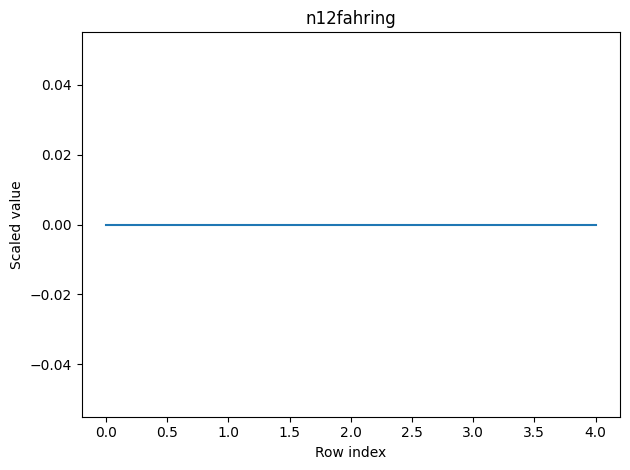

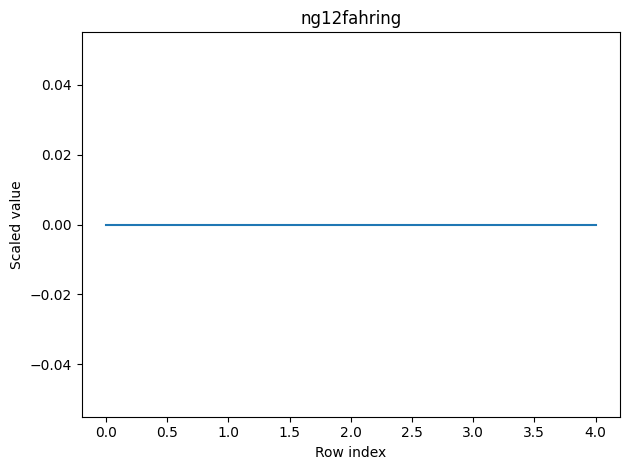

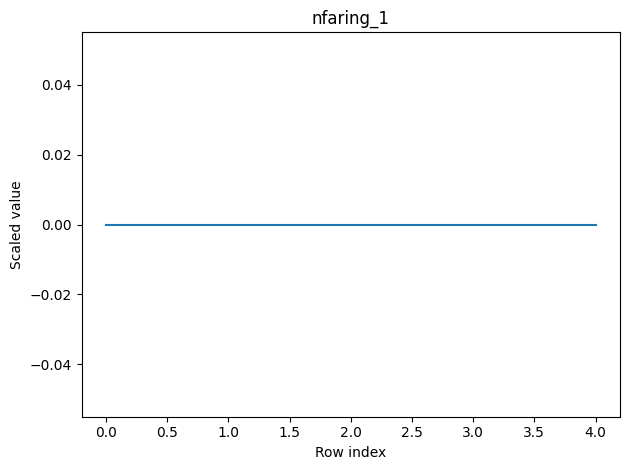

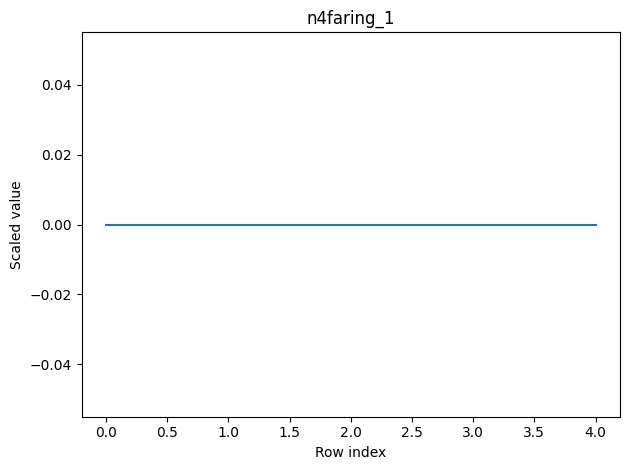

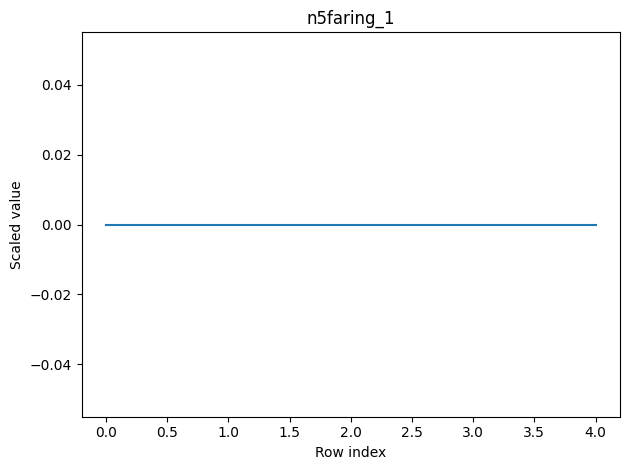

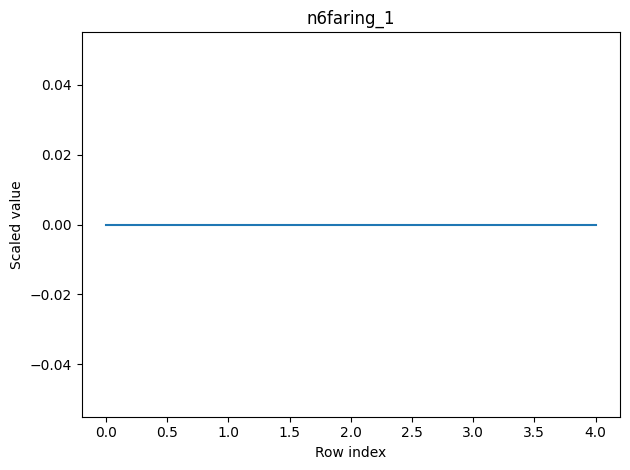

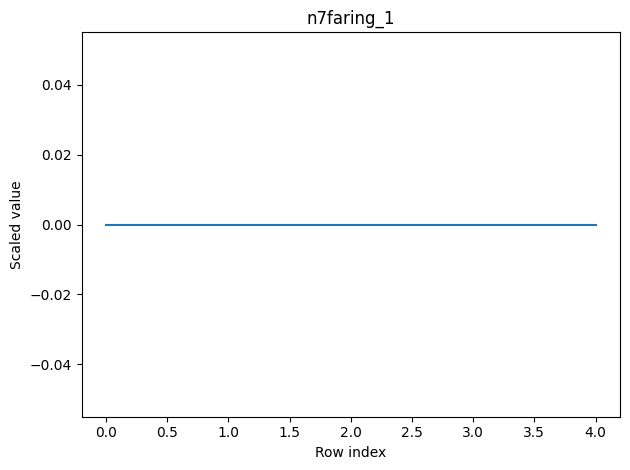

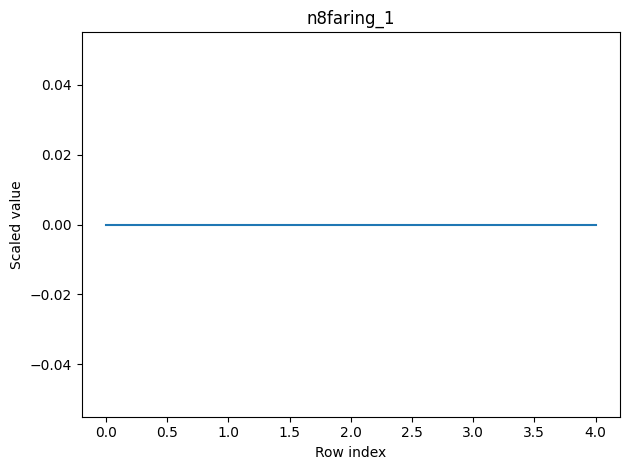

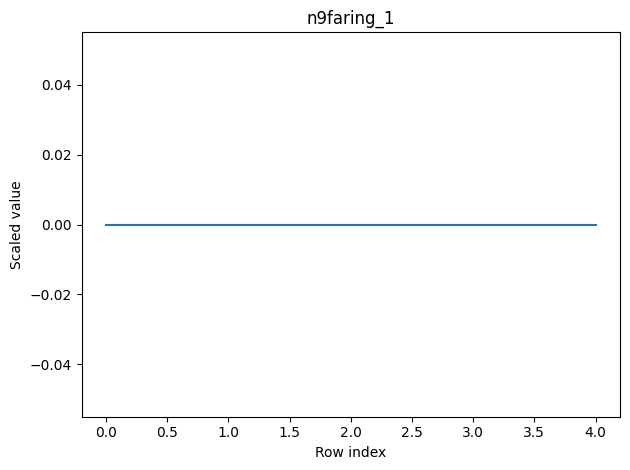

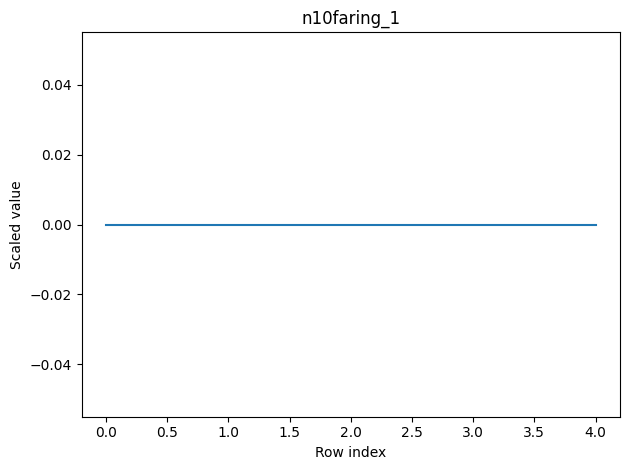

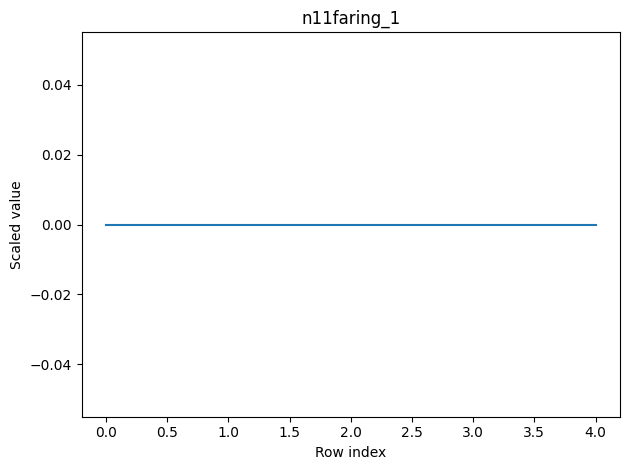

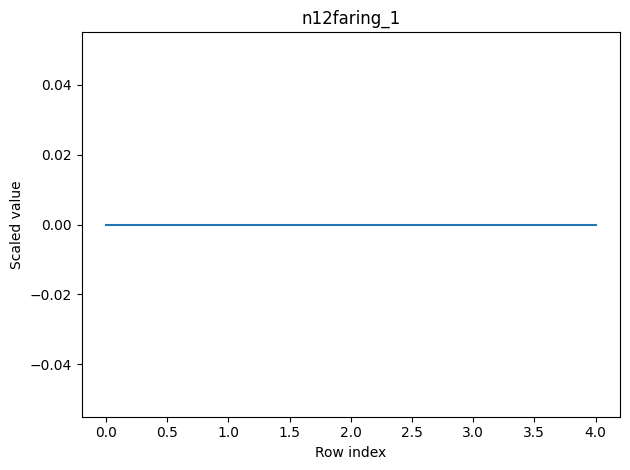

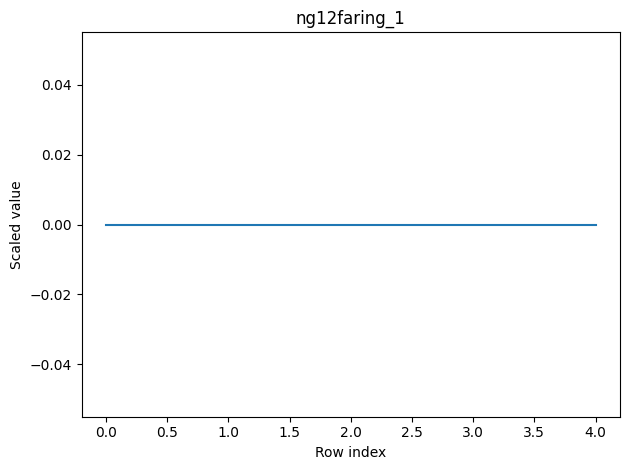

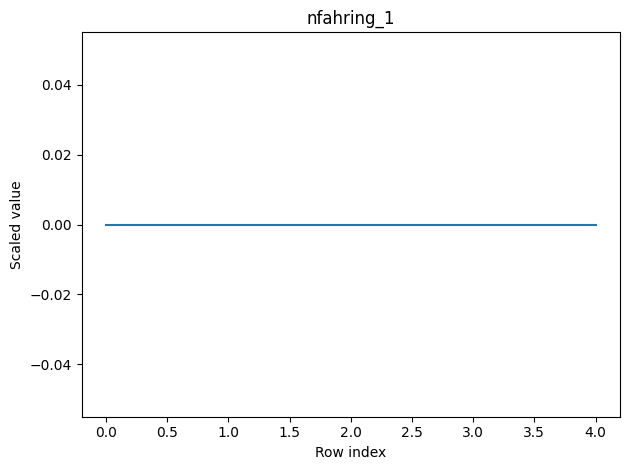

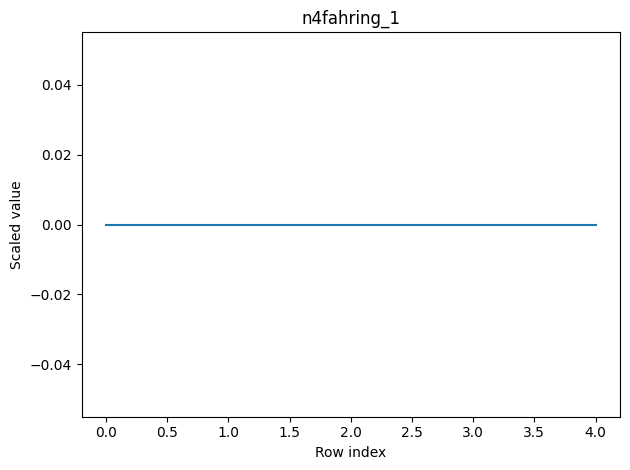

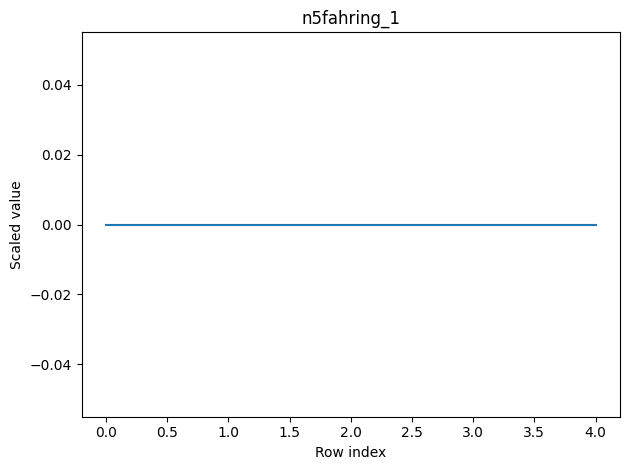

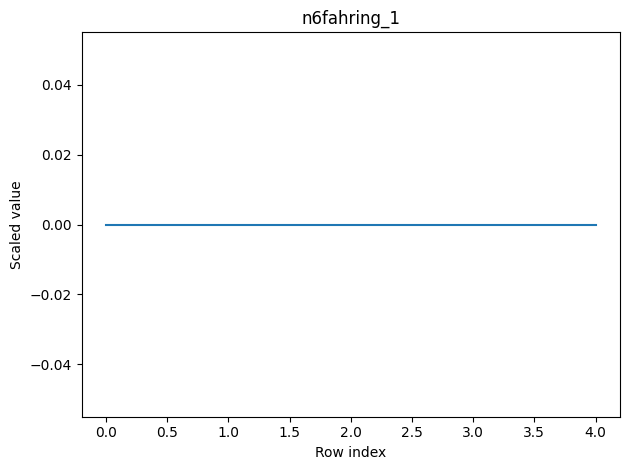

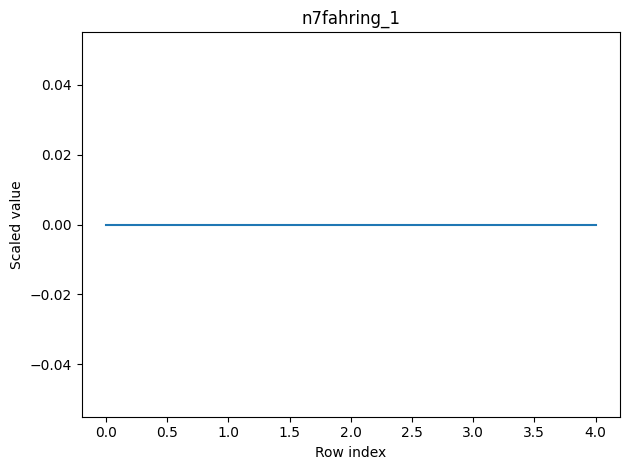

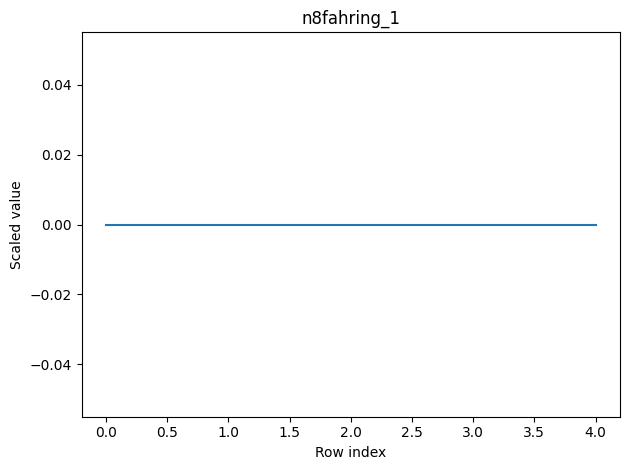

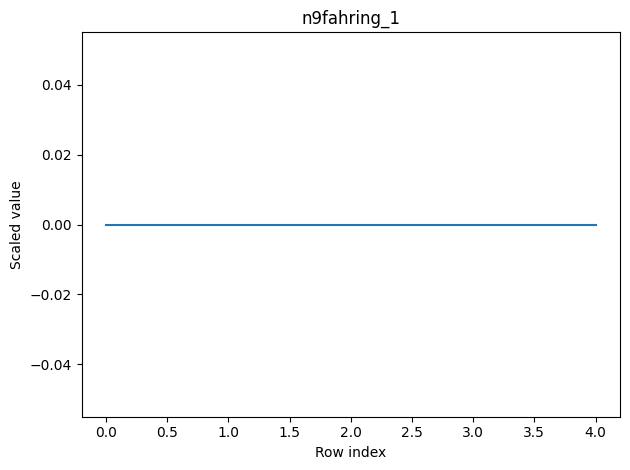

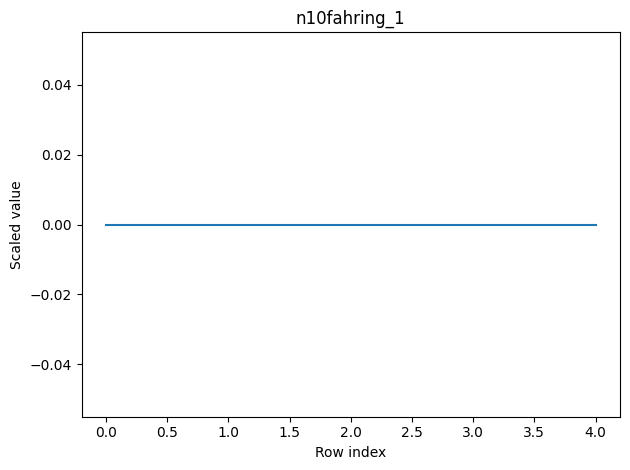

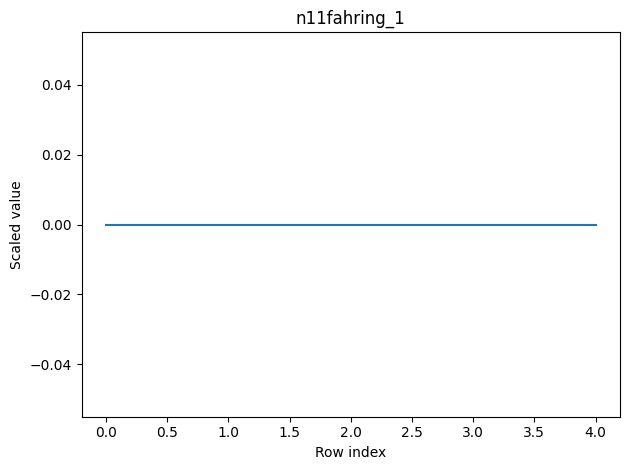

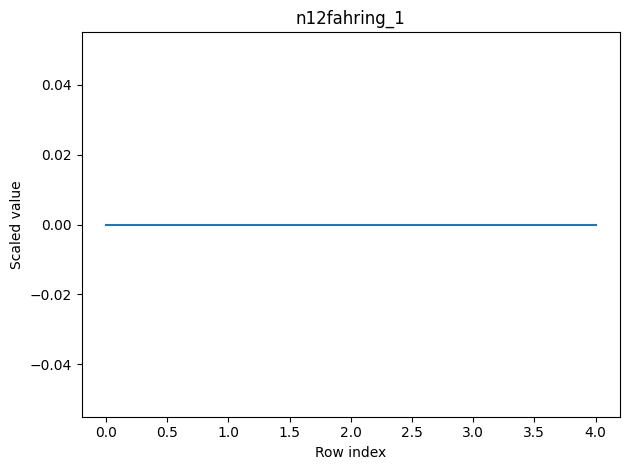

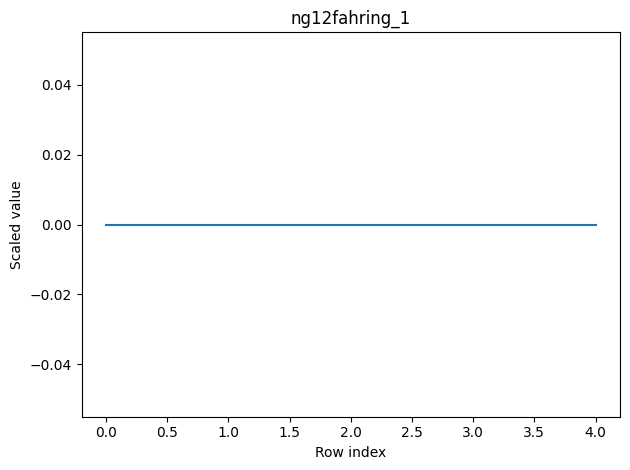

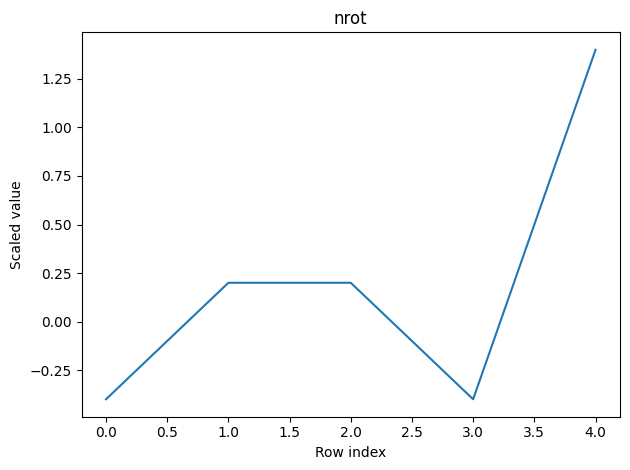

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_frames.scale import Scale

# Load the saved transformer from S3
mordred = Scale.load(
    model_id="eos78ao",
    transformer_type="robust_scaler",
    bucket_name="ersilia-dataframes"
)

# Run inference on new data
df_new = pd.read_csv("drugbank_outputc5.csv")
df_scaled = mordred.inference(df_new)

# Select only columns starting with 'n'
n_cols = [c for c in df_scaled.columns if c.startswith("n")]
df_n = df_scaled[n_cols]

# Plot each "n*" column as a line plot (values across rows)
for col in n_cols:
    plt.figure()
    df_n[col].plot(kind="line", title=col)
    plt.xlabel("Row index")
    plt.ylabel("Scaled value")
    plt.tight_layout()
    plt.show()